# Compute Komolgorov-Smirnov Test for pairwise cells within each FOV

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from tqdm import tqdm, trange
import os
import sys
import dask
import dask.array as da
import dask.dataframe as dd
from dask.diagnostics import ProgressBar
from skimage.io import imread
import tifffile as tf
import torch
from joblib import Parallel, delayed
import scipy
from scipy.stats import ks_2samp
import seaborn as sns

sns.set_style('whitegrid')

# directories and inputs

In [2]:
# read in PKL files of data
dataPath = r"..\results\spatial_statistics"

idCols = ['Y', 'X', 'CellY', 'CellX', 'FOV', 'CellLabel', 'TissueSource', 'DistCenter']

# folder to export KS test p values heatmap
savePath = r"..\results\spatial_statistics\09 KS test heatmaps flipped RNA signal"

# read combined dataframe

In [3]:
%%time

os.chdir(dataPath)

distCenters = pd.read_pickle('04_flipped_RNA_align.pkl')

Wall time: 3.03 s


# Compute KS test for pairwise cells w/in each FOV

In [4]:
#%% for each threshold value, read pickle file and calculate hypothesis test
# compute pairwise Komolgorov-Smirnov hypothesis test 
# @jit
# @overload(scipy.stats.ks_2samp)
def ksTestTwoCells(dfM, c2, dfC1, c1):
    # centerP = np.nan
    # edgeP = np.nan
    
# if c2 >= c1: # no need to repeat pairs
    dfC2 = dfM.loc[dfM['CellLabel'] == c2]
    
    assert dfC1.shape[0] > 0
    assert dfC2.shape[0] > 0

    _, centerP = ks_2samp(dfC1['DistCenter'].values, \
                           dfC2['DistCenter'].values)
        # _, edgeP = \
        #     scipy.stats.ks_2samp(dfC1['DistNearestEdge'].values, \
        #                        dfC2['DistNearestEdge'].values)
    
    return centerP

# func to compare 1 cell against all other cells
def cellAgainstOthers(dfM, c1, ll):
    
    # c1 = c1 + 1 # offset indexing
    dfC1 = dfM.loc[dfM['CellLabel'] == c1]
    
    # test c1 against all other cells
    row = Parallel(n_jobs = 1, prefer = 'threads', verbose = 0)\
        (delayed(ksTestTwoCells)(dfM, c2, dfC1, c1) \
          for _, c2 in enumerate(dfM['CellLabel'].drop_duplicates()))
            
    # unpack results tuple
    # centerRow = []
    # edgeRow = []
    # for kk, r in enumerate(row):
    #     # centerPVal[kk, kk] = r[0]
    #     # edgePVal[kk, kk] = r[1]
    #     centerRow.append(r[0])
    #     edgeRow.append(r[1])
        
    centerRow = row
    centerRow = np.stack(centerRow, axis = 0)
    # edgeRow = np.stack(edgeRow, axis = 0)
        
    # report
    # print()
    # print('Complete cell', c1, '/', nCells, 'for', m, '...')
    
    return centerRow

  0%|                                                                                           | 0/16 [00:00<?, ?it/s]C:\Users\nzhang326\Anaconda3\lib\site-packages\seaborn\matrix.py:1214: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)
C:\Users\nzhang326\Anaconda3\lib\site-packages\seaborn\matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
C:\Users\nzhang326\Anaconda3\lib\site-packages\seaborn\matrix.py:624: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
posx and posy should be finite values
 12%|██████████                                                                      | 2/16 [29:10<3:38:11, 935.11s/it]posx and posy should be finite values
C:\Users\NZHANG~1\AppData\Local\Temp/ipykernel_82404/2694570840.py:154: Runtim

<Figure size 3000x2000 with 0 Axes>

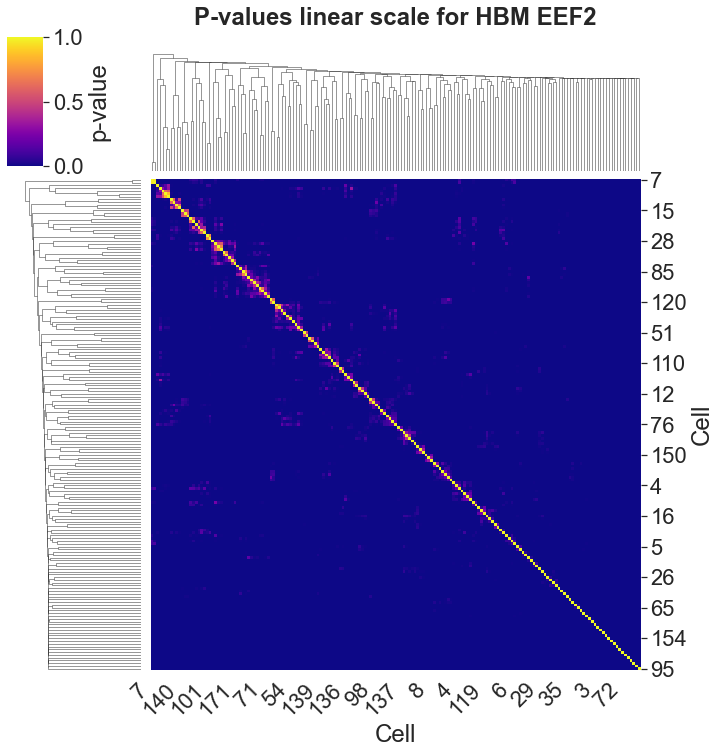

<Figure size 3000x2000 with 0 Axes>

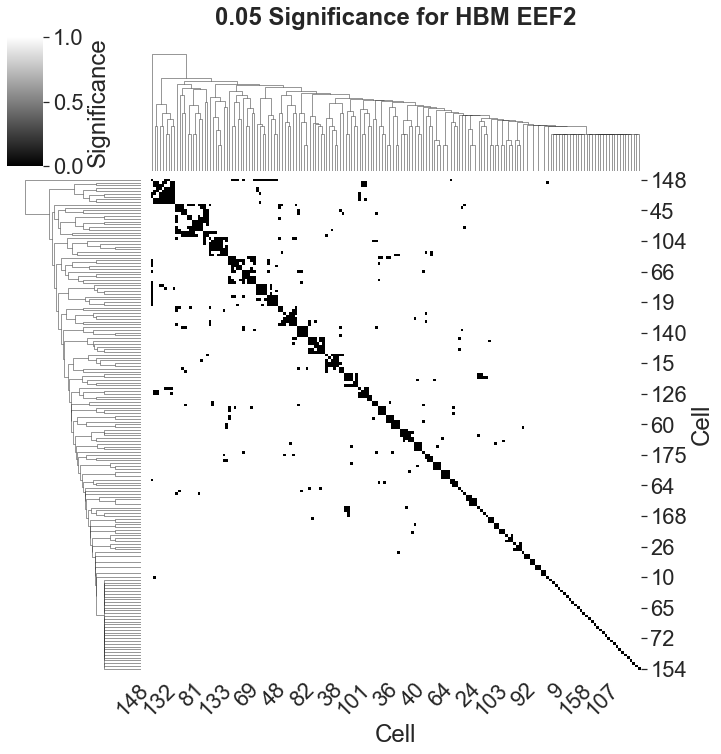

<Figure size 3000x2000 with 0 Axes>

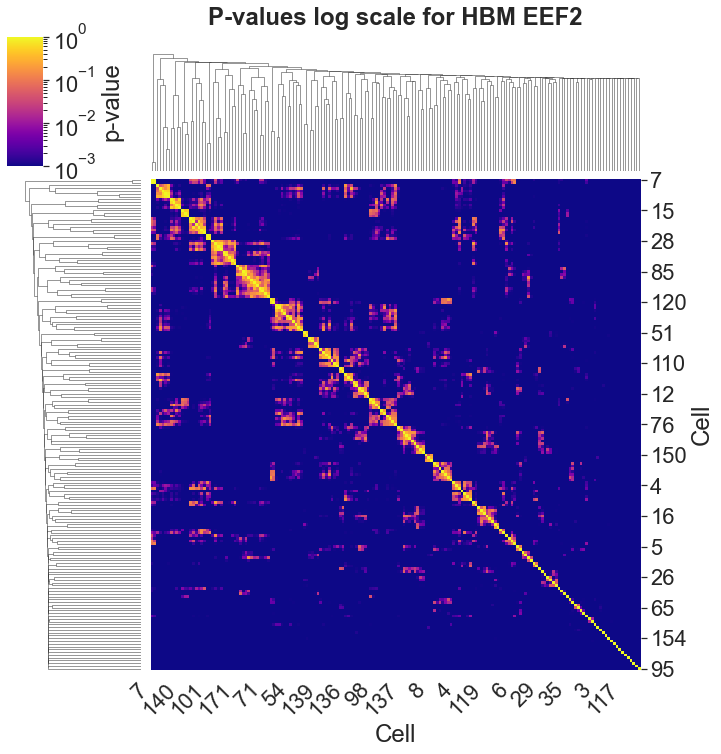

<Figure size 699x747 with 0 Axes>

<Figure size 3000x2000 with 0 Axes>

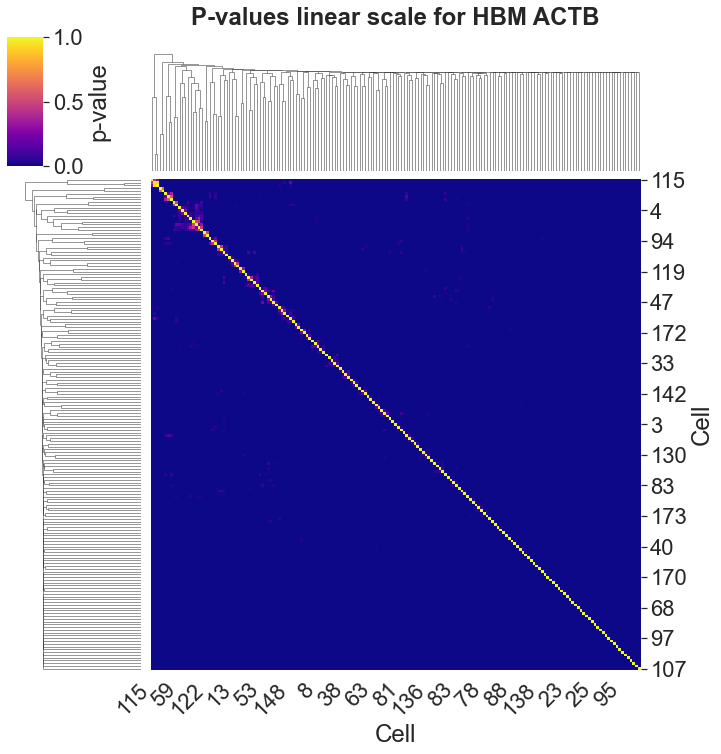

<Figure size 3000x2000 with 0 Axes>

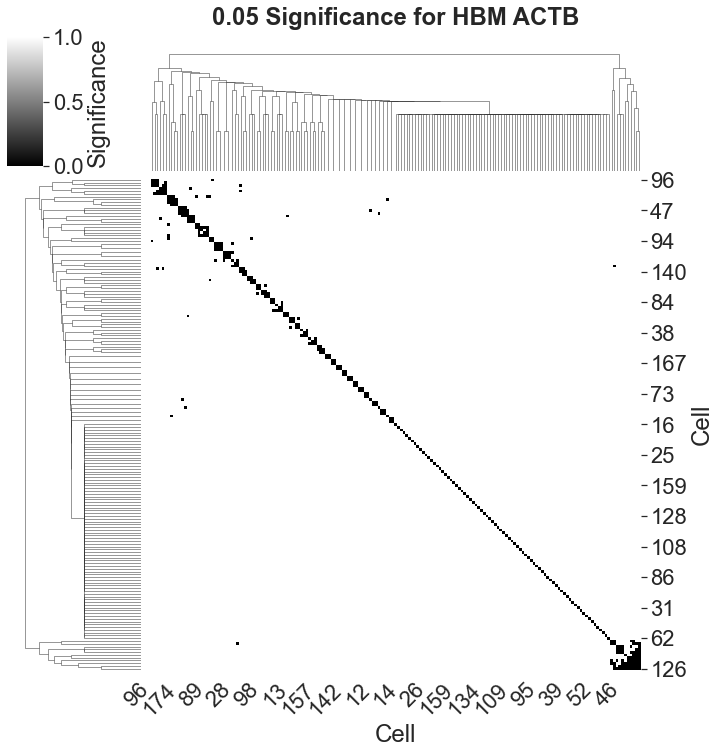

<Figure size 3000x2000 with 0 Axes>

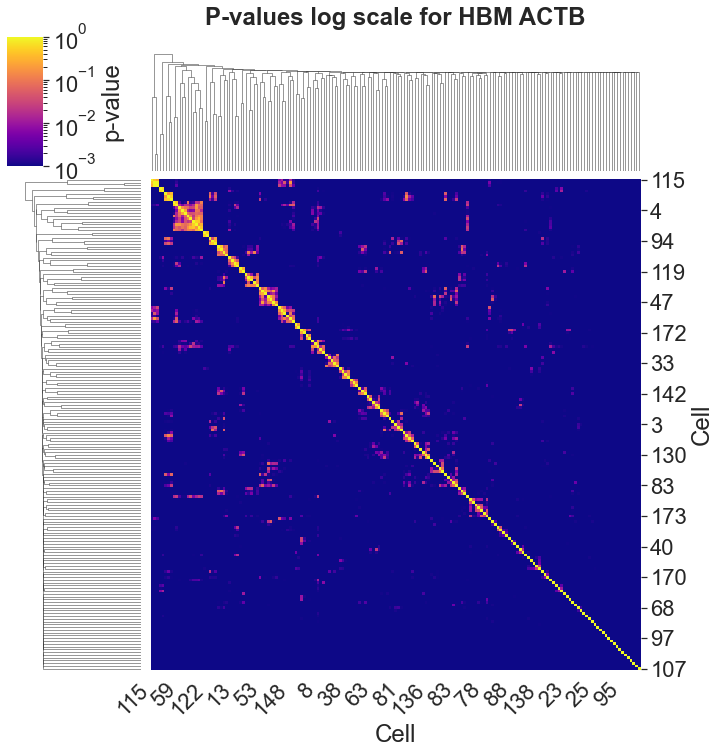

<Figure size 699x747 with 0 Axes>

<Figure size 3000x2000 with 0 Axes>

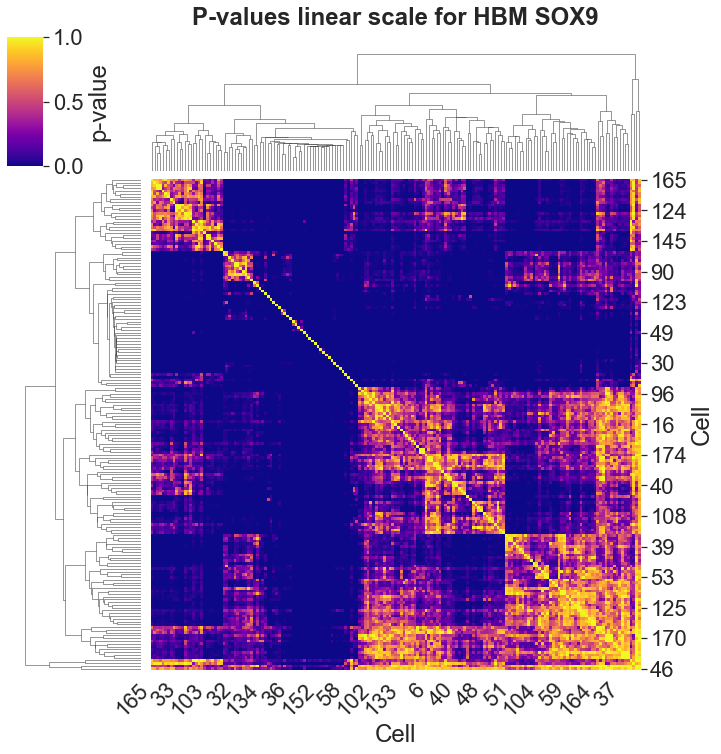

<Figure size 3000x2000 with 0 Axes>

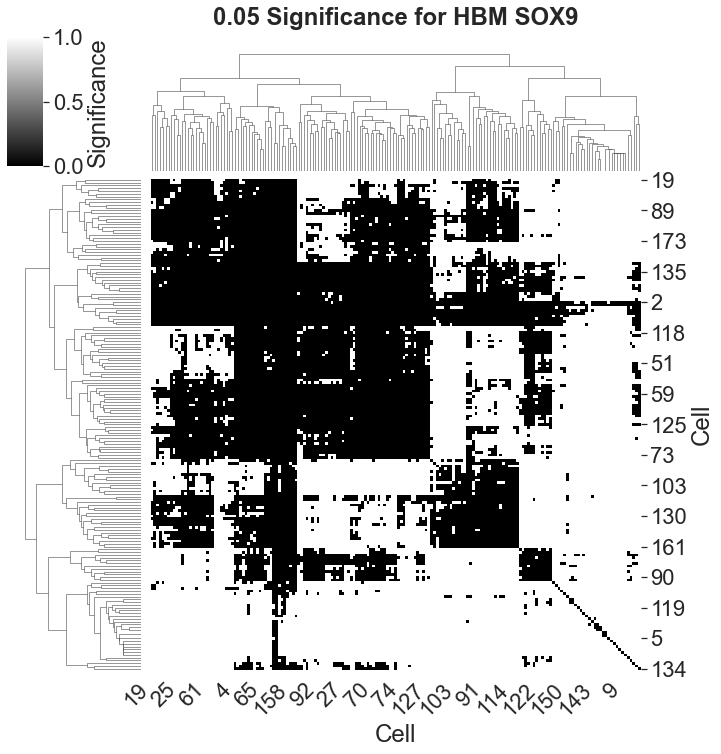

<Figure size 3000x2000 with 0 Axes>

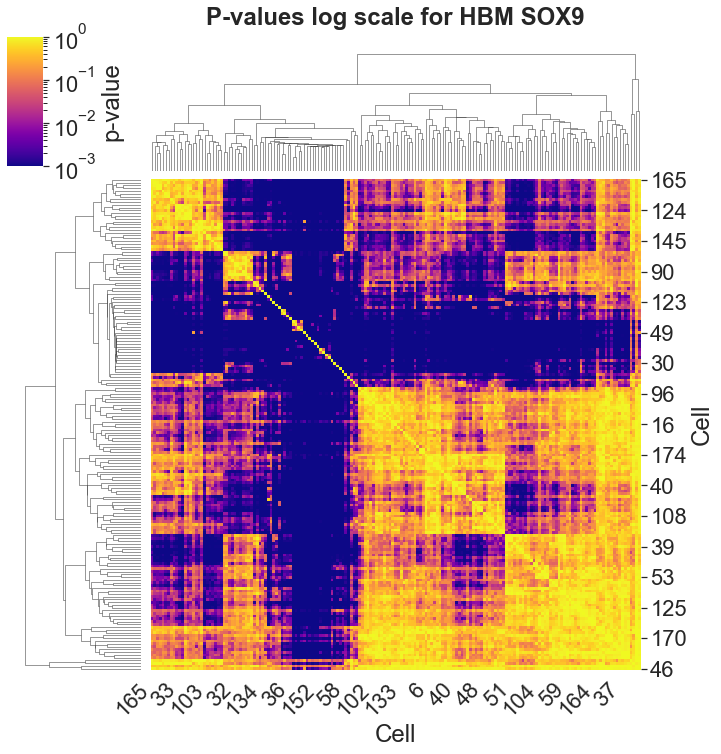

<Figure size 699x747 with 0 Axes>

<Figure size 3000x2000 with 0 Axes>

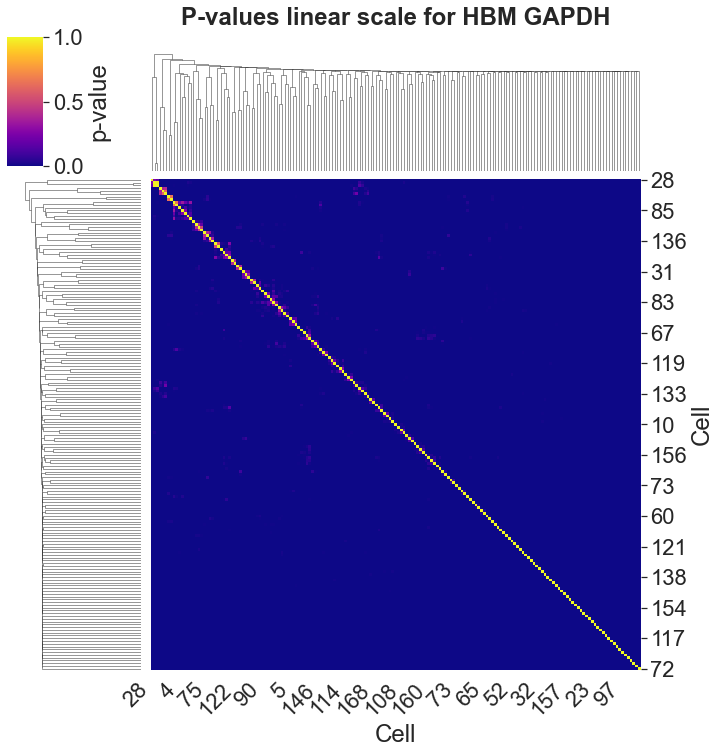

<Figure size 3000x2000 with 0 Axes>

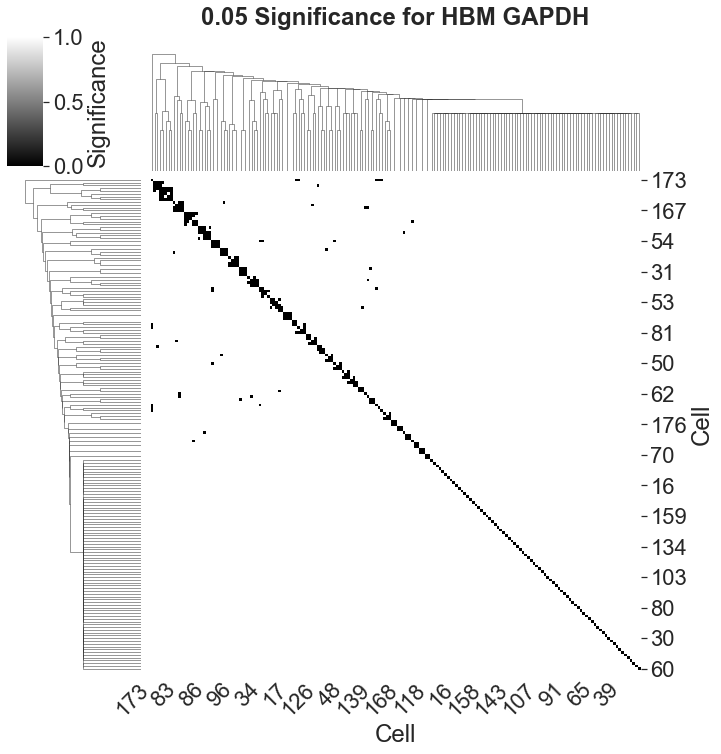

<Figure size 3000x2000 with 0 Axes>

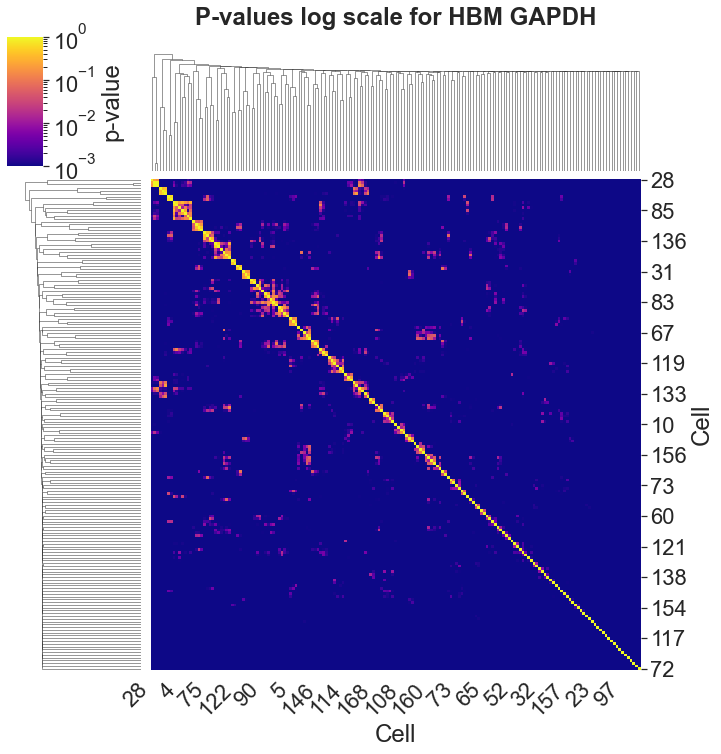

<Figure size 699x747 with 0 Axes>

<Figure size 3000x2000 with 0 Axes>

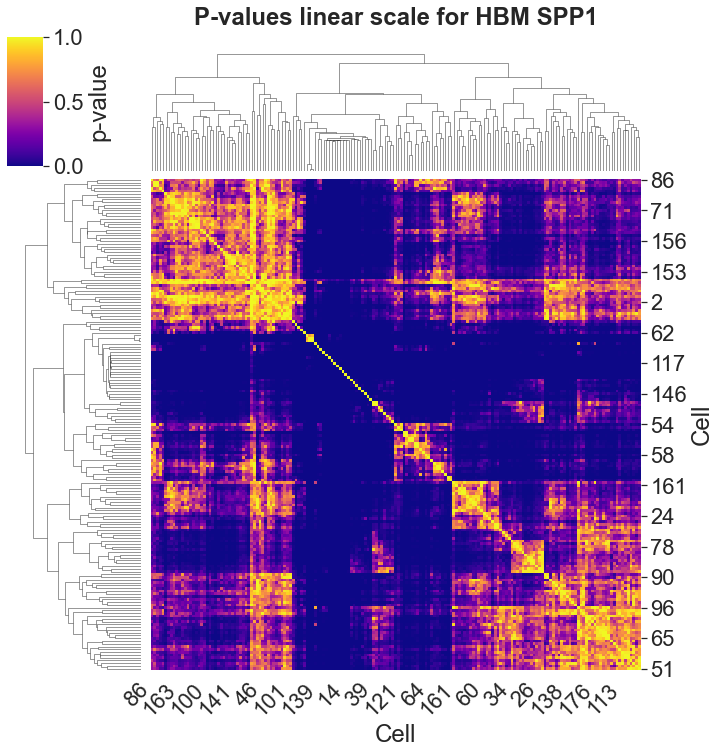

<Figure size 3000x2000 with 0 Axes>

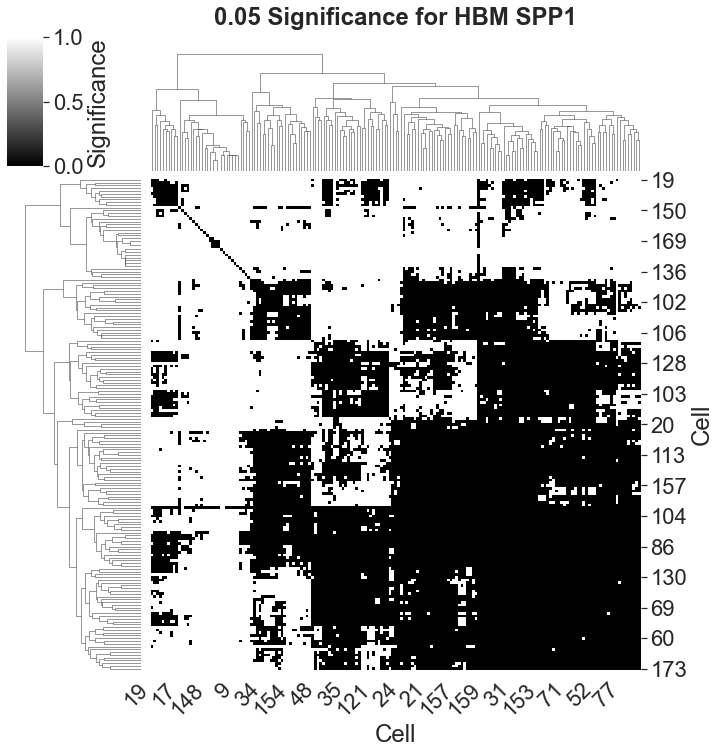

<Figure size 3000x2000 with 0 Axes>

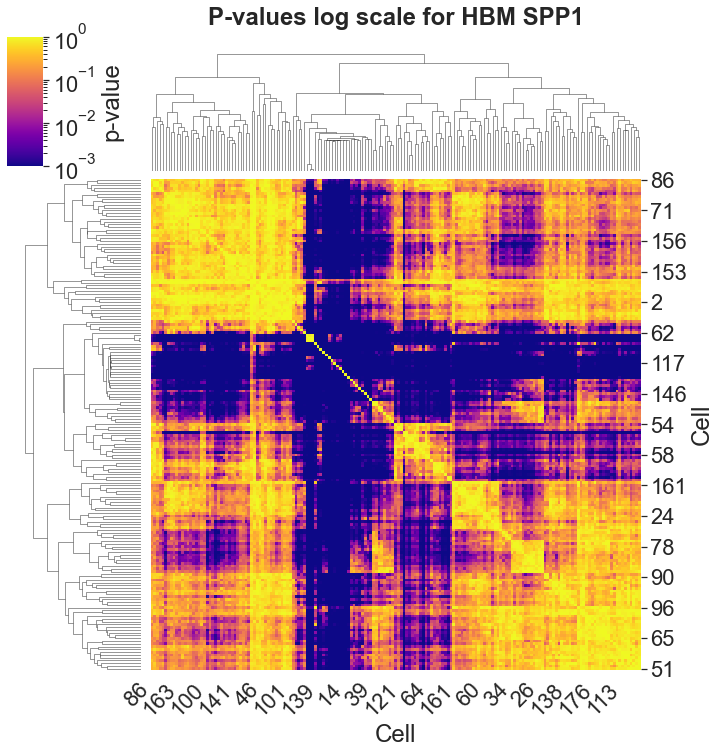

<Figure size 699x747 with 0 Axes>

<Figure size 3000x2000 with 0 Axes>

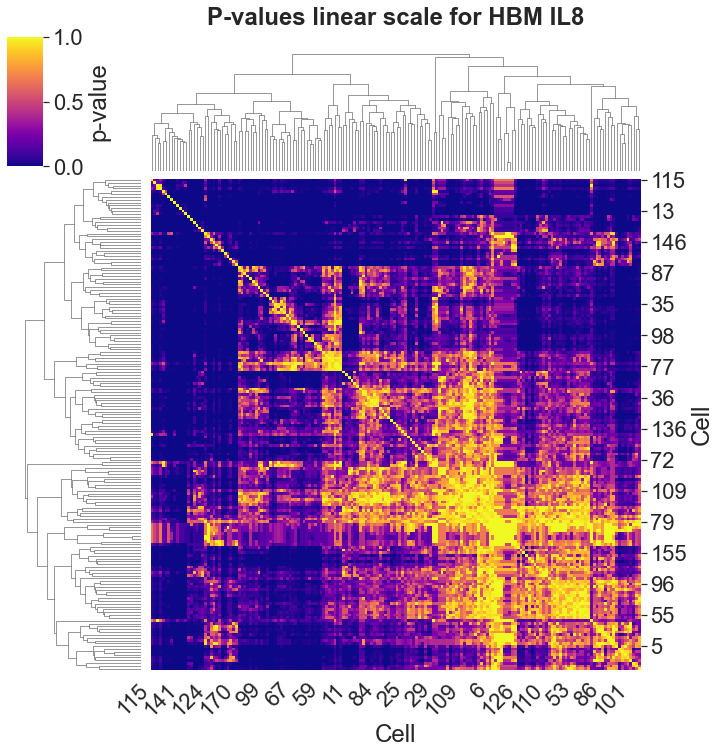

<Figure size 3000x2000 with 0 Axes>

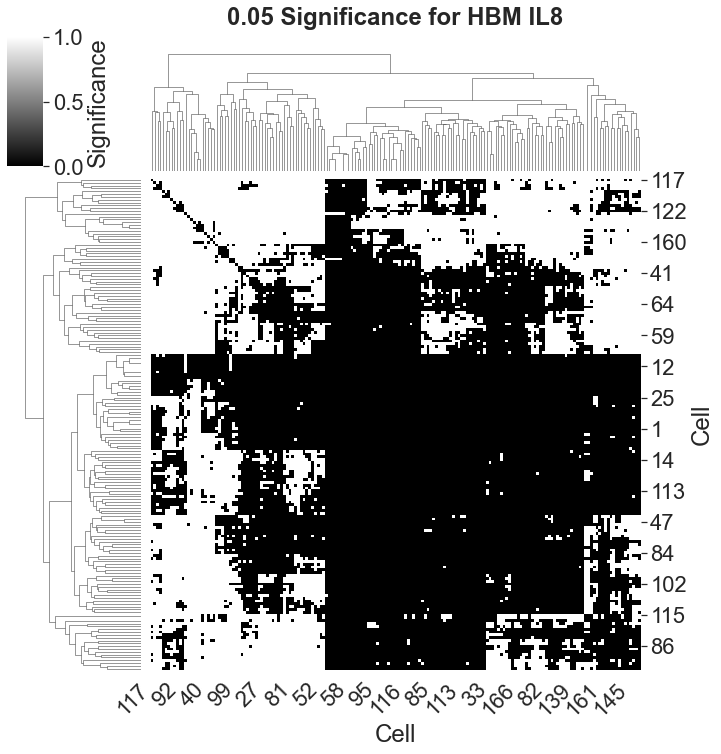

<Figure size 3000x2000 with 0 Axes>

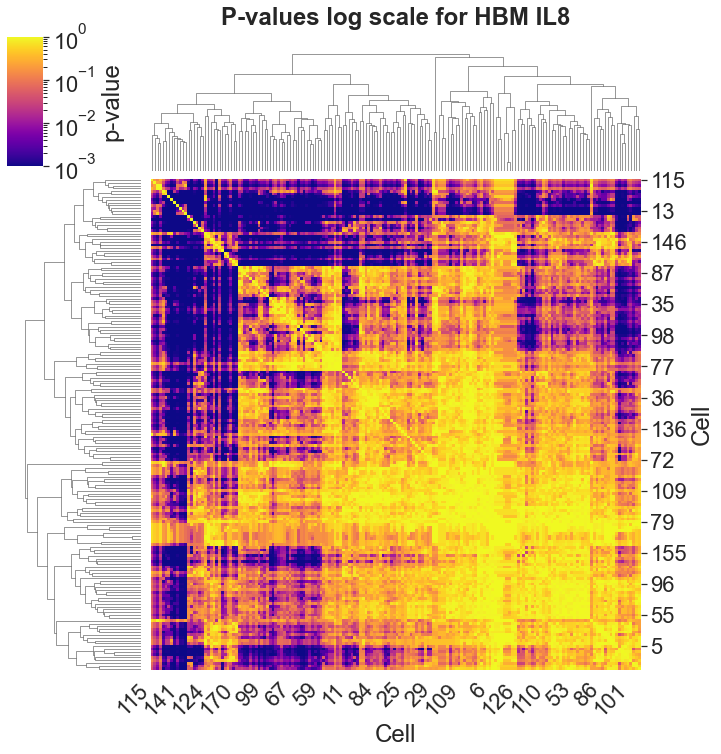

<Figure size 699x747 with 0 Axes>

<Figure size 3000x2000 with 0 Axes>

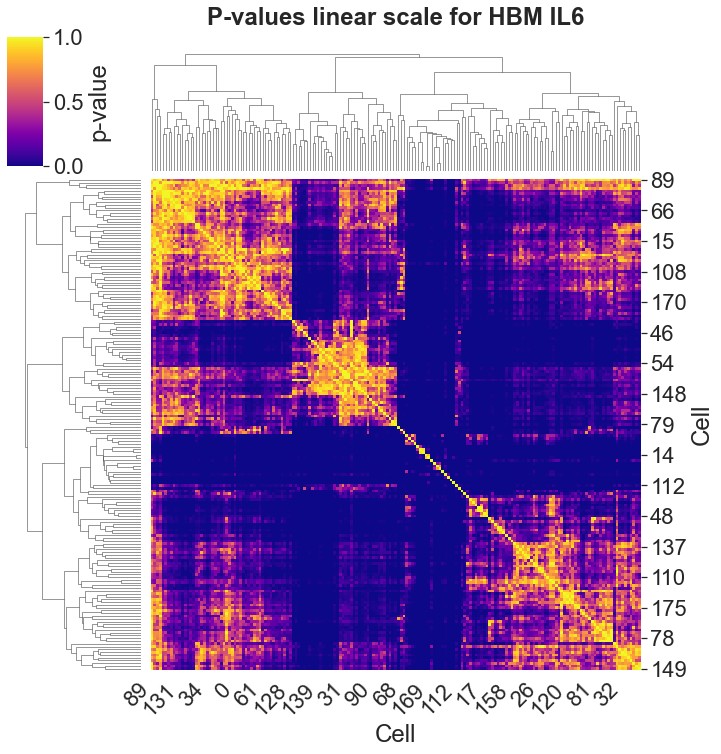

<Figure size 3000x2000 with 0 Axes>

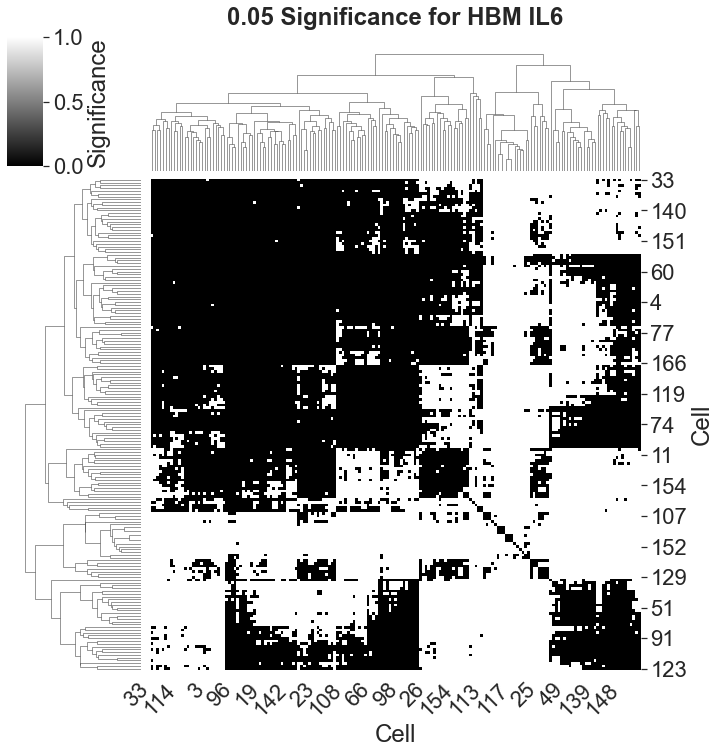

<Figure size 3000x2000 with 0 Axes>

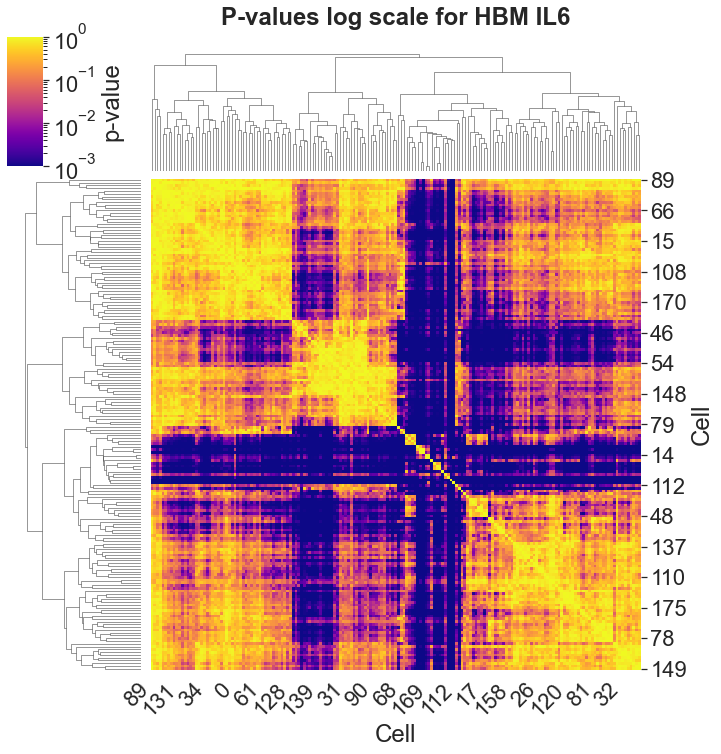

<Figure size 699x747 with 0 Axes>

<Figure size 3000x2000 with 0 Axes>

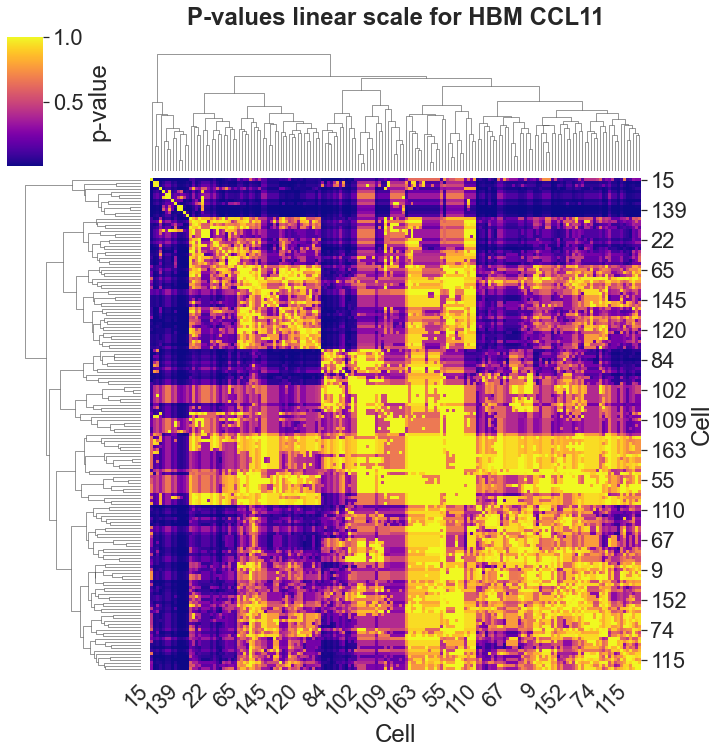

<Figure size 3000x2000 with 0 Axes>

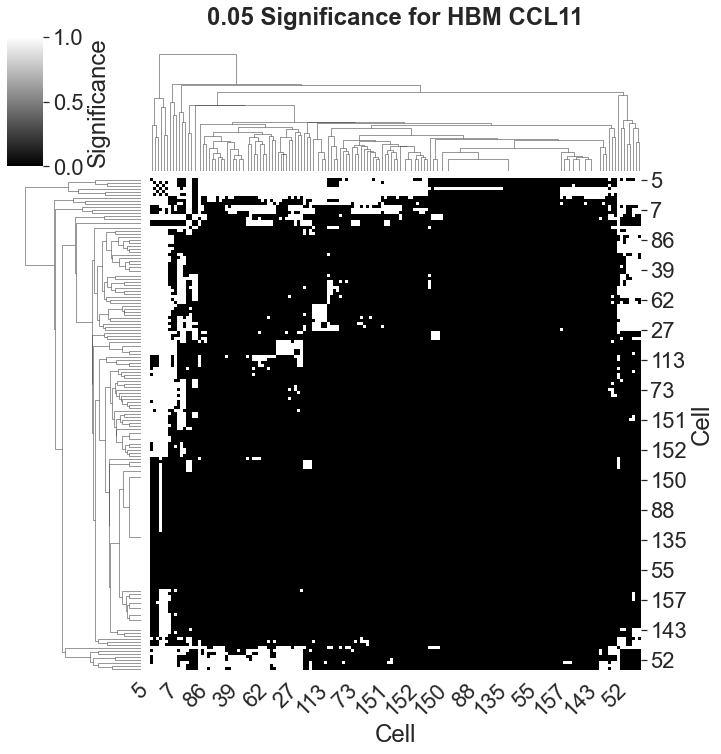

<Figure size 3000x2000 with 0 Axes>

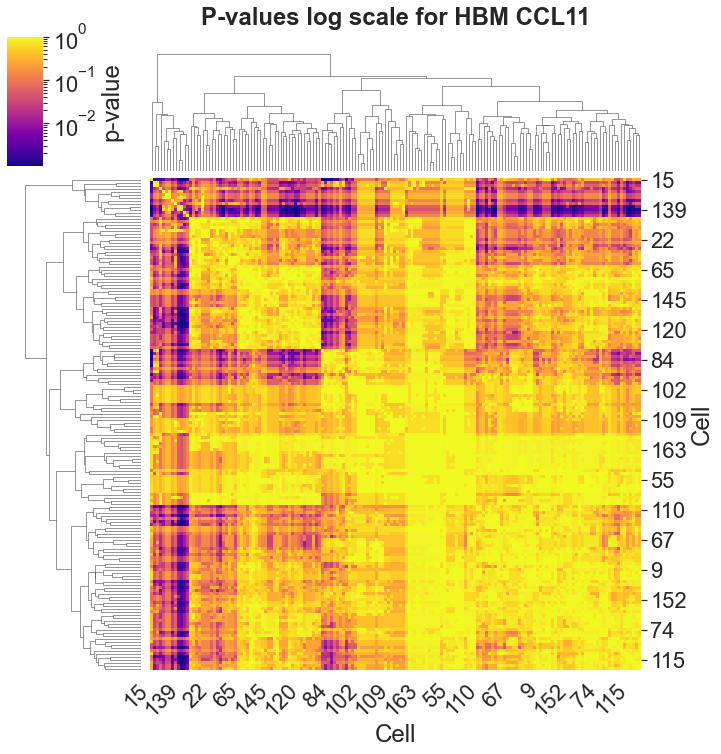

<Figure size 699x747 with 0 Axes>

<Figure size 3000x2000 with 0 Axes>

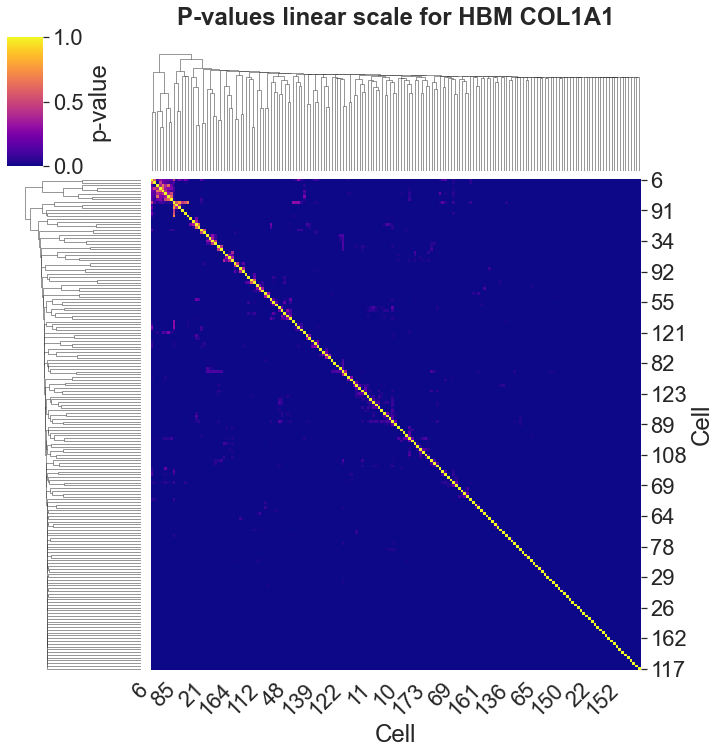

<Figure size 3000x2000 with 0 Axes>

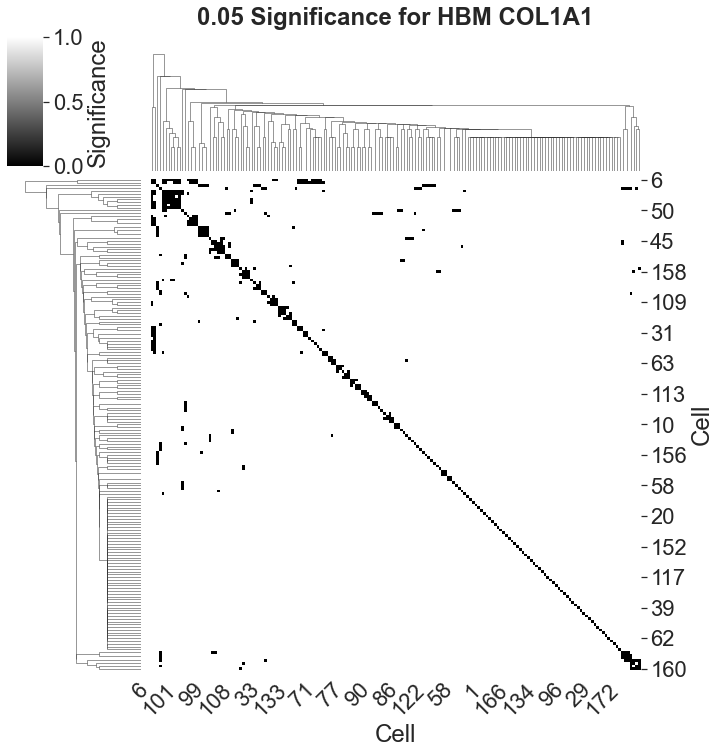

<Figure size 3000x2000 with 0 Axes>

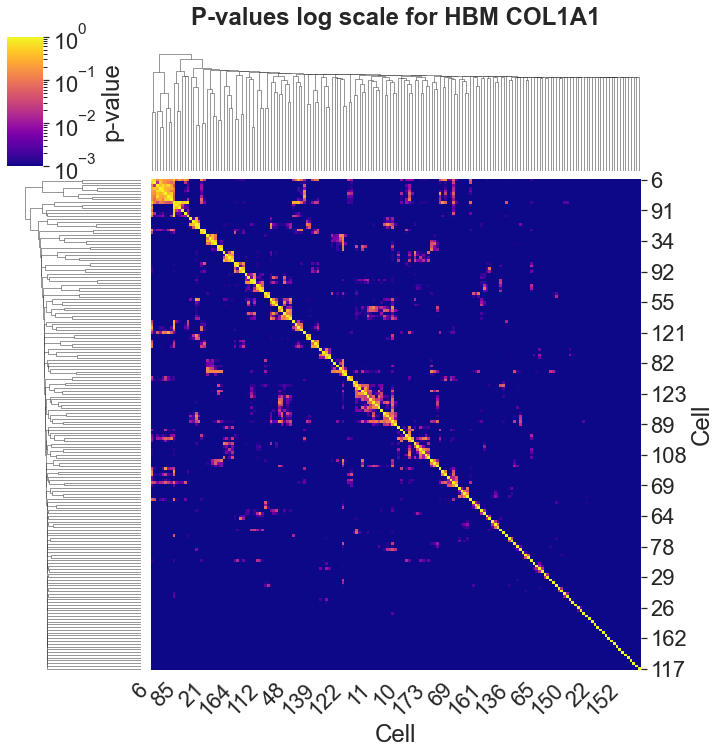

<Figure size 699x747 with 0 Axes>

<Figure size 3000x2000 with 0 Axes>

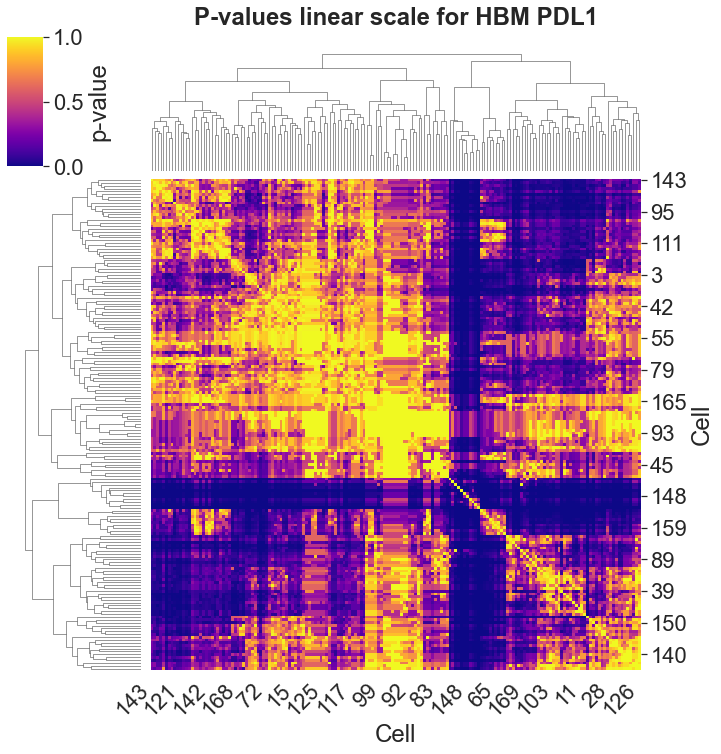

<Figure size 3000x2000 with 0 Axes>

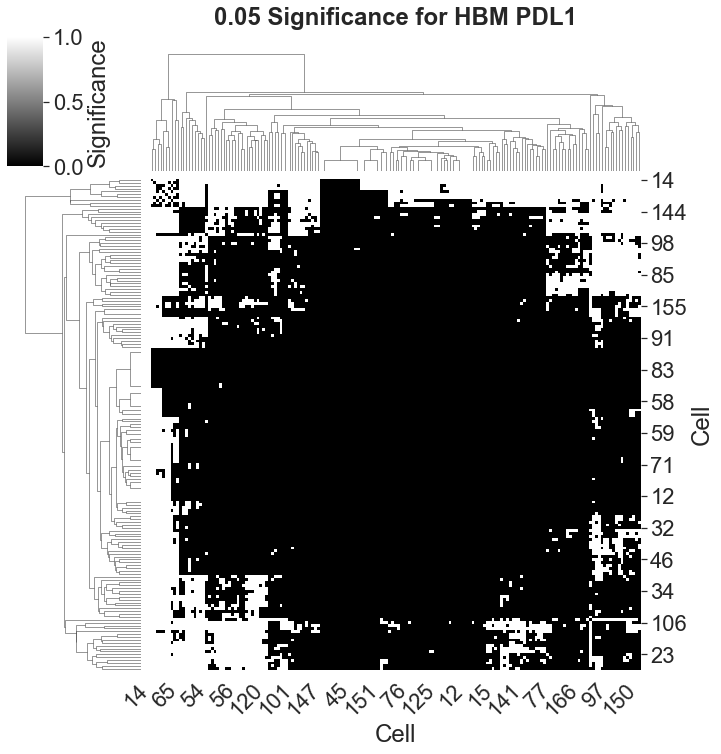

<Figure size 3000x2000 with 0 Axes>

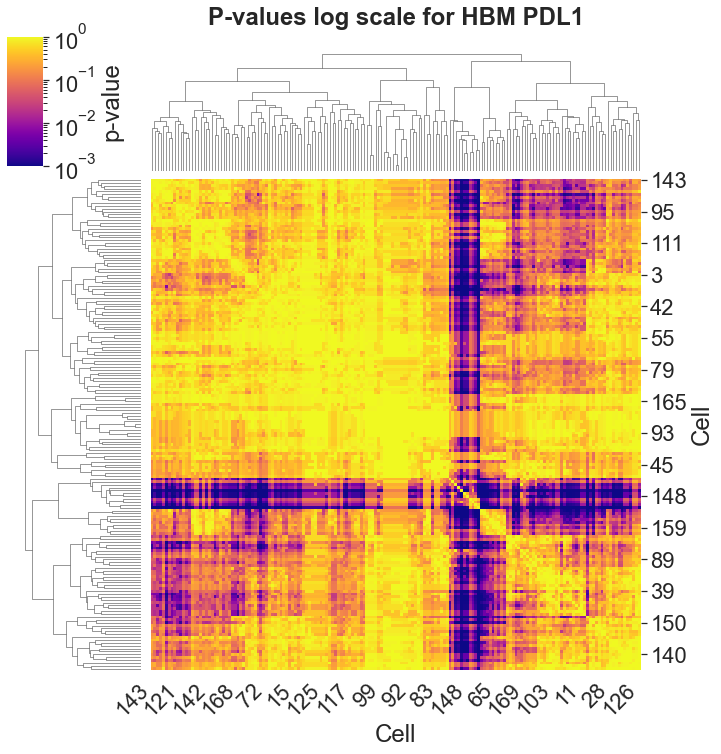

<Figure size 699x747 with 0 Axes>

<Figure size 3000x2000 with 0 Axes>

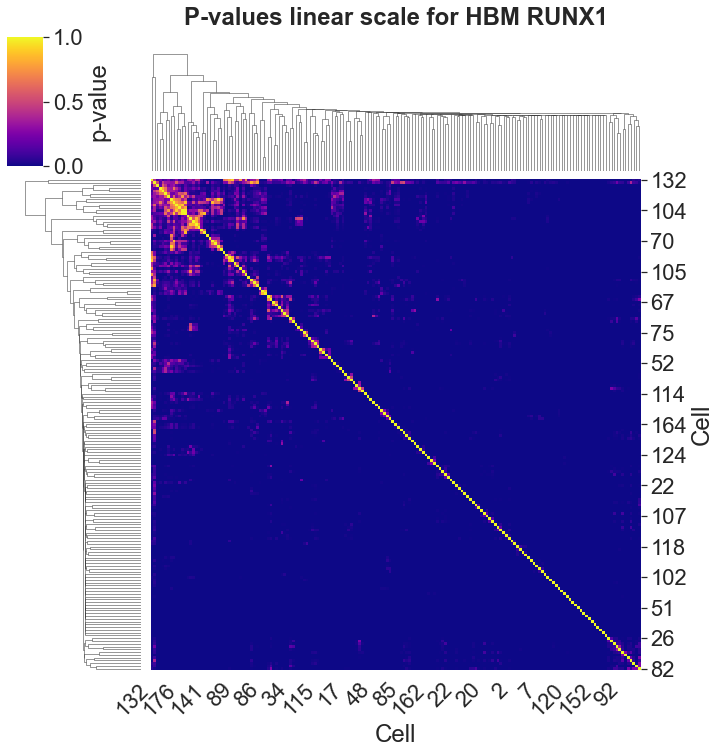

<Figure size 3000x2000 with 0 Axes>

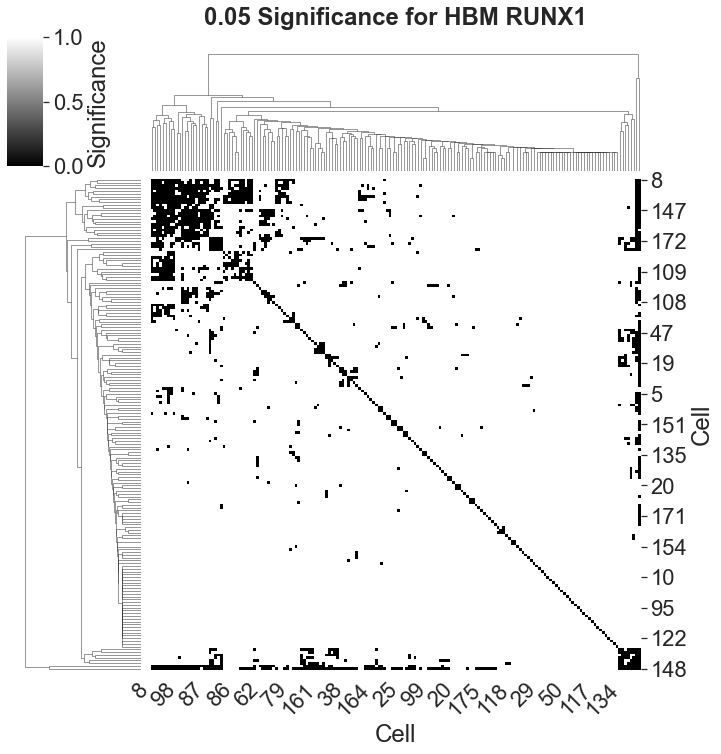

<Figure size 3000x2000 with 0 Axes>

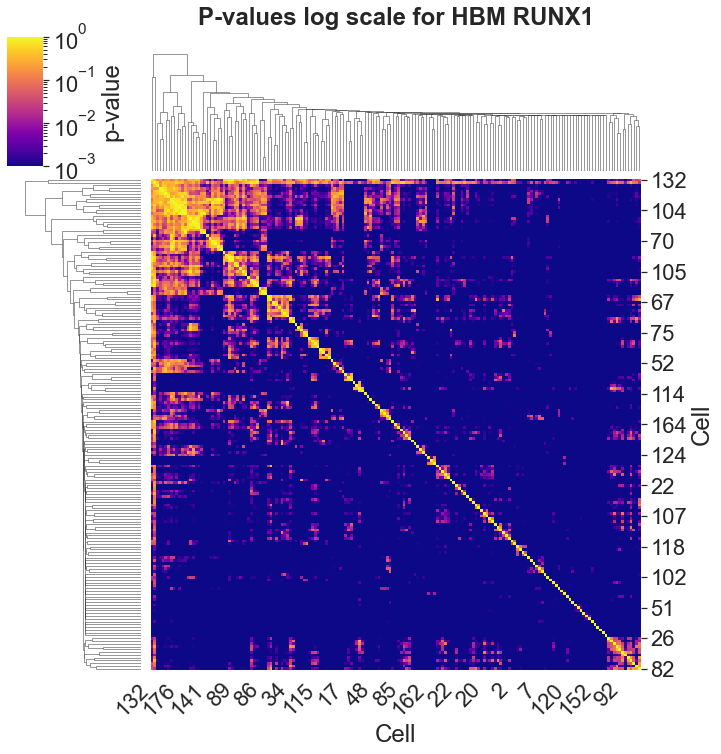

<Figure size 699x747 with 0 Axes>

<Figure size 3000x2000 with 0 Axes>

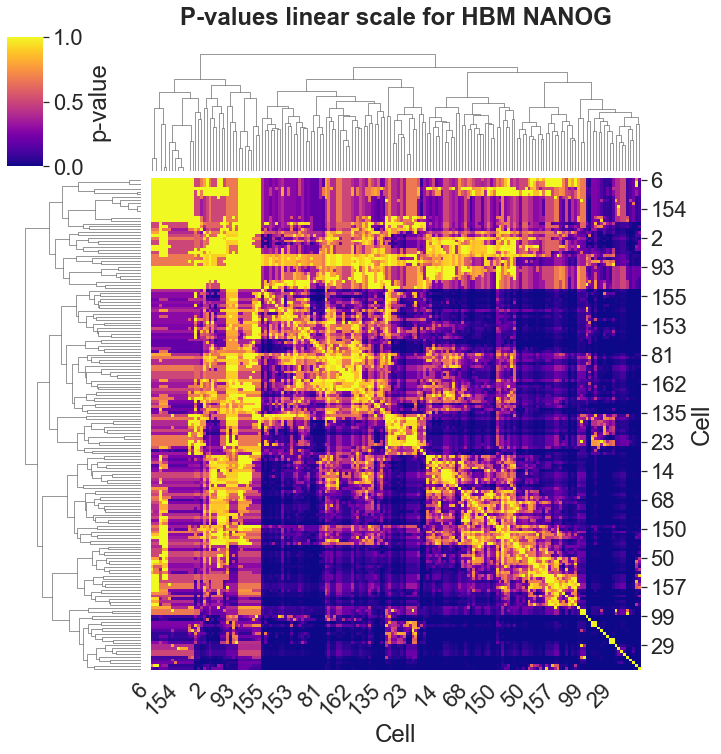

<Figure size 3000x2000 with 0 Axes>

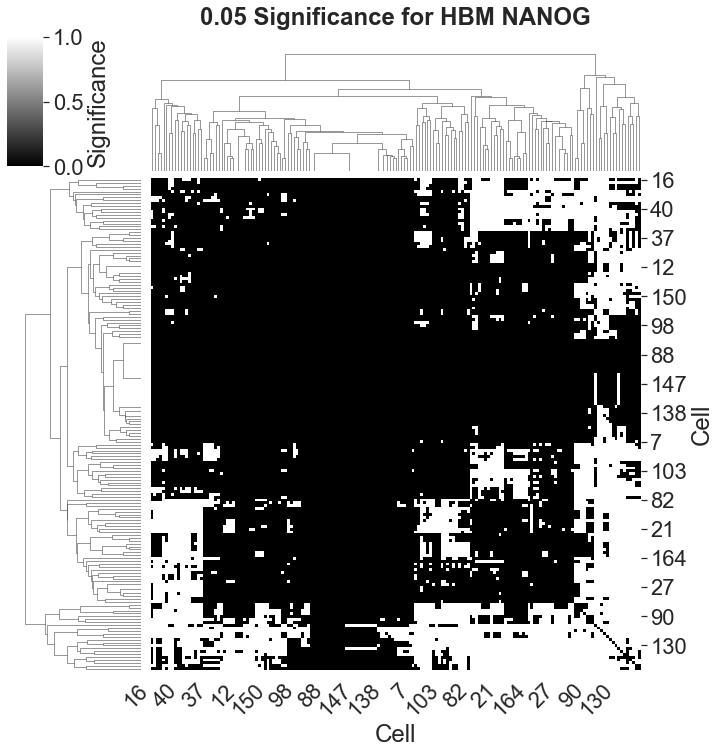

<Figure size 3000x2000 with 0 Axes>

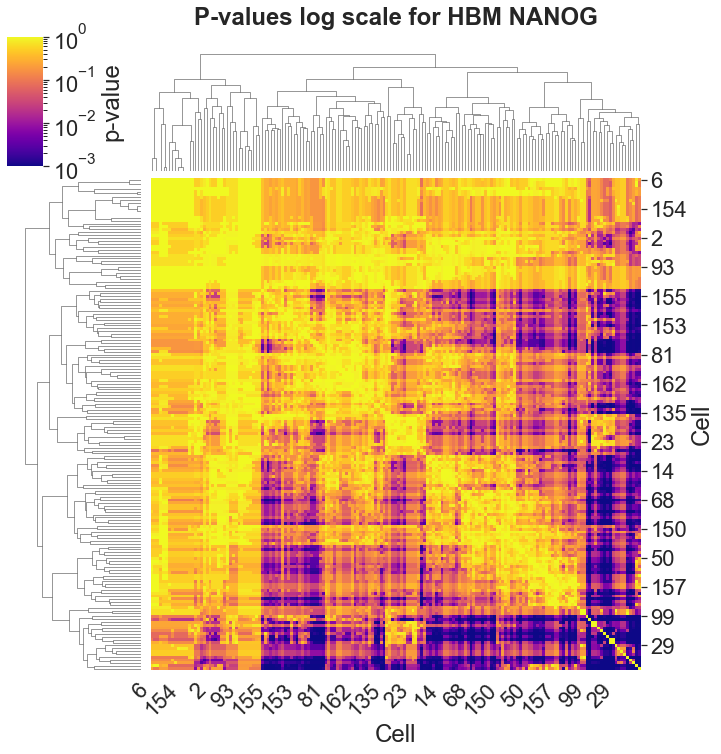

<Figure size 699x747 with 0 Axes>

<Figure size 3000x2000 with 0 Axes>

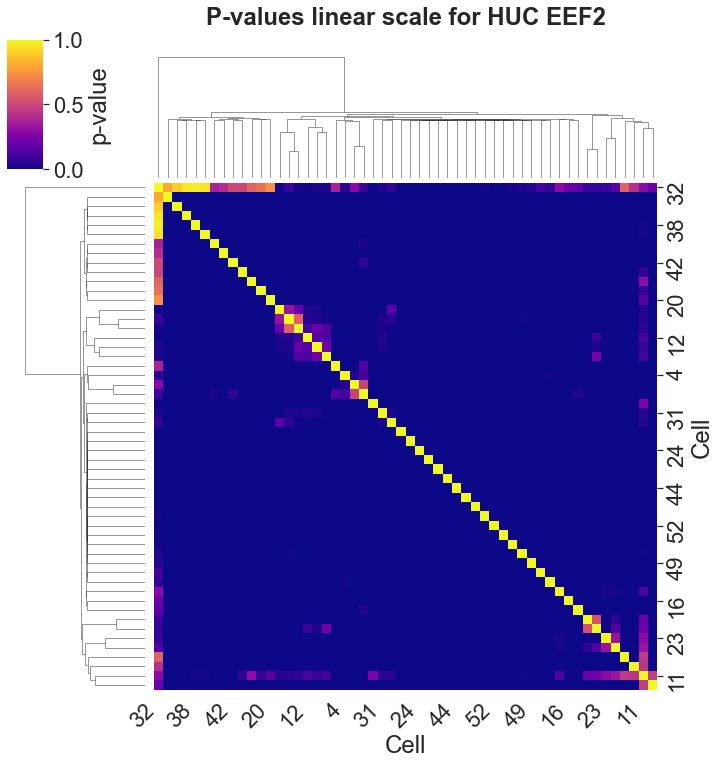

<Figure size 3000x2000 with 0 Axes>

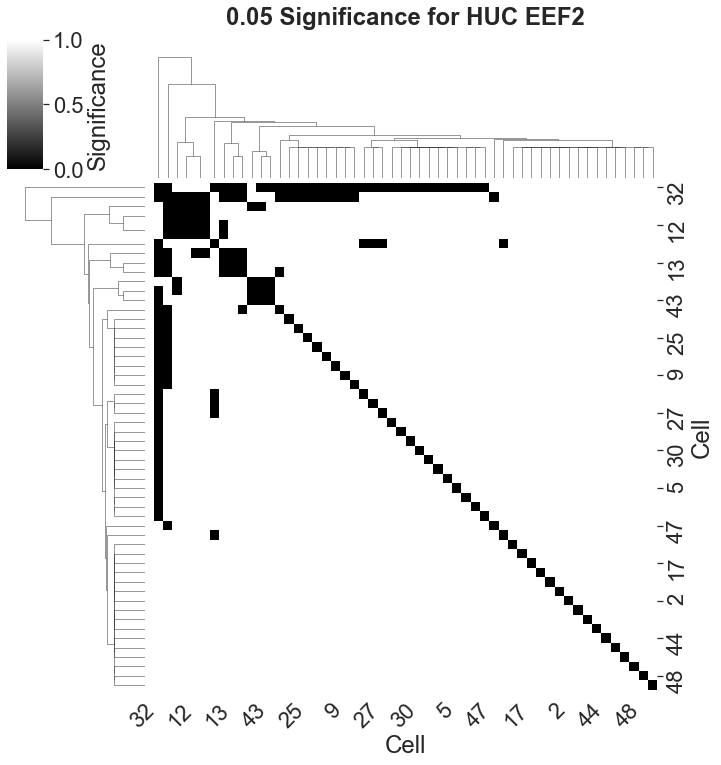

<Figure size 3000x2000 with 0 Axes>

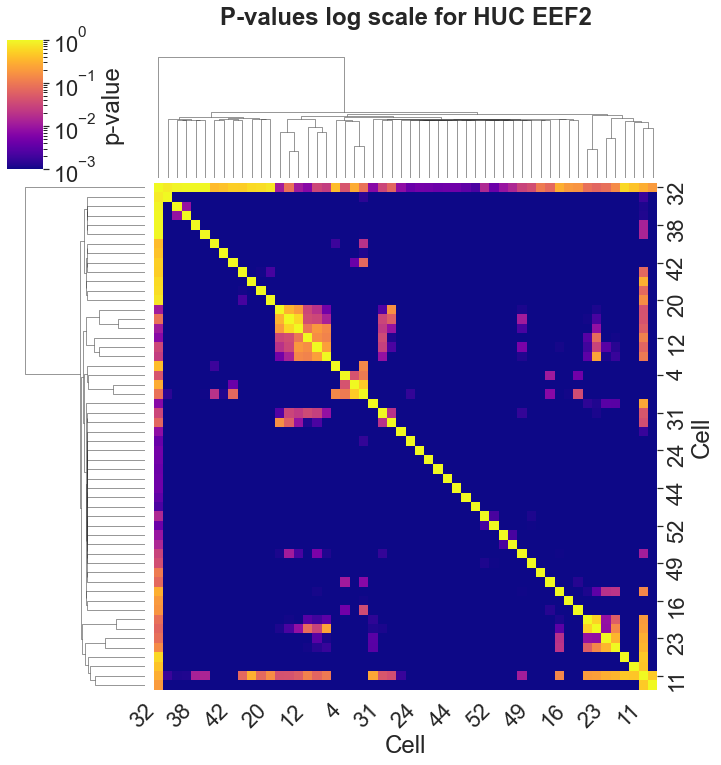

<Figure size 699x747 with 0 Axes>

<Figure size 3000x2000 with 0 Axes>

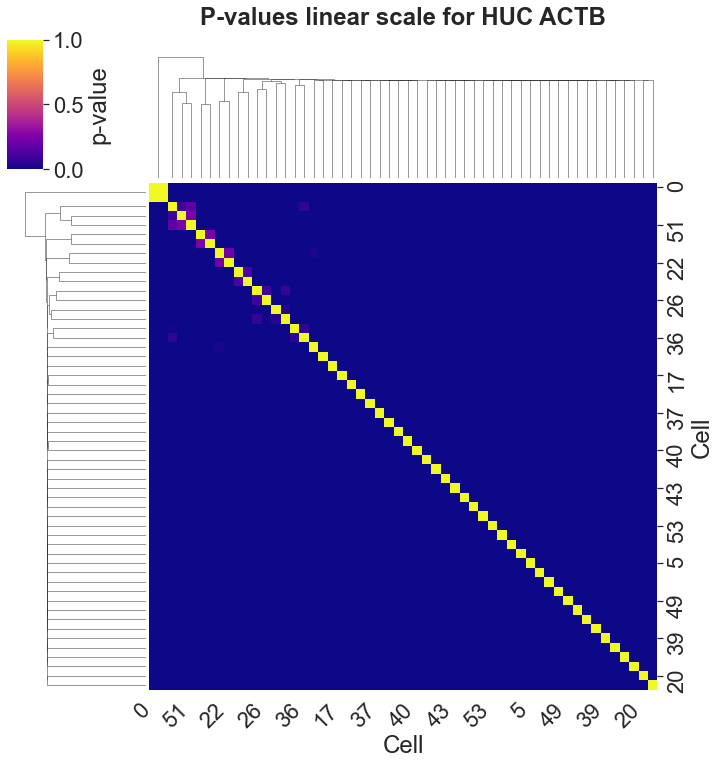

<Figure size 3000x2000 with 0 Axes>

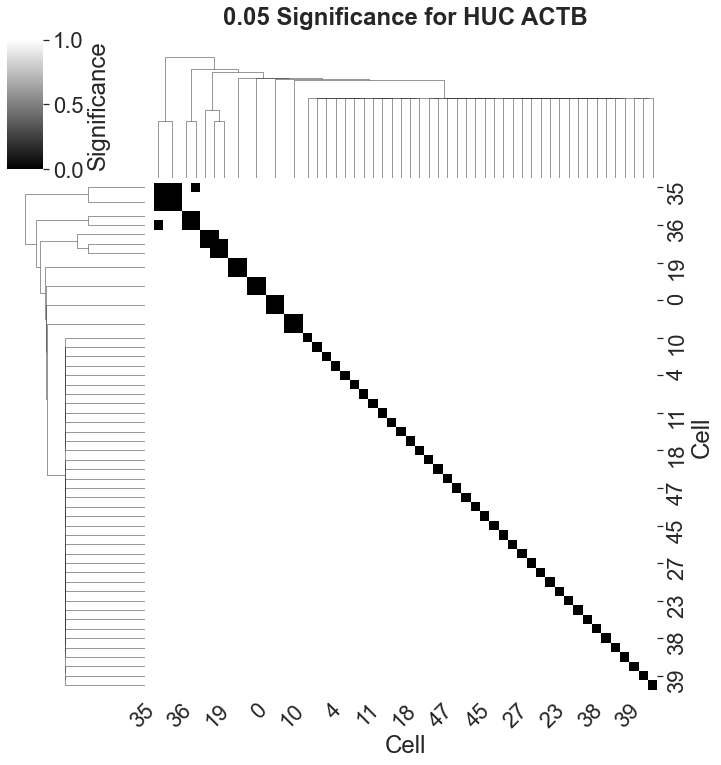

<Figure size 3000x2000 with 0 Axes>

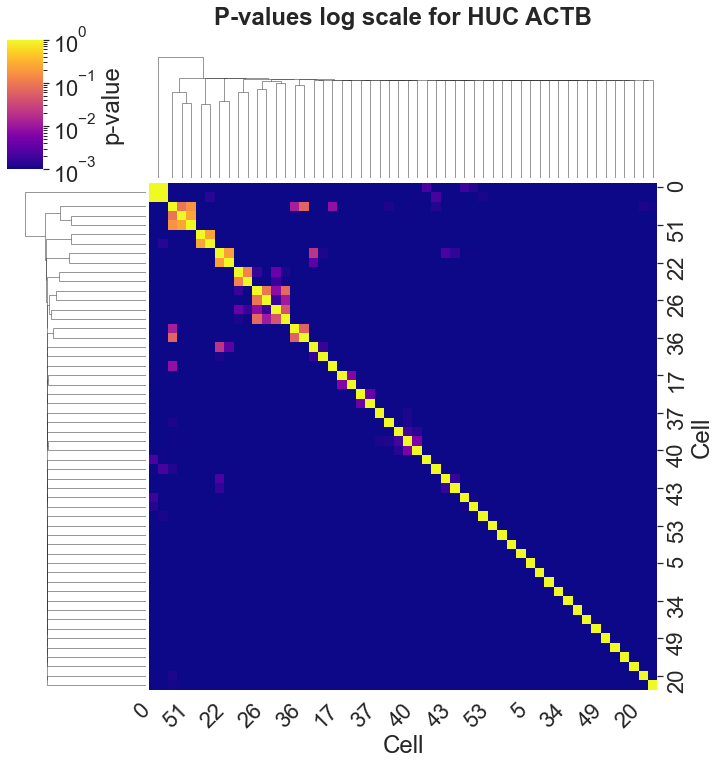

<Figure size 699x747 with 0 Axes>

<Figure size 3000x2000 with 0 Axes>

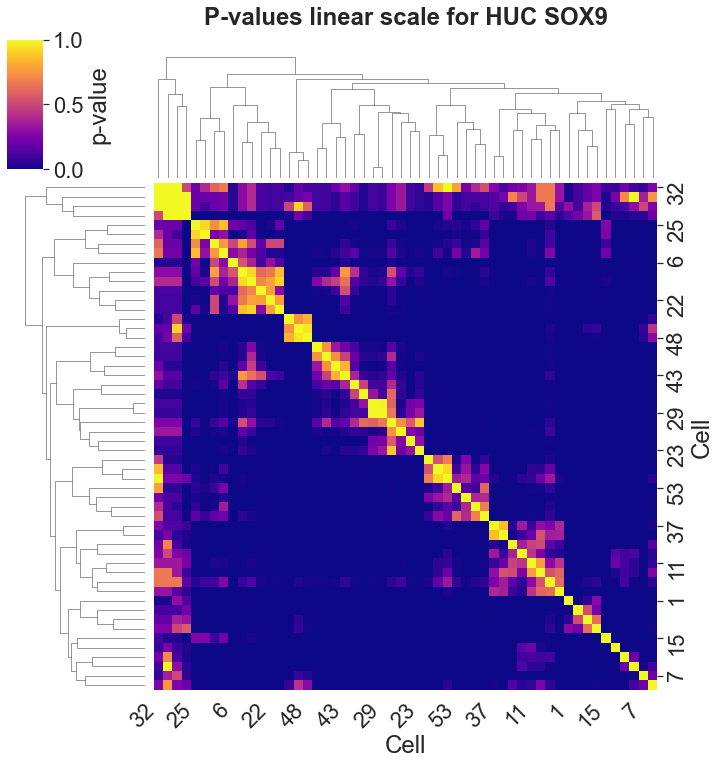

<Figure size 3000x2000 with 0 Axes>

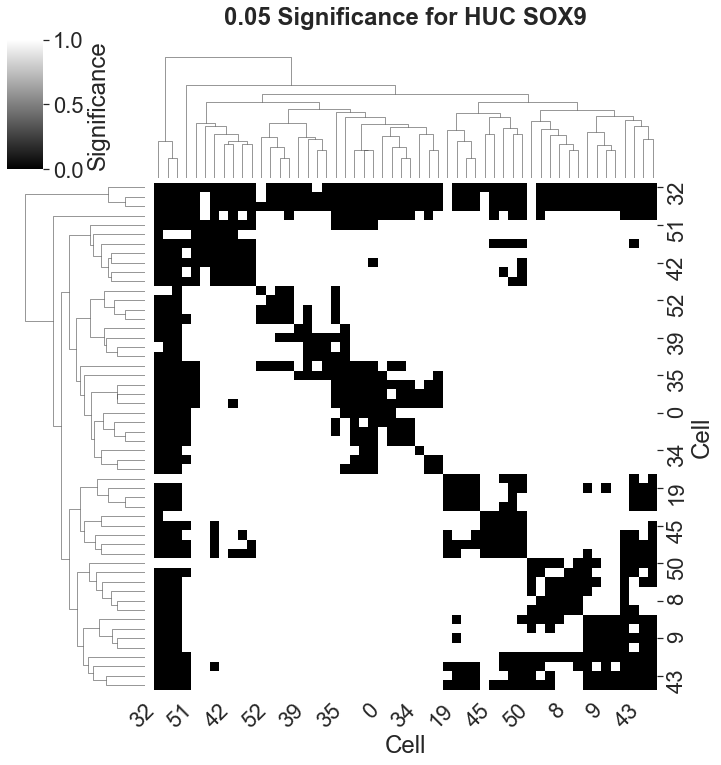

<Figure size 3000x2000 with 0 Axes>

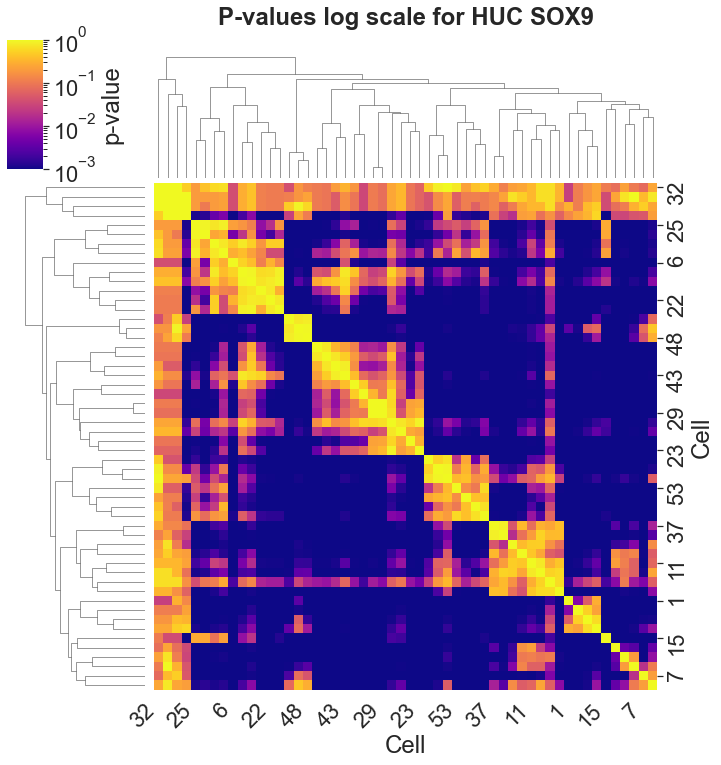

<Figure size 699x747 with 0 Axes>

<Figure size 3000x2000 with 0 Axes>

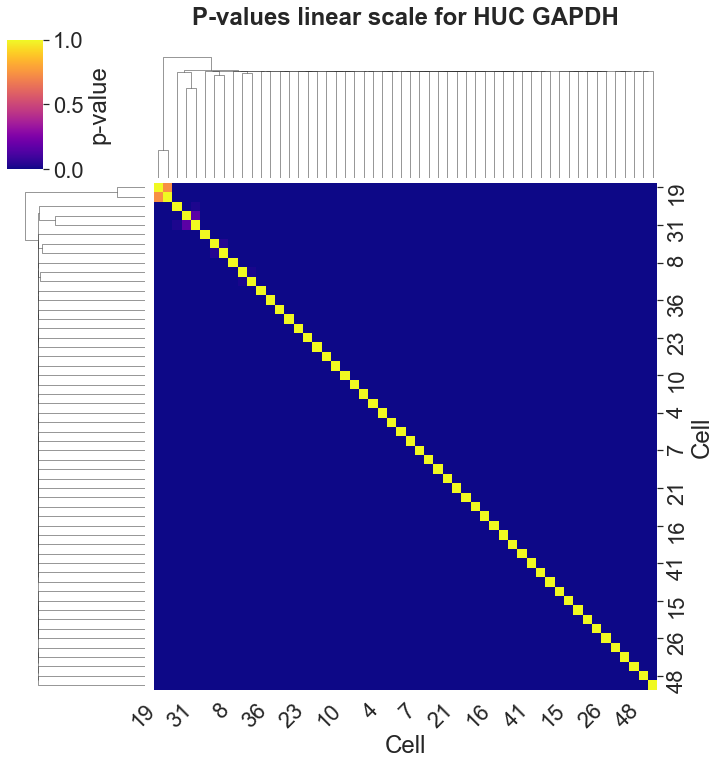

<Figure size 3000x2000 with 0 Axes>

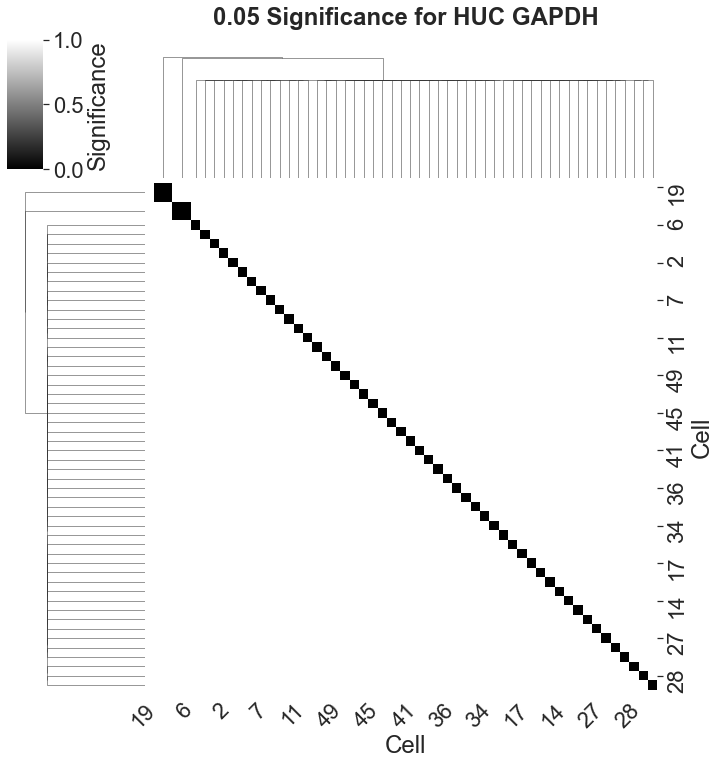

<Figure size 3000x2000 with 0 Axes>

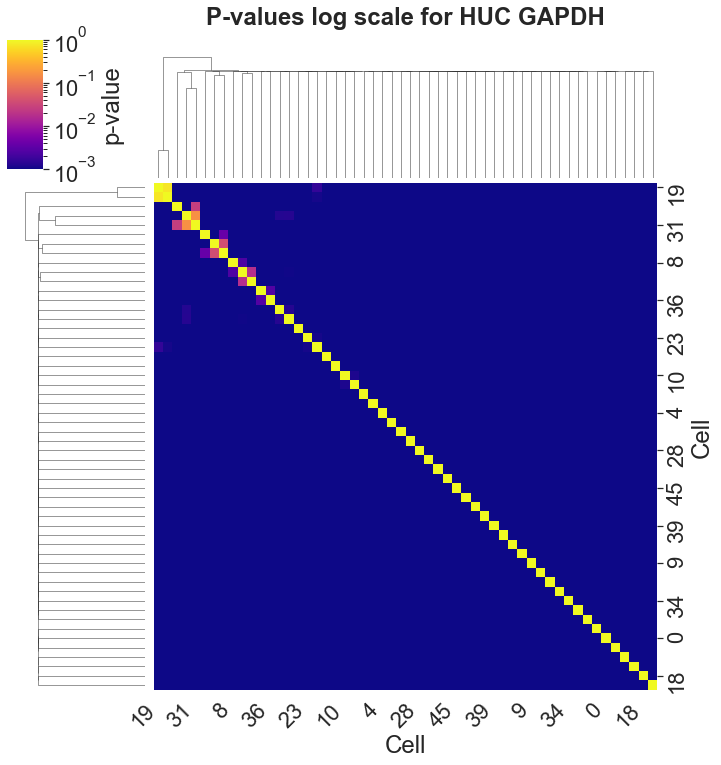

<Figure size 699x747 with 0 Axes>

<Figure size 3000x2000 with 0 Axes>

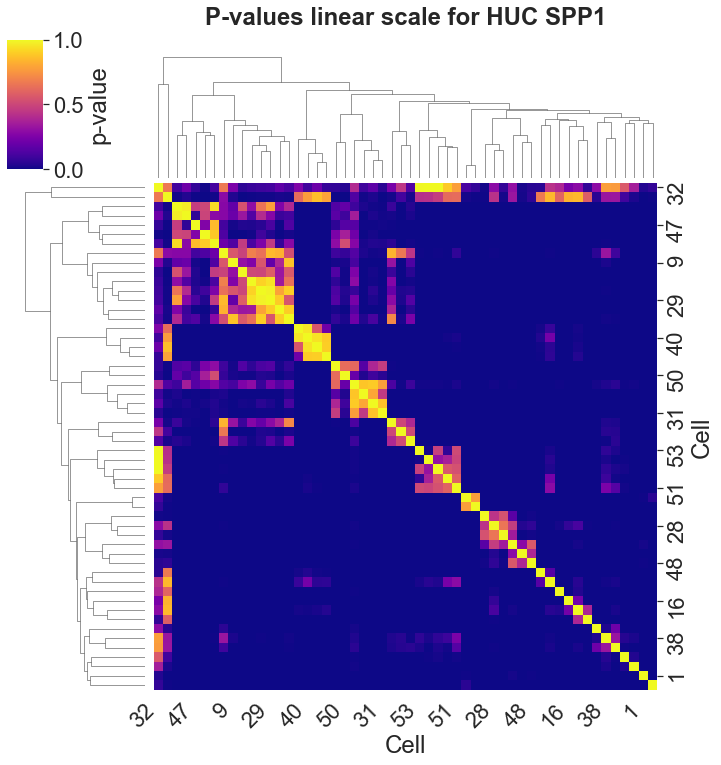

<Figure size 3000x2000 with 0 Axes>

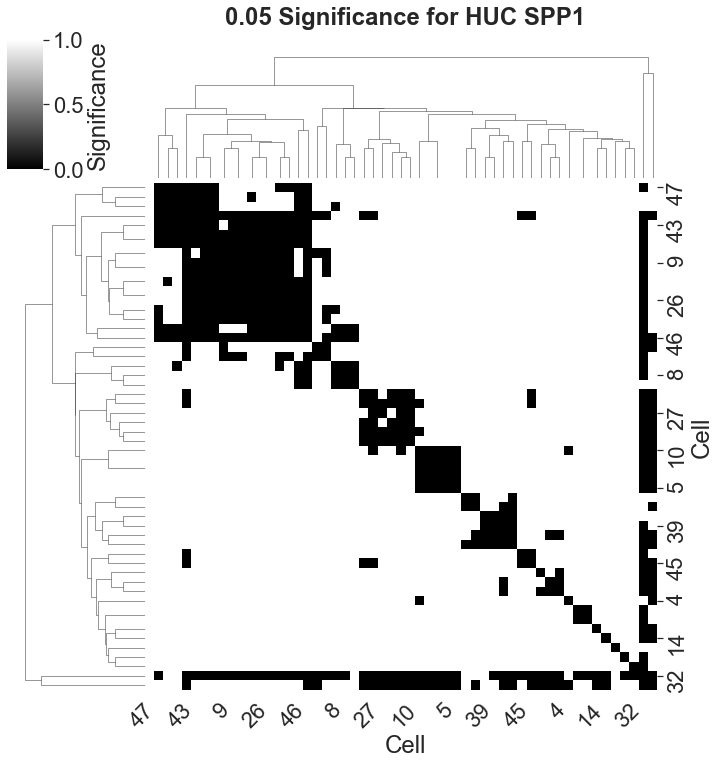

<Figure size 3000x2000 with 0 Axes>

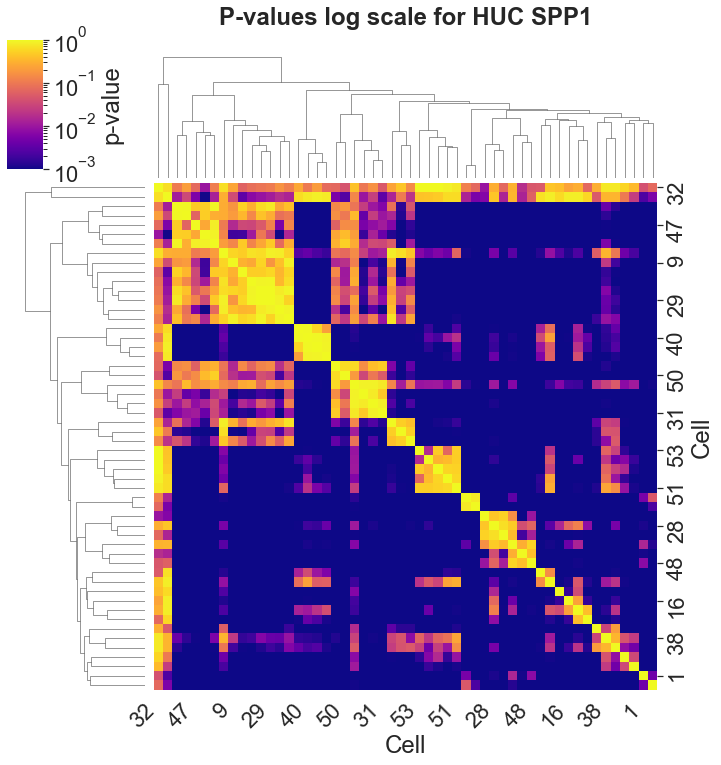

<Figure size 699x747 with 0 Axes>

<Figure size 3000x2000 with 0 Axes>

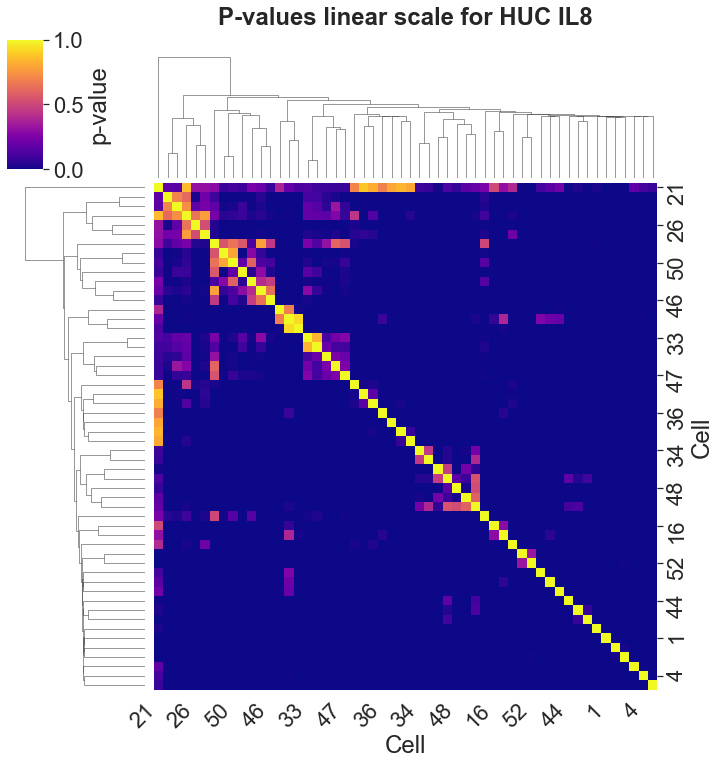

<Figure size 3000x2000 with 0 Axes>

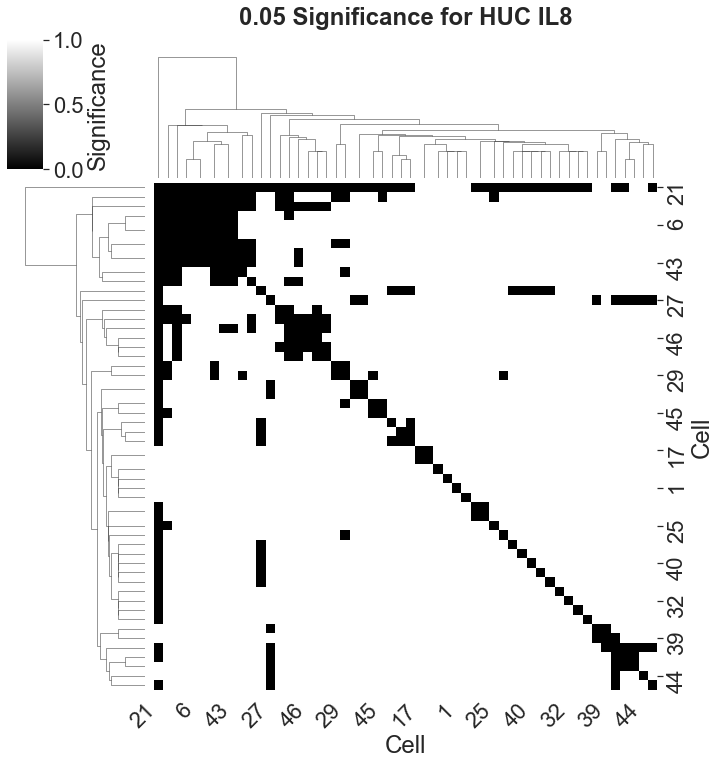

<Figure size 3000x2000 with 0 Axes>

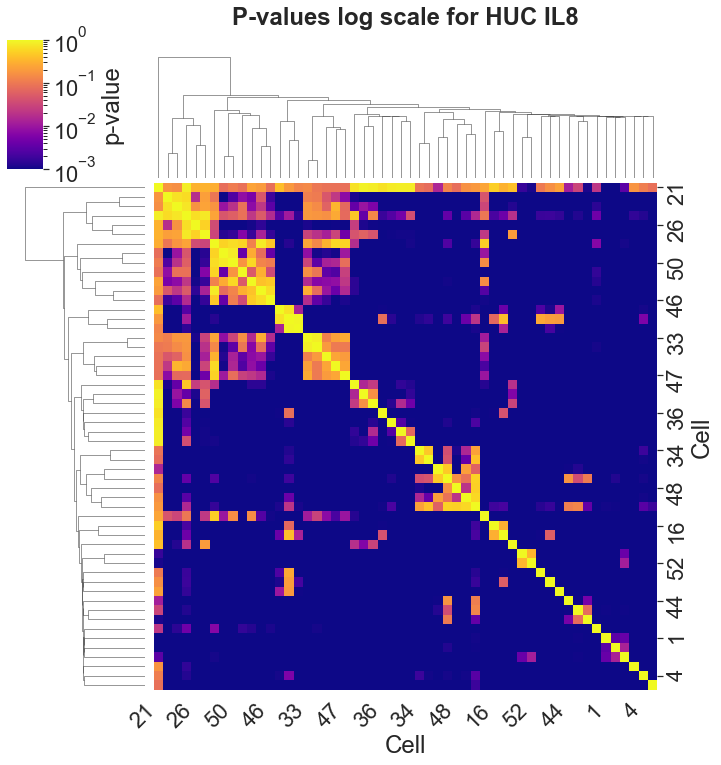

<Figure size 699x747 with 0 Axes>

<Figure size 3000x2000 with 0 Axes>

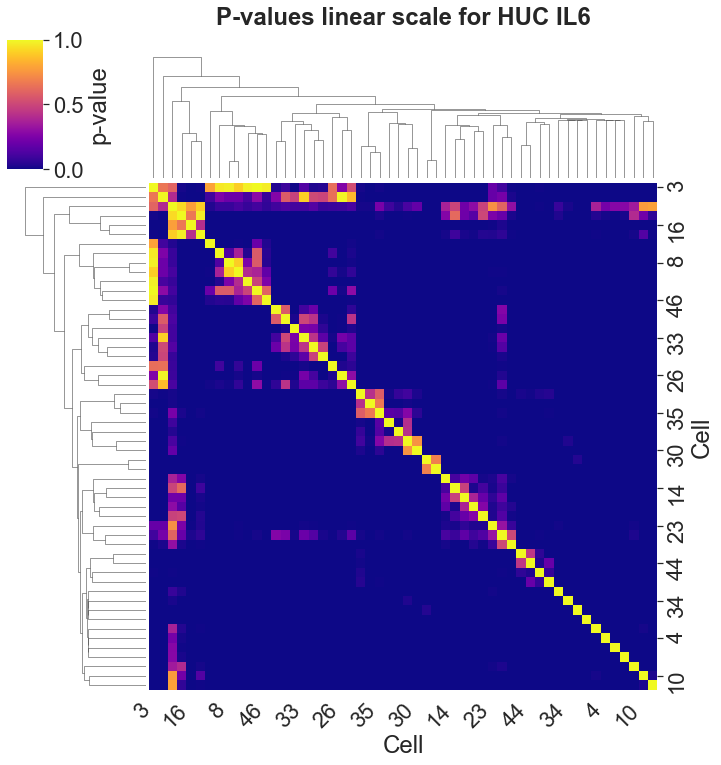

<Figure size 3000x2000 with 0 Axes>

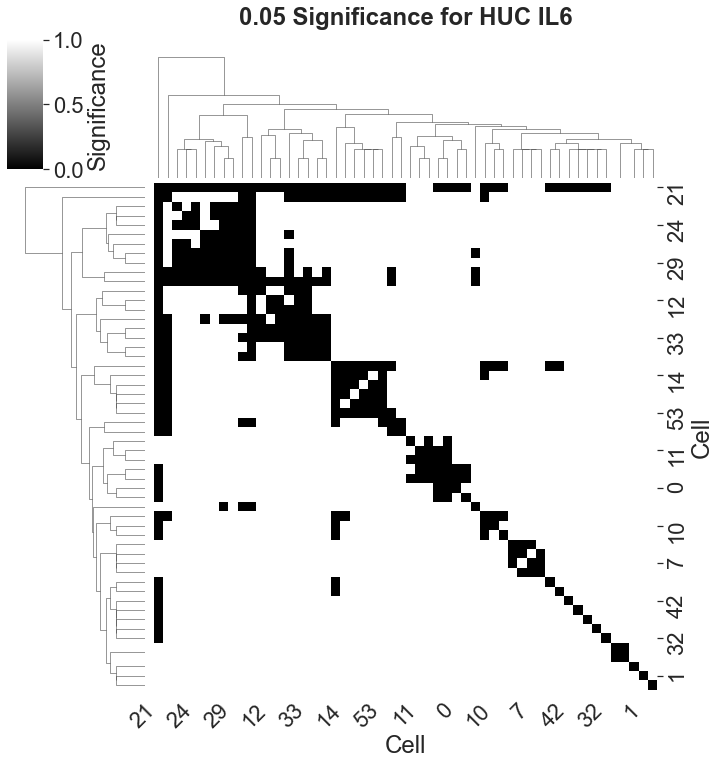

<Figure size 3000x2000 with 0 Axes>

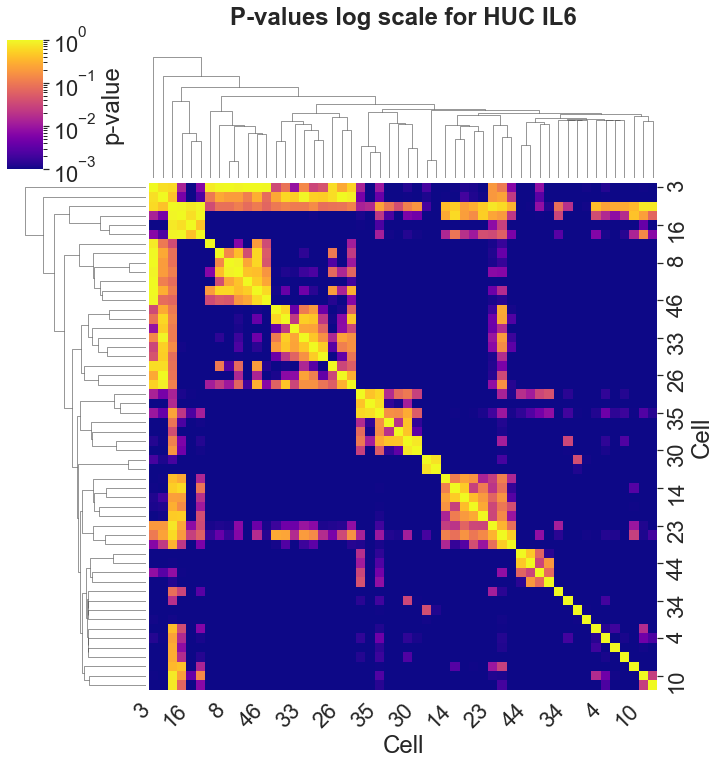

<Figure size 699x747 with 0 Axes>

<Figure size 3000x2000 with 0 Axes>

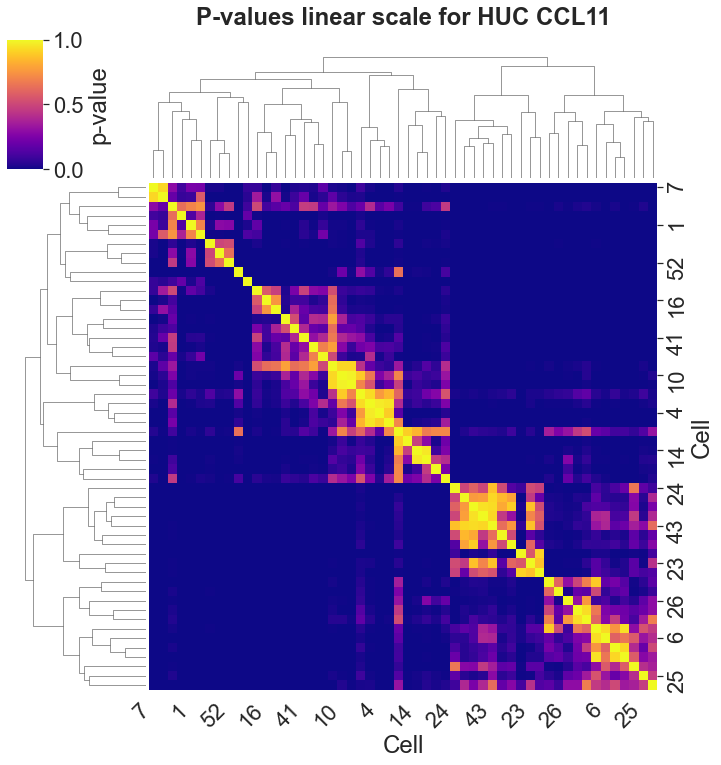

<Figure size 3000x2000 with 0 Axes>

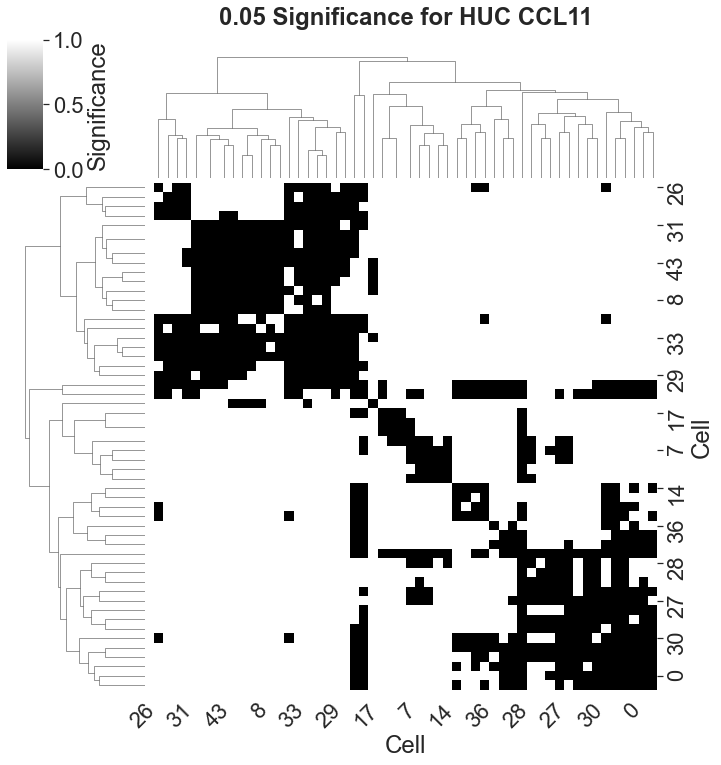

<Figure size 3000x2000 with 0 Axes>

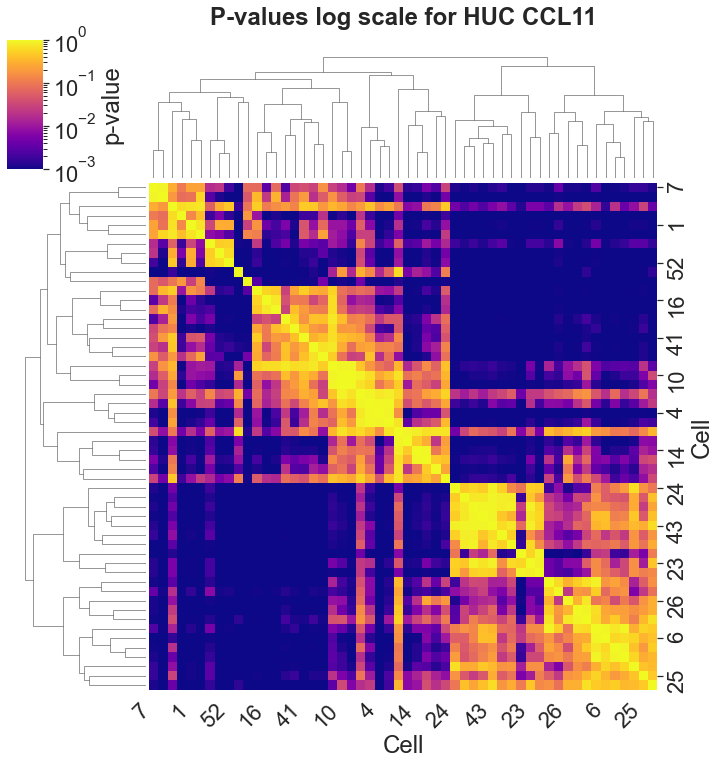

<Figure size 699x747 with 0 Axes>

<Figure size 3000x2000 with 0 Axes>

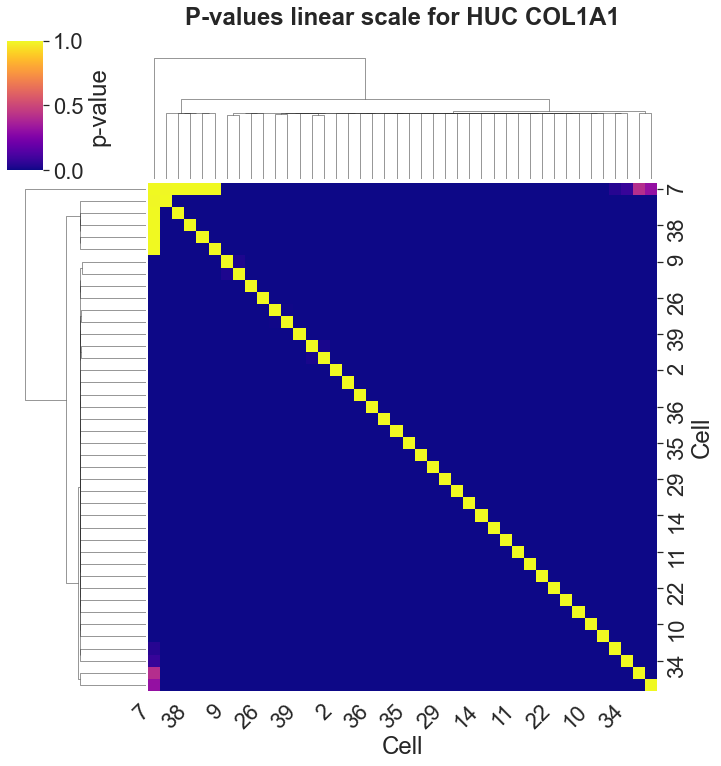

<Figure size 3000x2000 with 0 Axes>

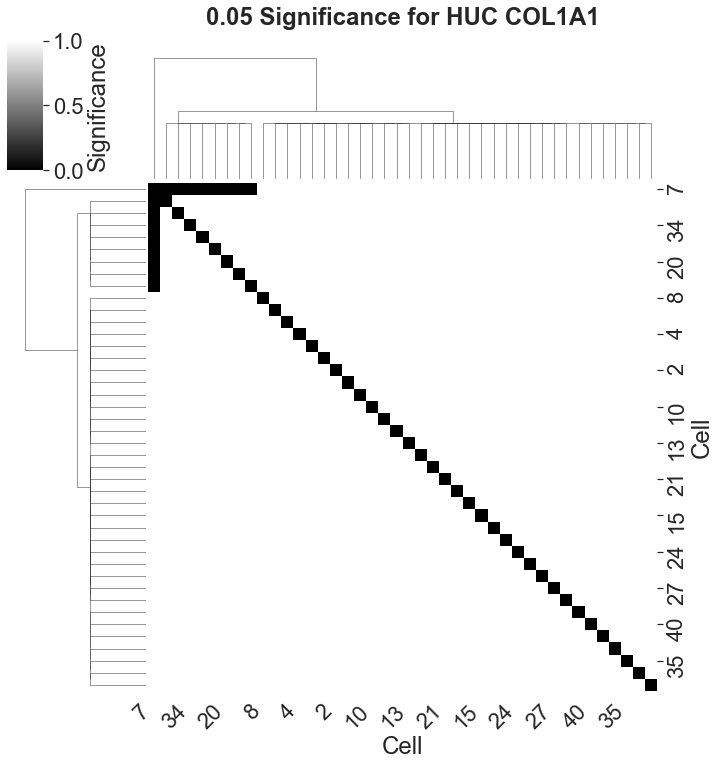

<Figure size 3000x2000 with 0 Axes>

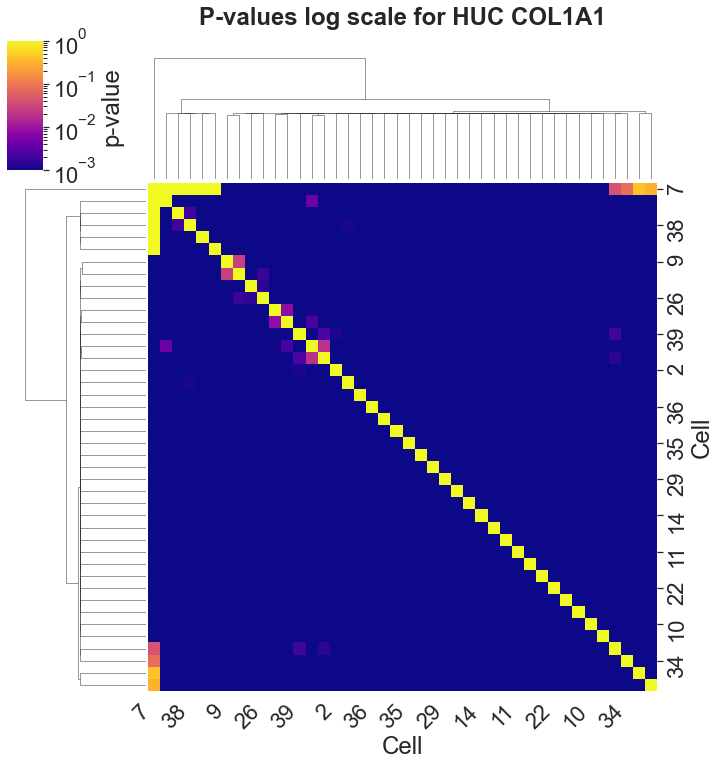

<Figure size 699x747 with 0 Axes>

<Figure size 3000x2000 with 0 Axes>

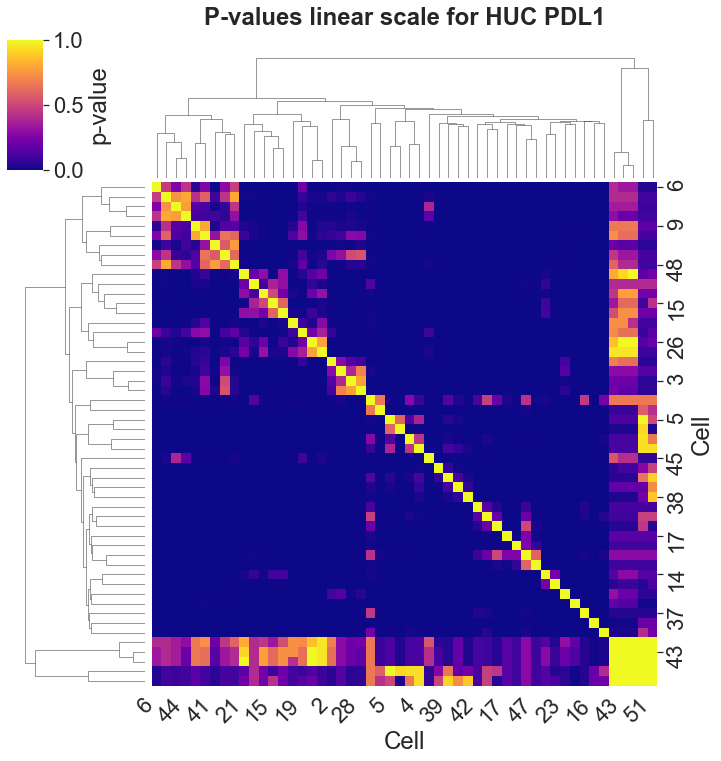

<Figure size 3000x2000 with 0 Axes>

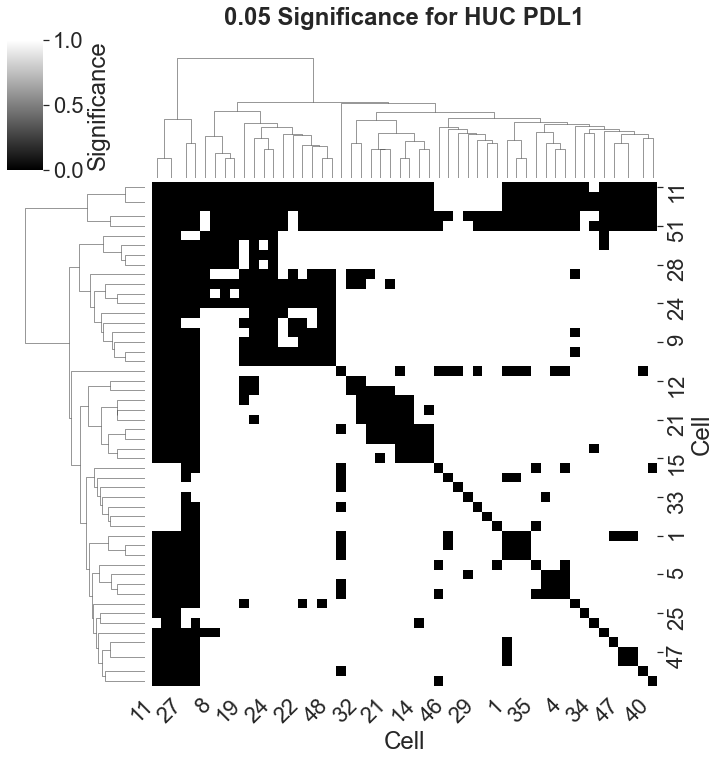

<Figure size 3000x2000 with 0 Axes>

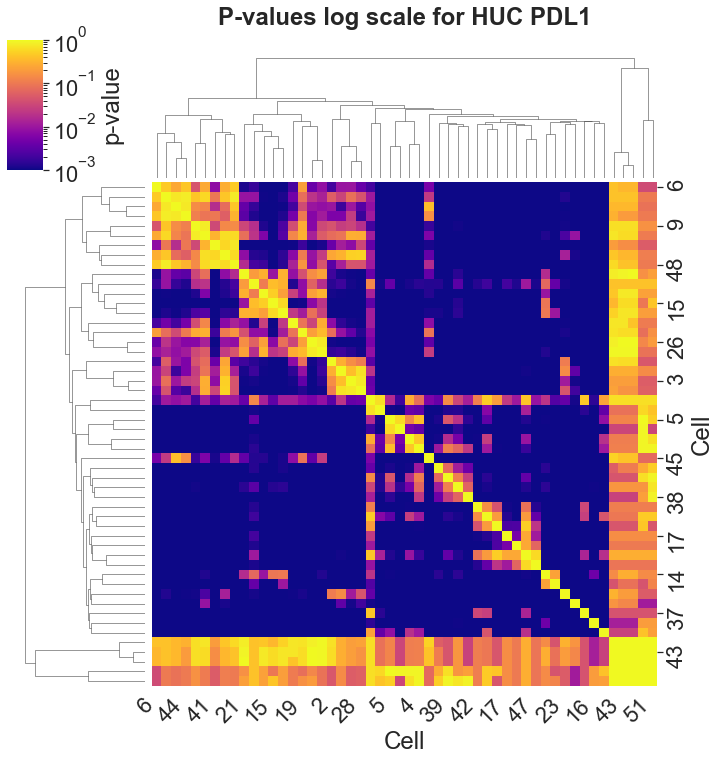

<Figure size 699x747 with 0 Axes>

<Figure size 3000x2000 with 0 Axes>

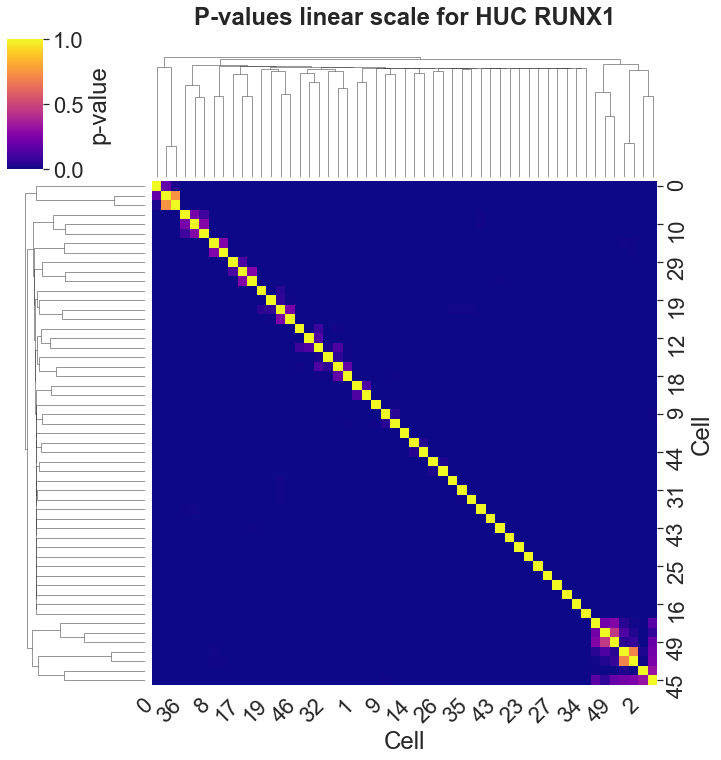

<Figure size 3000x2000 with 0 Axes>

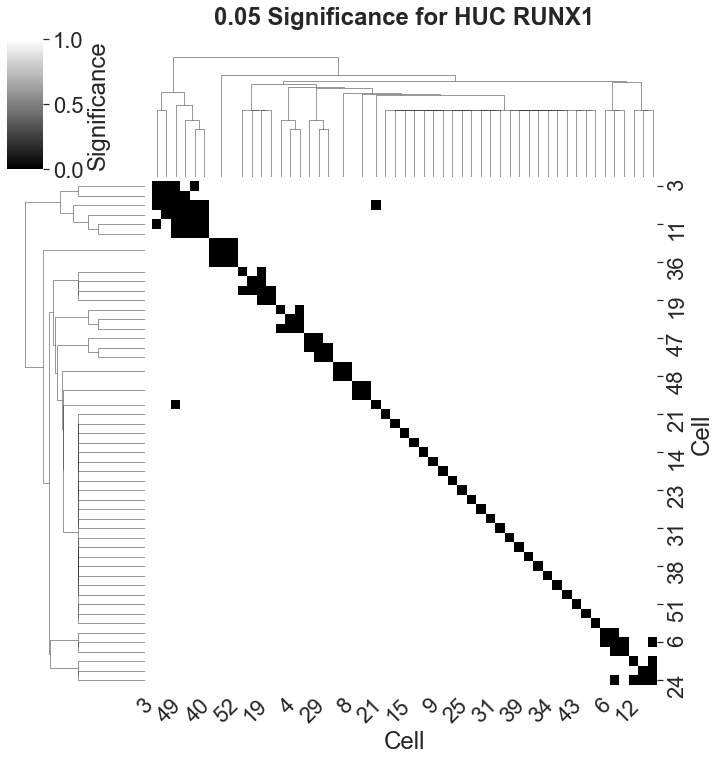

<Figure size 3000x2000 with 0 Axes>

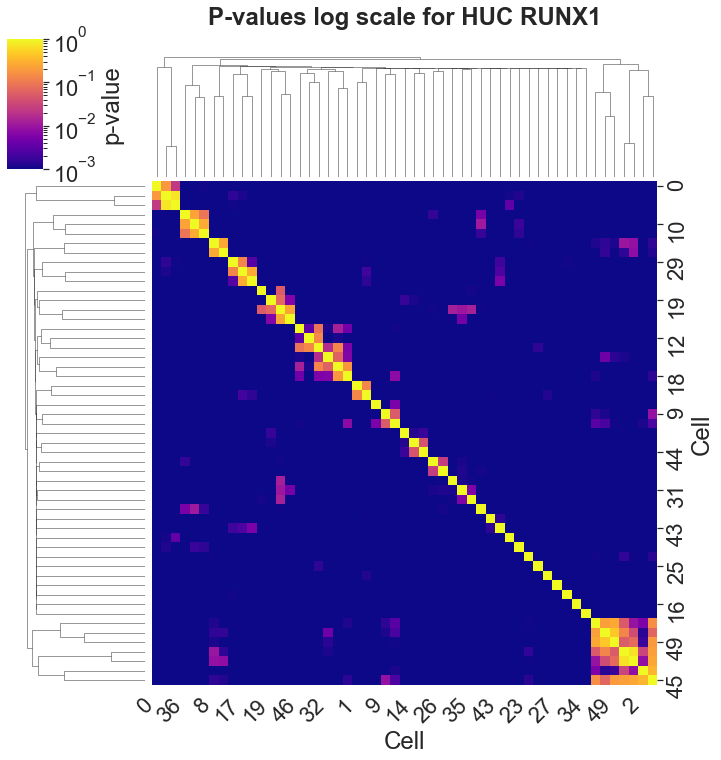

<Figure size 699x747 with 0 Axes>

<Figure size 3000x2000 with 0 Axes>

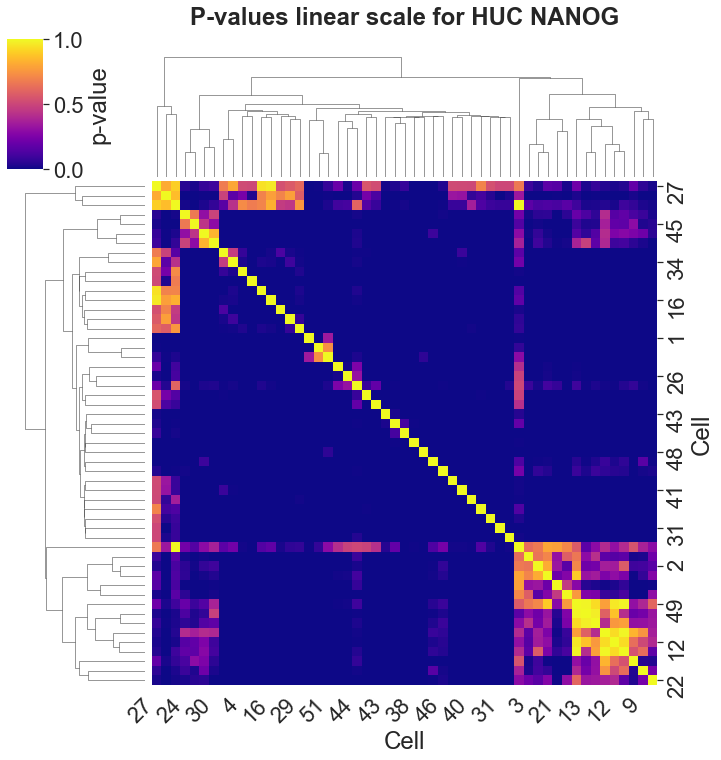

<Figure size 3000x2000 with 0 Axes>

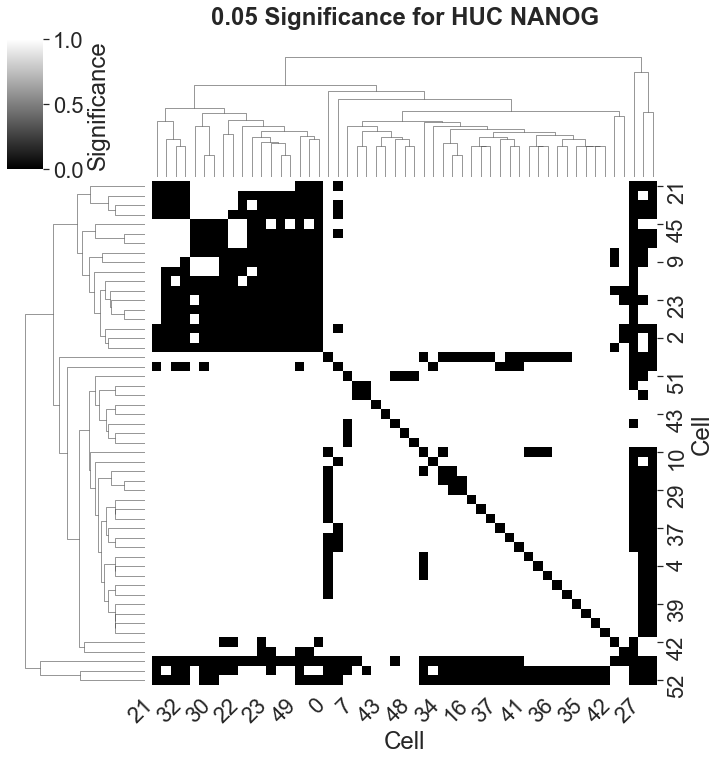

<Figure size 3000x2000 with 0 Axes>

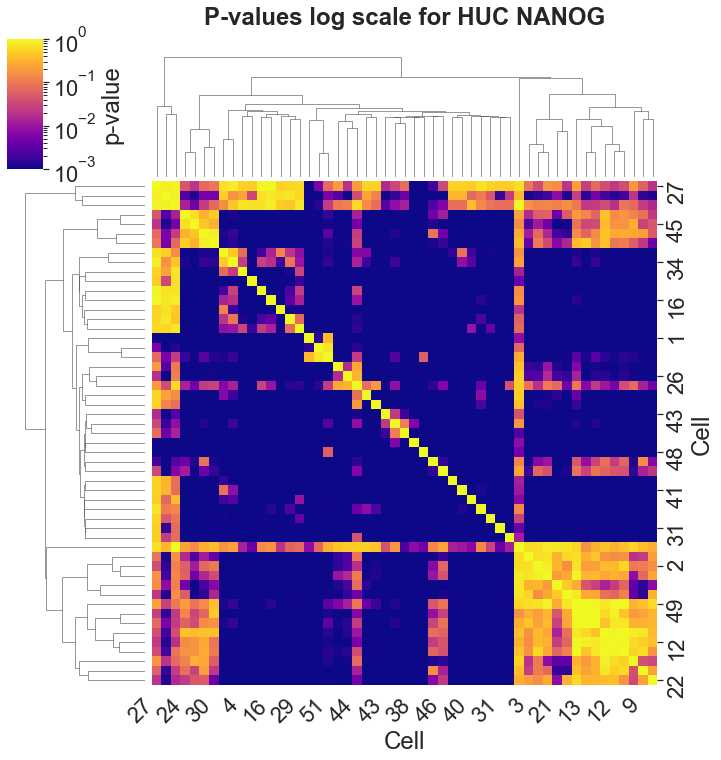

<Figure size 699x747 with 0 Axes>

<Figure size 3000x2000 with 0 Axes>

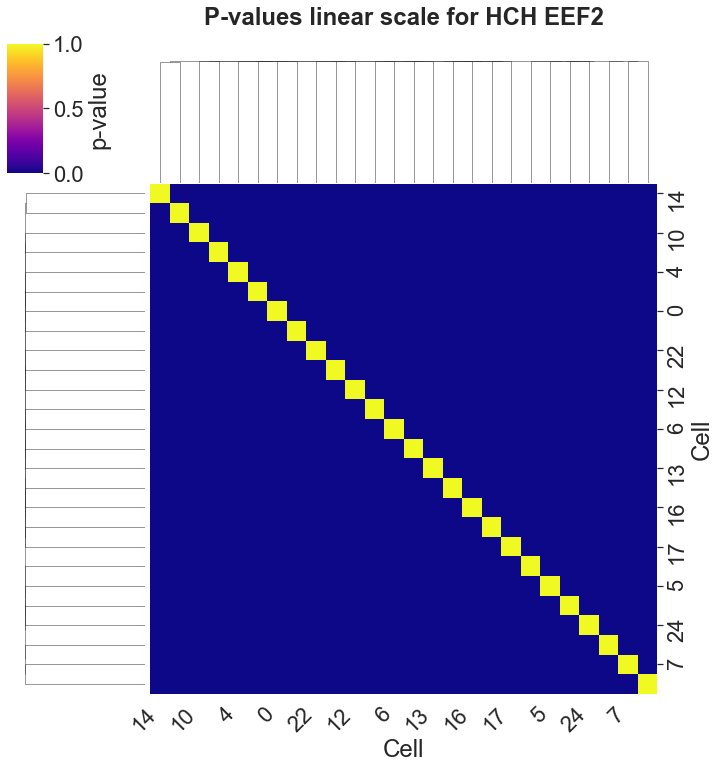

<Figure size 3000x2000 with 0 Axes>

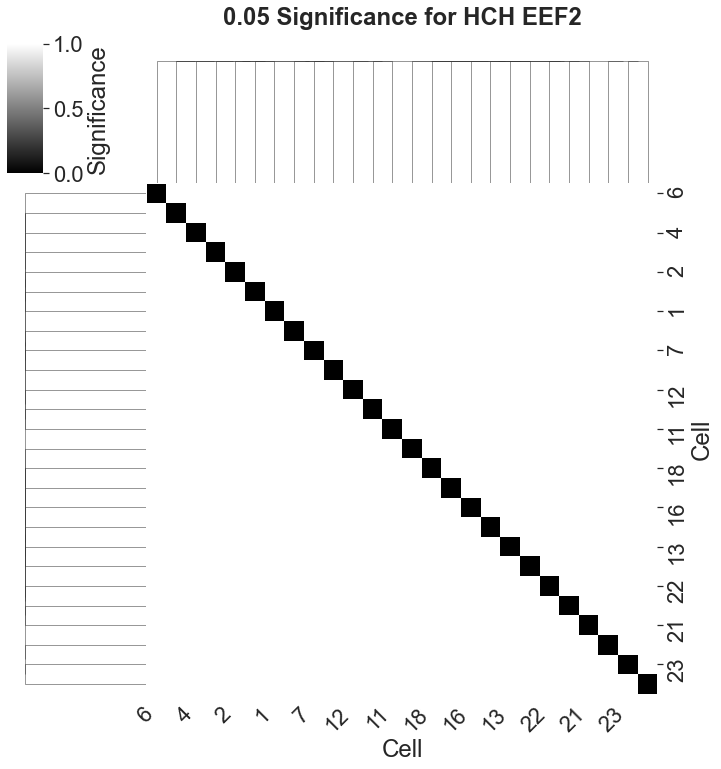

<Figure size 3000x2000 with 0 Axes>

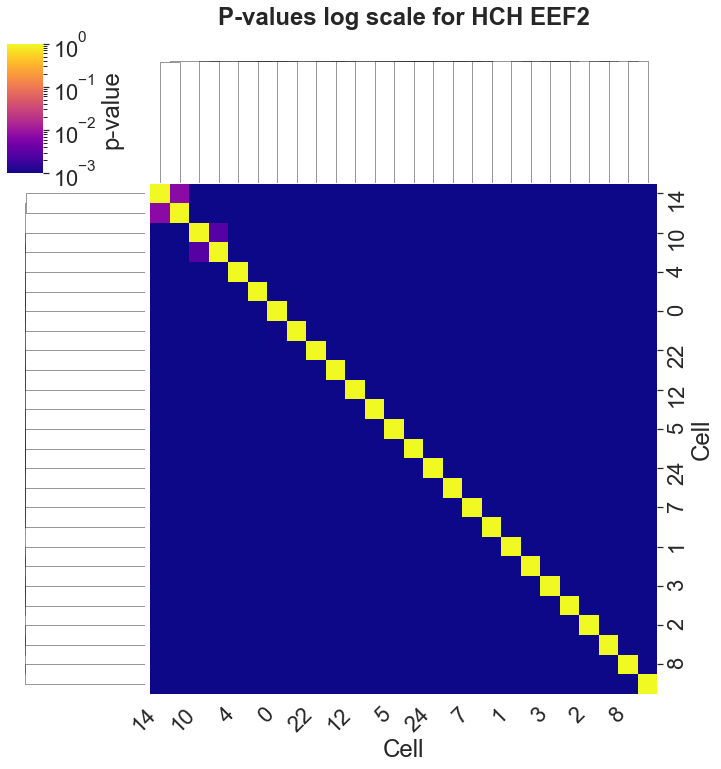

<Figure size 699x747 with 0 Axes>

<Figure size 3000x2000 with 0 Axes>

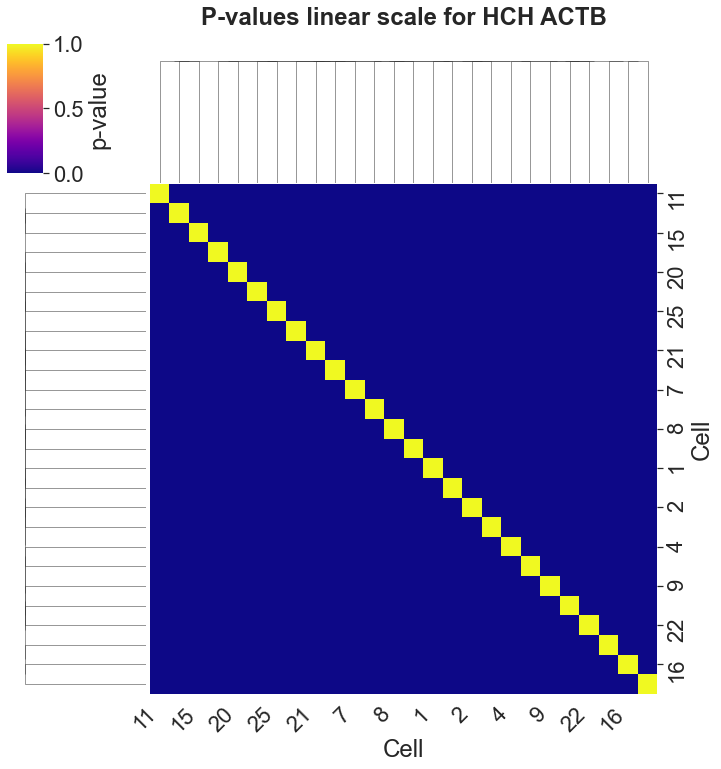

<Figure size 3000x2000 with 0 Axes>

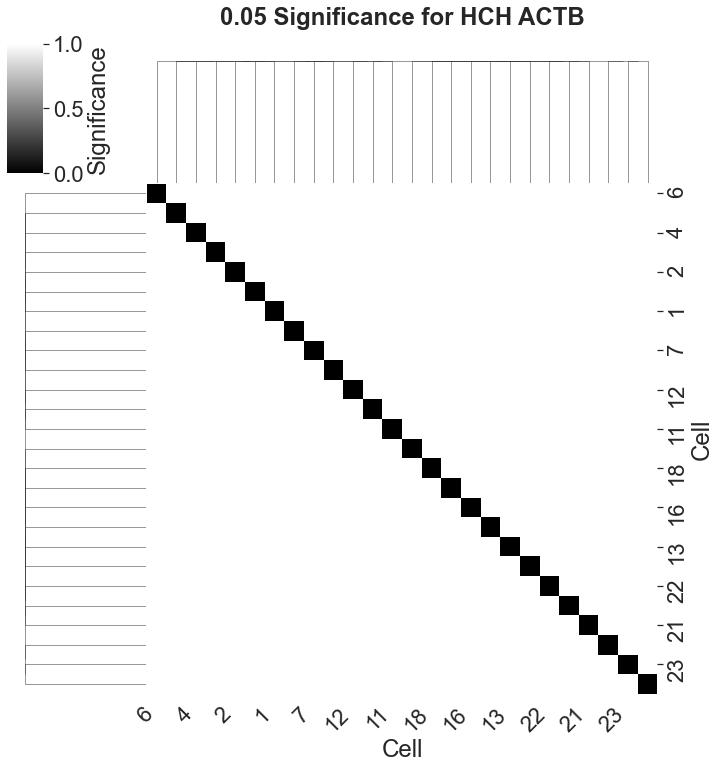

<Figure size 3000x2000 with 0 Axes>

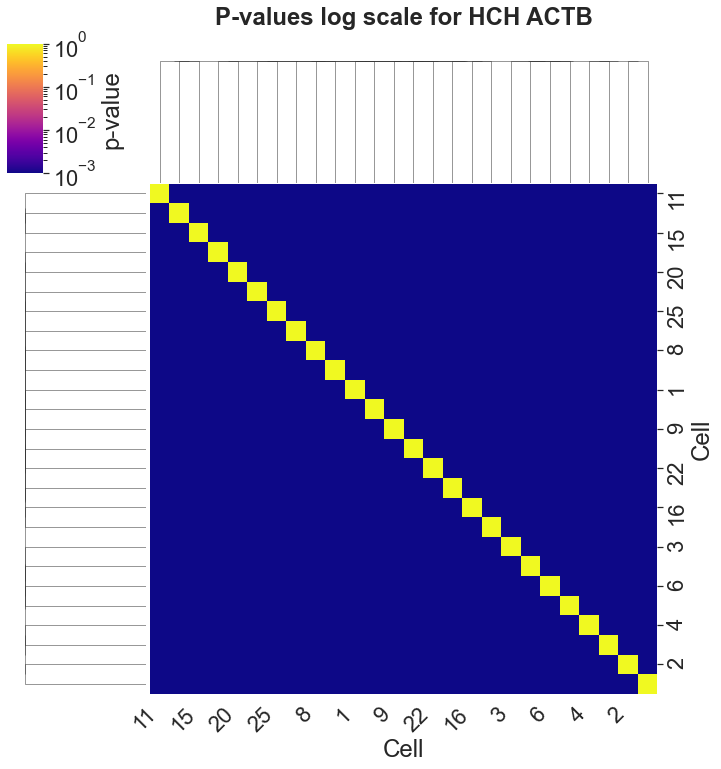

<Figure size 699x747 with 0 Axes>

<Figure size 3000x2000 with 0 Axes>

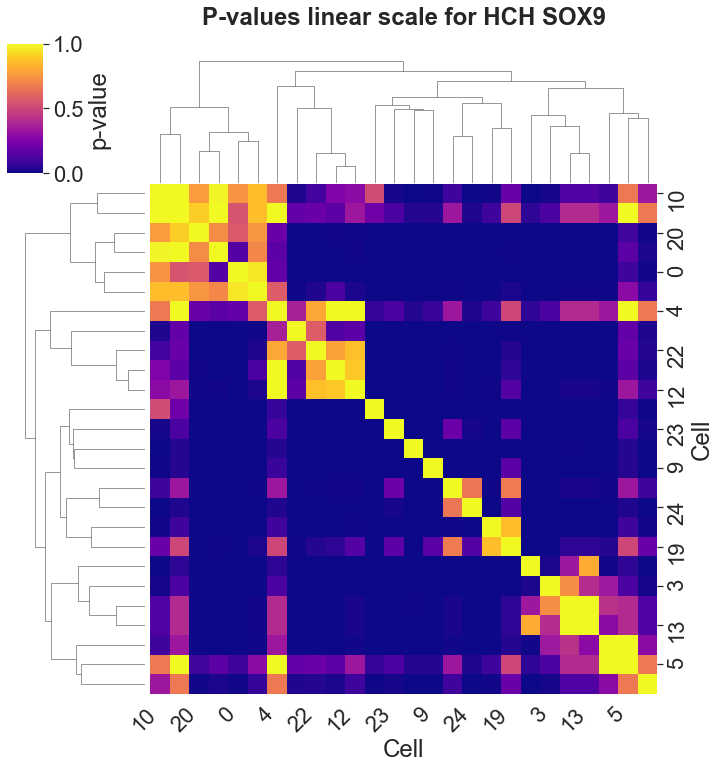

<Figure size 3000x2000 with 0 Axes>

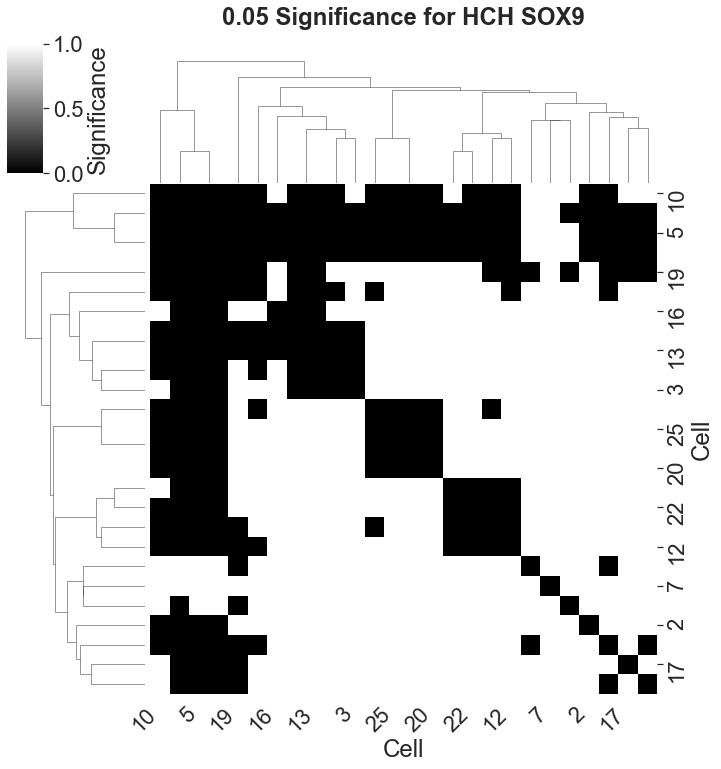

<Figure size 3000x2000 with 0 Axes>

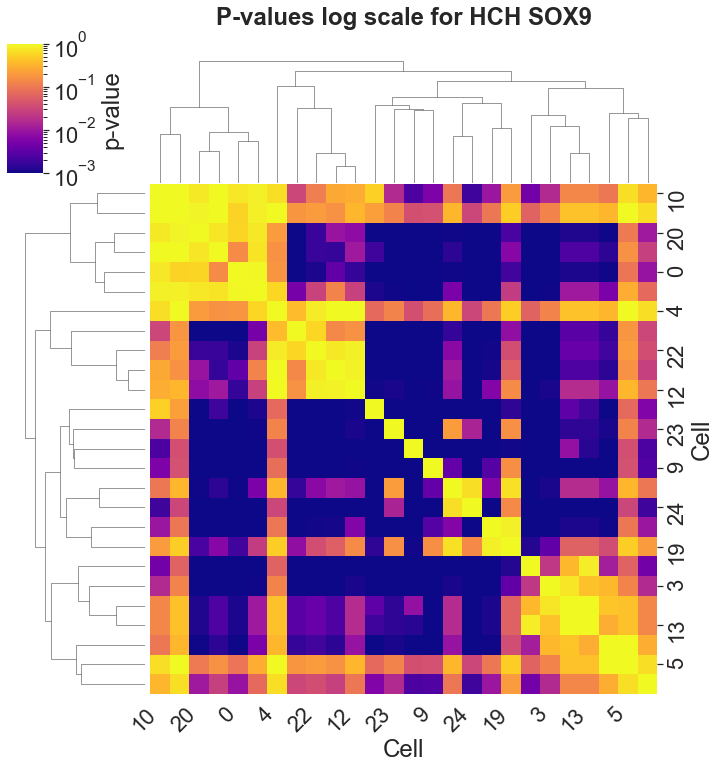

<Figure size 699x747 with 0 Axes>

<Figure size 3000x2000 with 0 Axes>

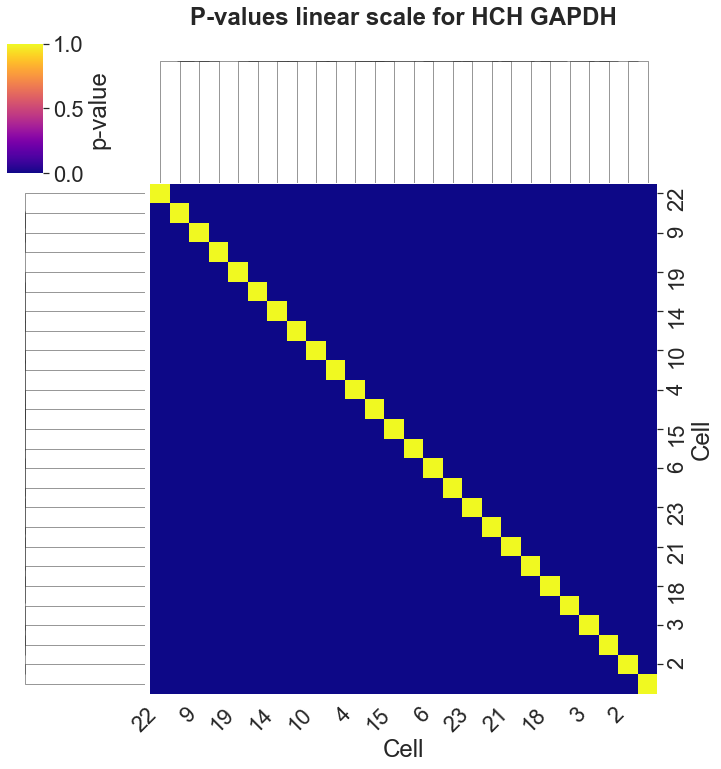

<Figure size 3000x2000 with 0 Axes>

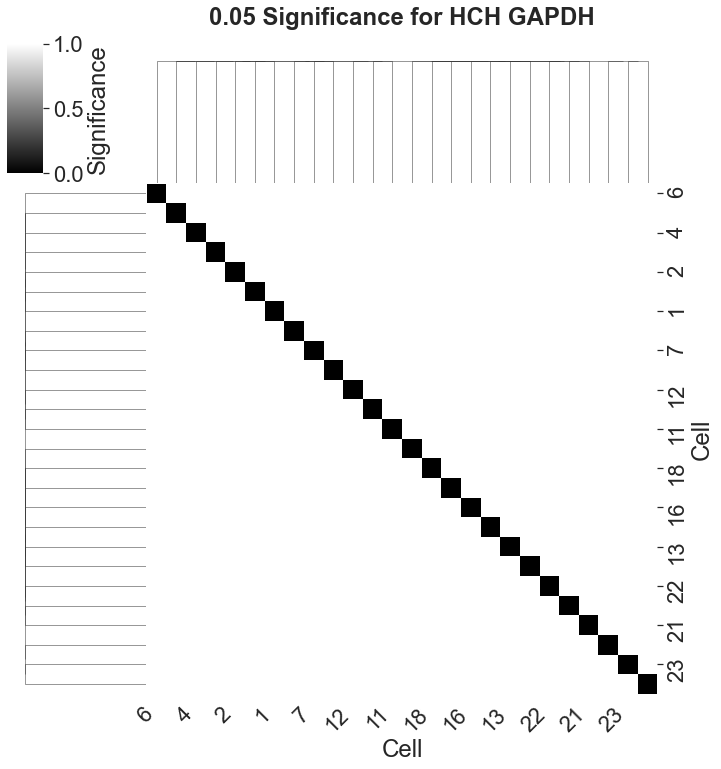

<Figure size 3000x2000 with 0 Axes>

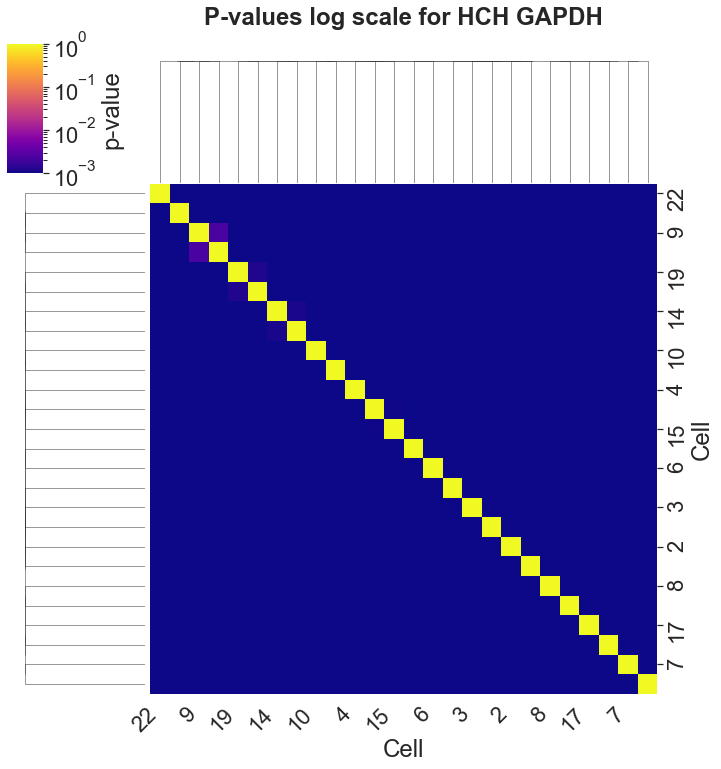

<Figure size 699x747 with 0 Axes>

<Figure size 3000x2000 with 0 Axes>

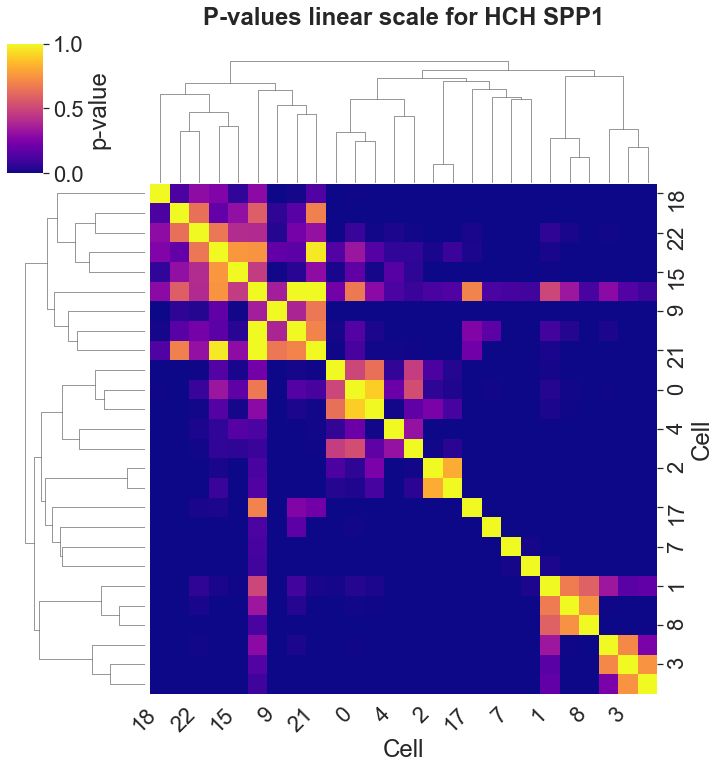

<Figure size 3000x2000 with 0 Axes>

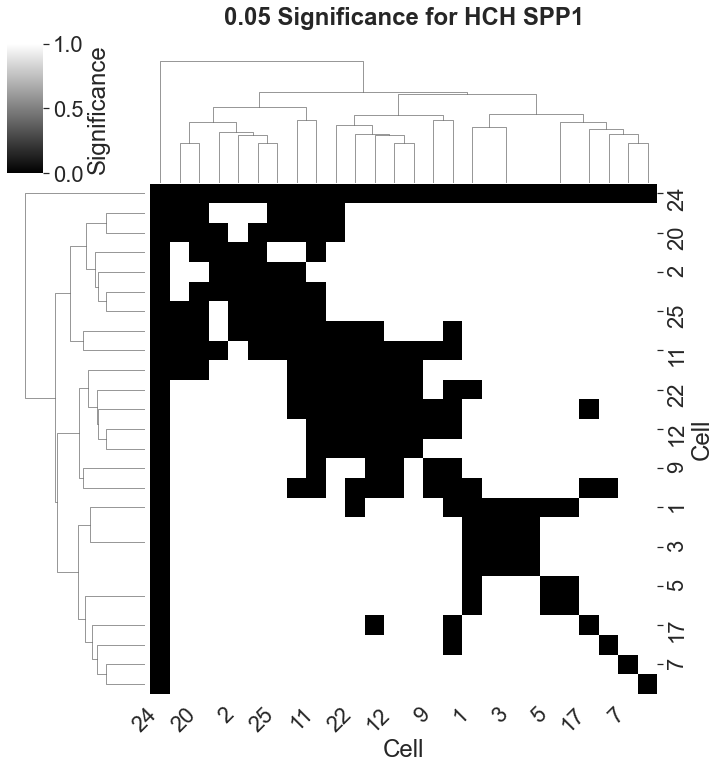

<Figure size 3000x2000 with 0 Axes>

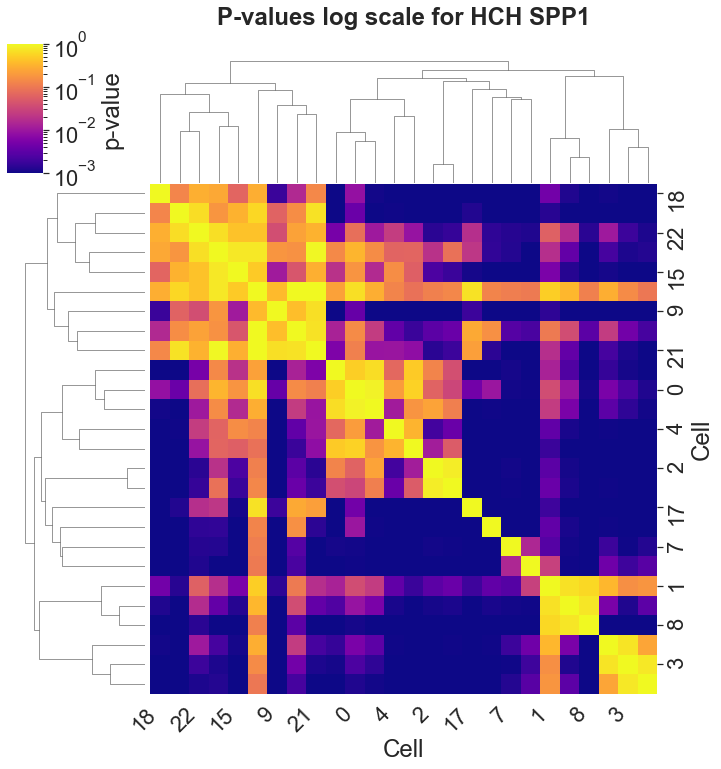

<Figure size 699x747 with 0 Axes>

<Figure size 3000x2000 with 0 Axes>

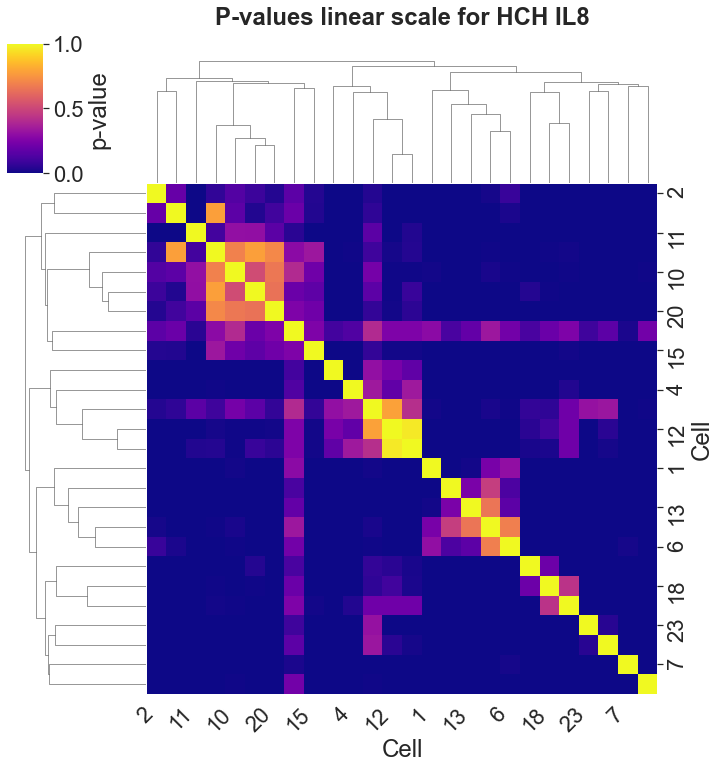

<Figure size 3000x2000 with 0 Axes>

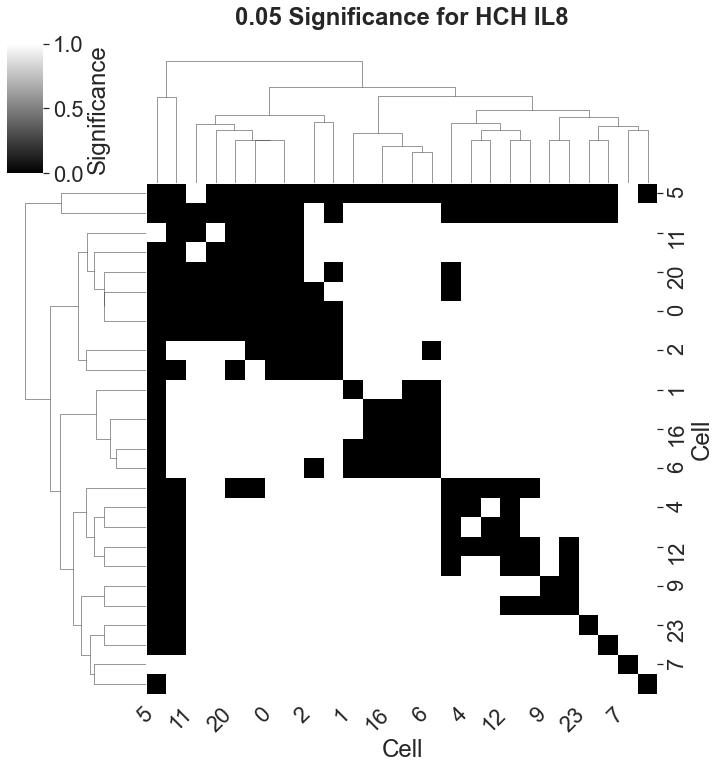

<Figure size 3000x2000 with 0 Axes>

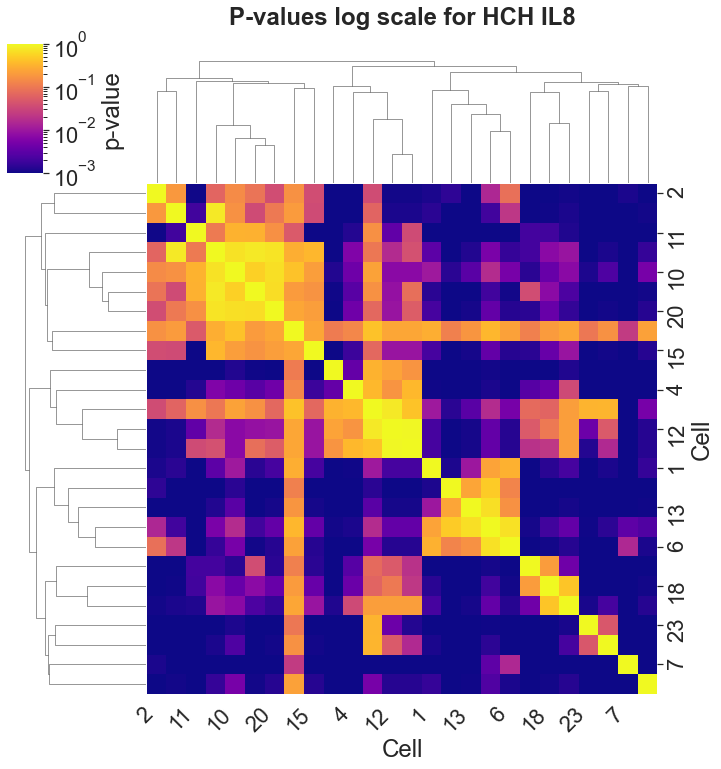

<Figure size 699x747 with 0 Axes>

<Figure size 3000x2000 with 0 Axes>

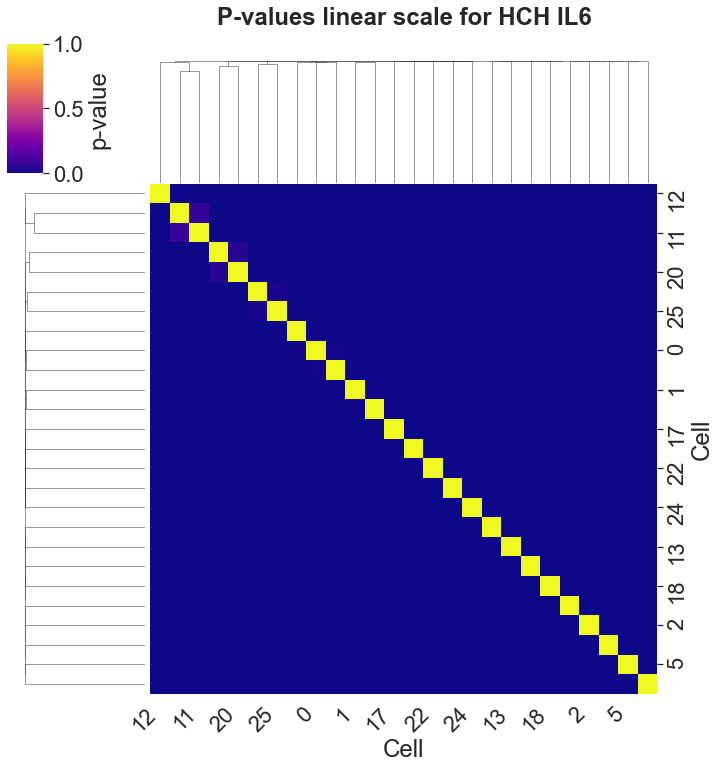

<Figure size 3000x2000 with 0 Axes>

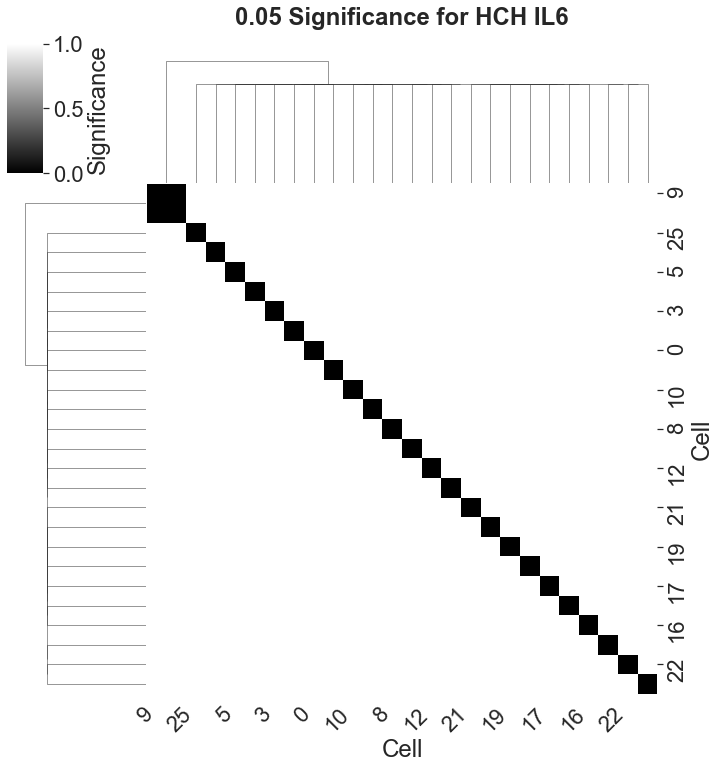

<Figure size 3000x2000 with 0 Axes>

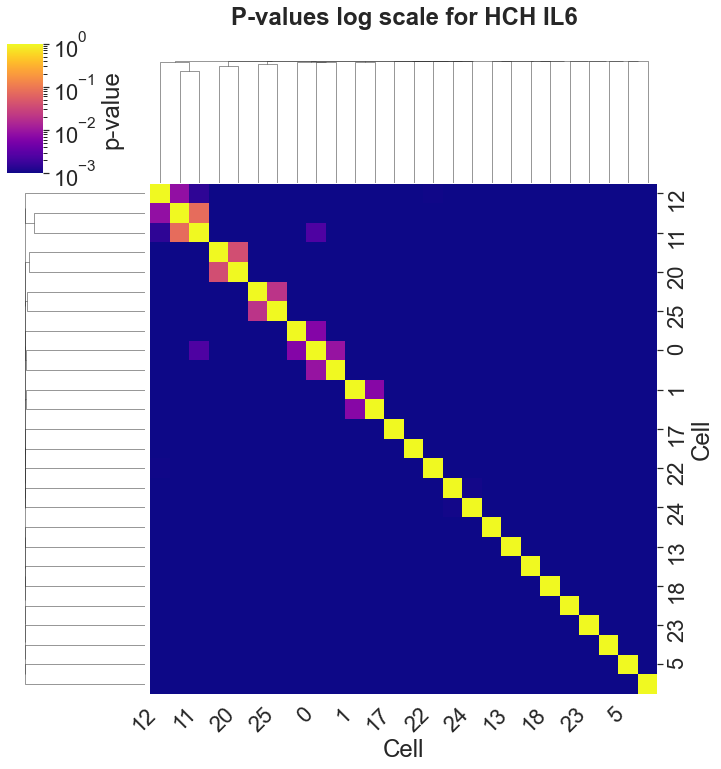

<Figure size 699x747 with 0 Axes>

<Figure size 3000x2000 with 0 Axes>

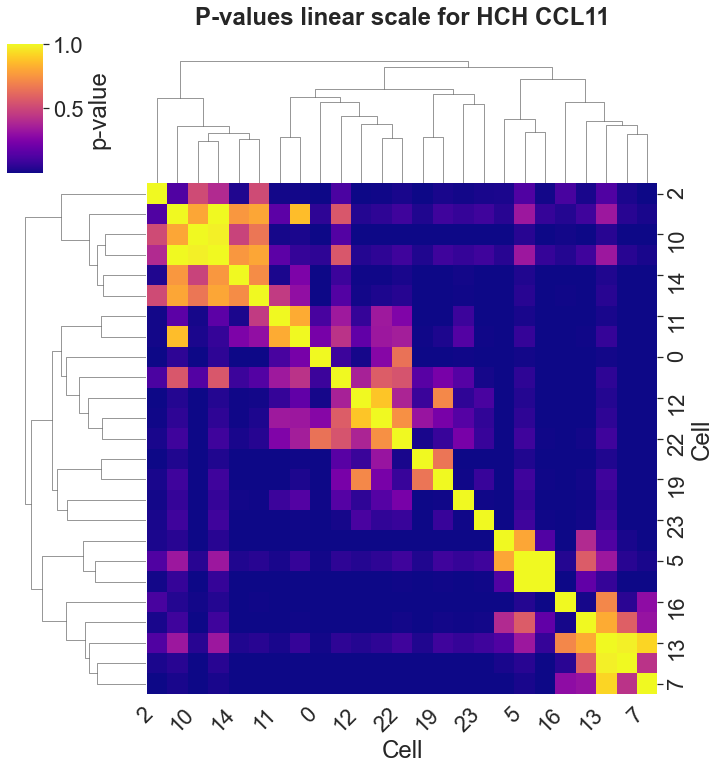

<Figure size 3000x2000 with 0 Axes>

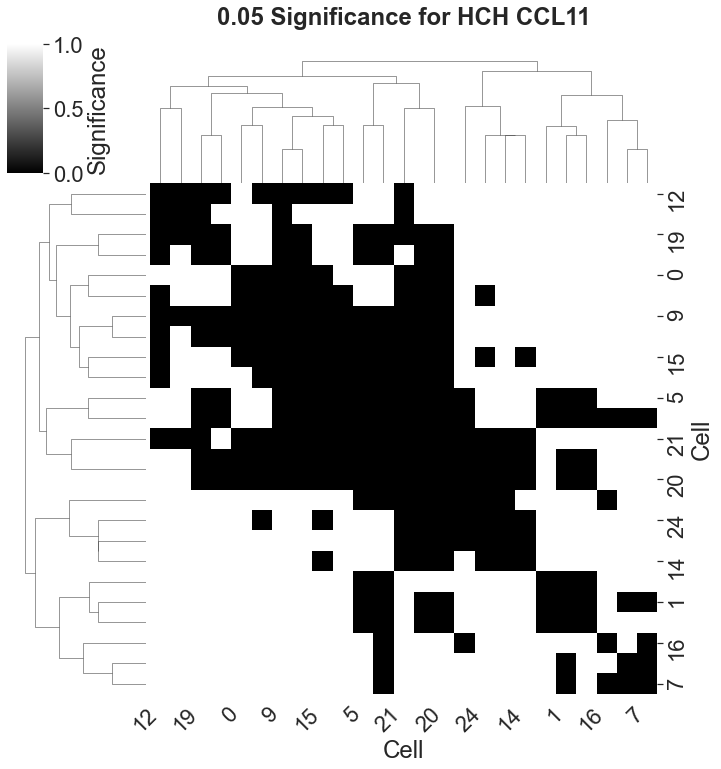

<Figure size 3000x2000 with 0 Axes>

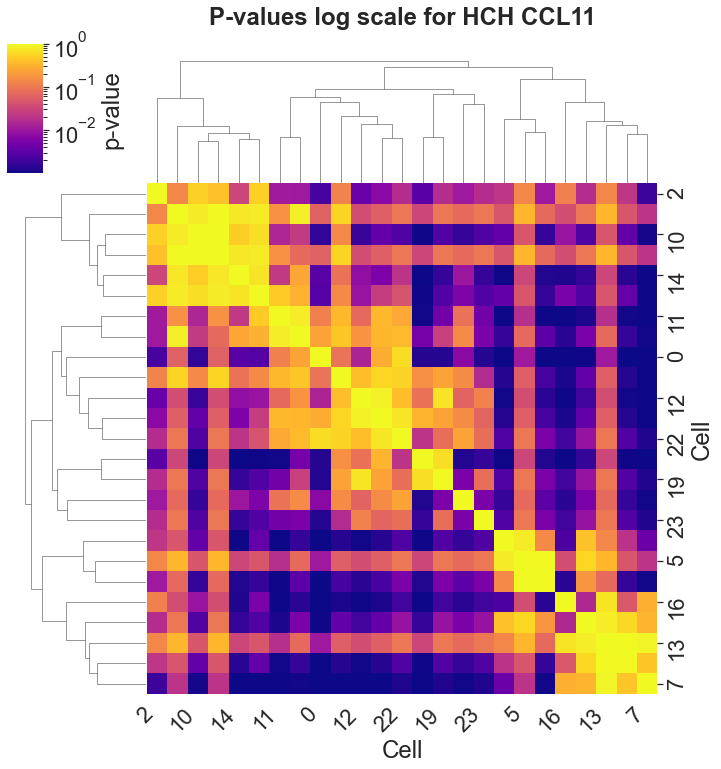

<Figure size 699x747 with 0 Axes>

<Figure size 3000x2000 with 0 Axes>

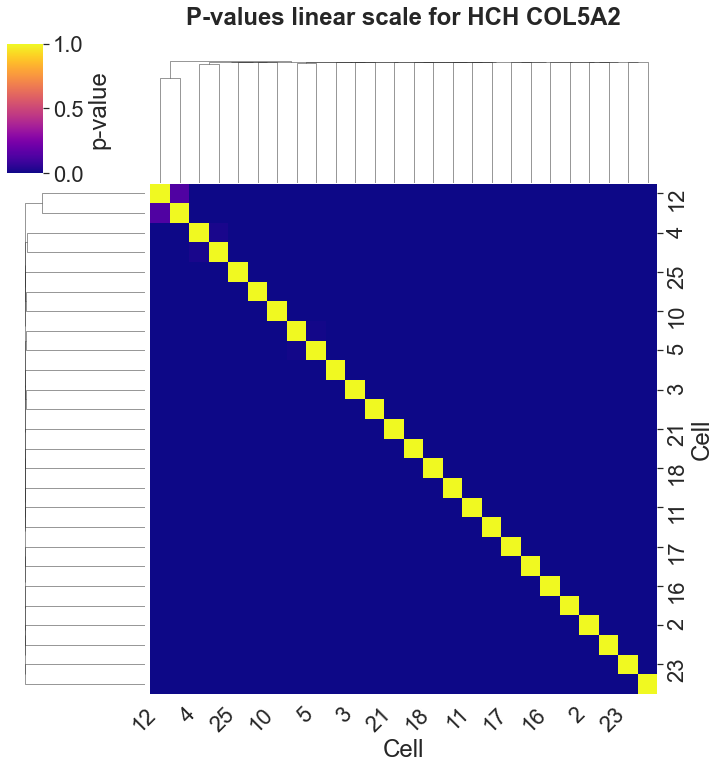

<Figure size 3000x2000 with 0 Axes>

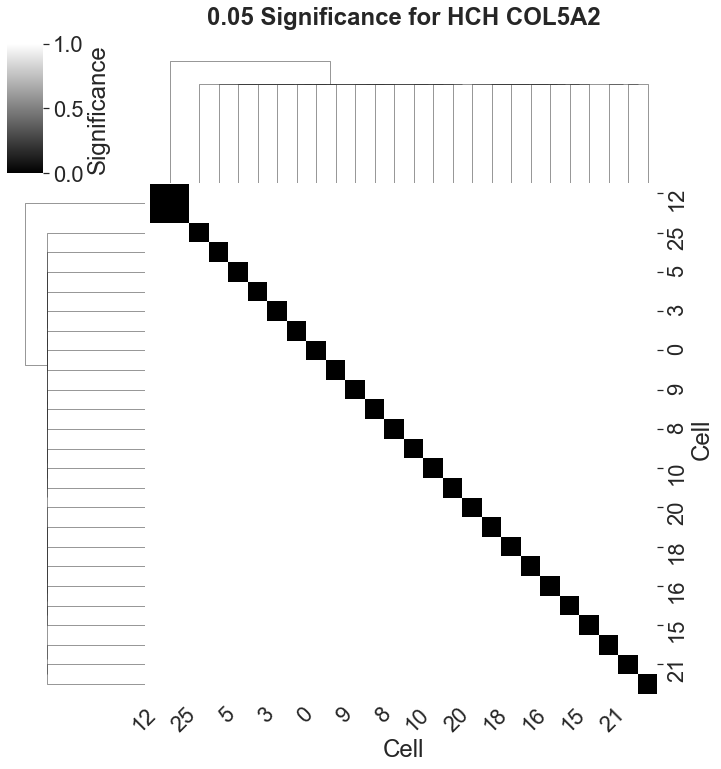

<Figure size 3000x2000 with 0 Axes>

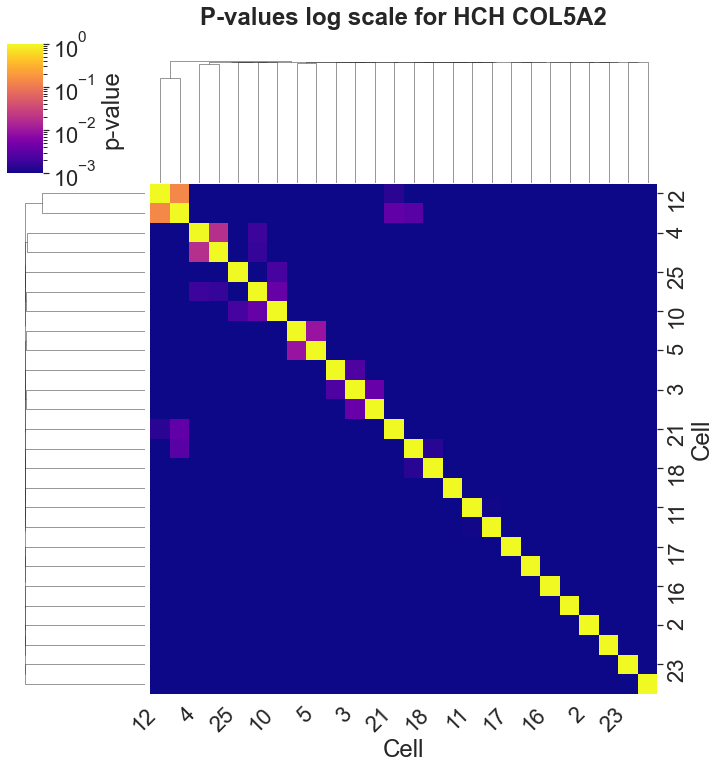

<Figure size 699x747 with 0 Axes>

<Figure size 3000x2000 with 0 Axes>

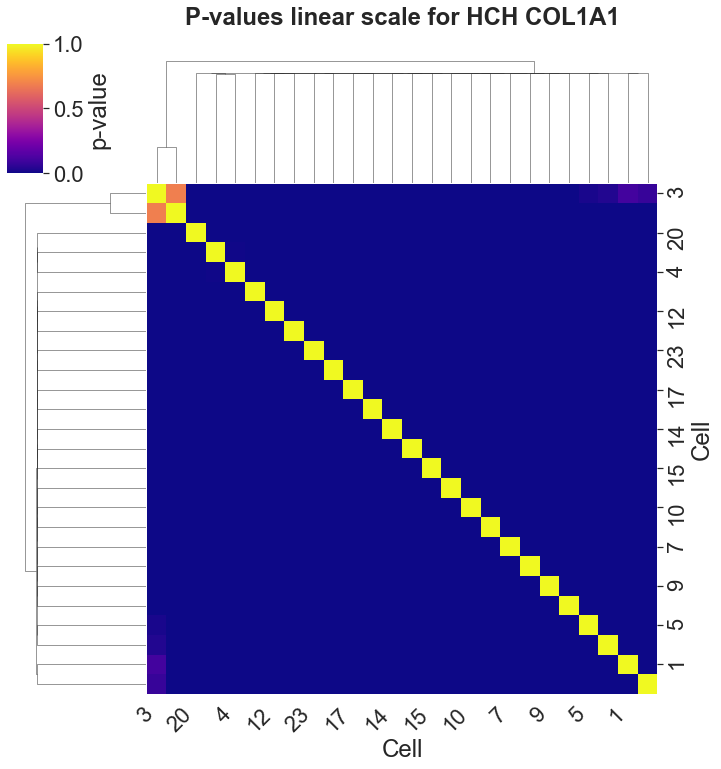

<Figure size 3000x2000 with 0 Axes>

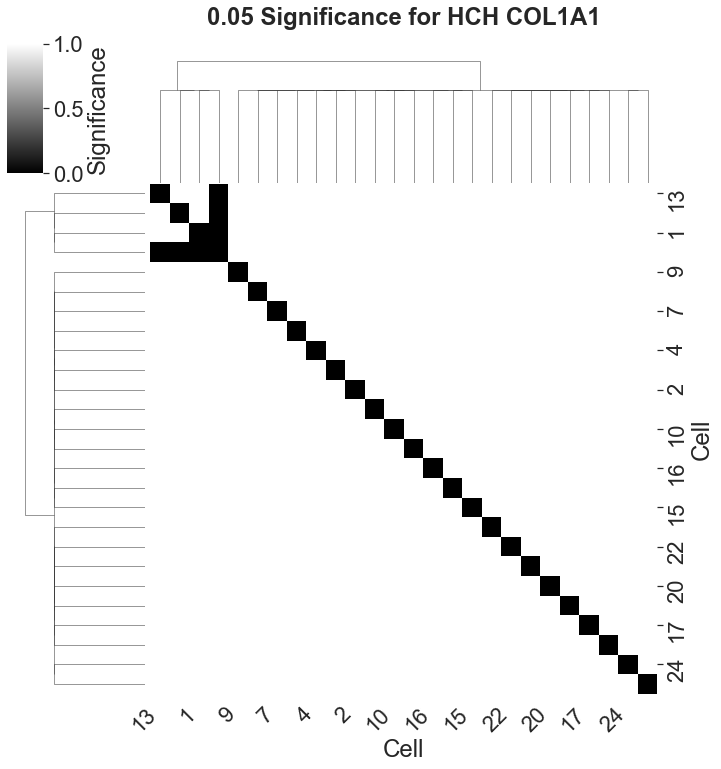

<Figure size 3000x2000 with 0 Axes>

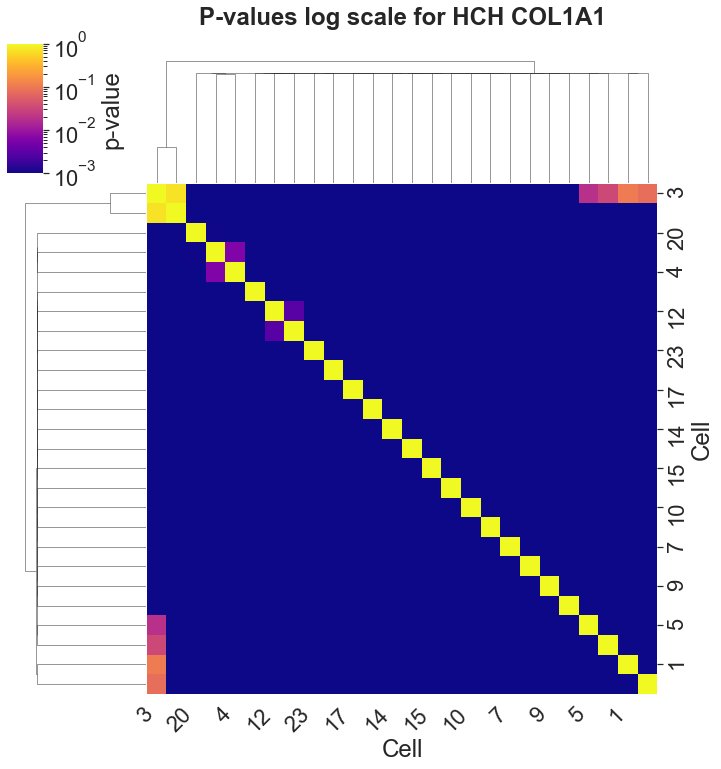

<Figure size 699x747 with 0 Axes>

<Figure size 3000x2000 with 0 Axes>

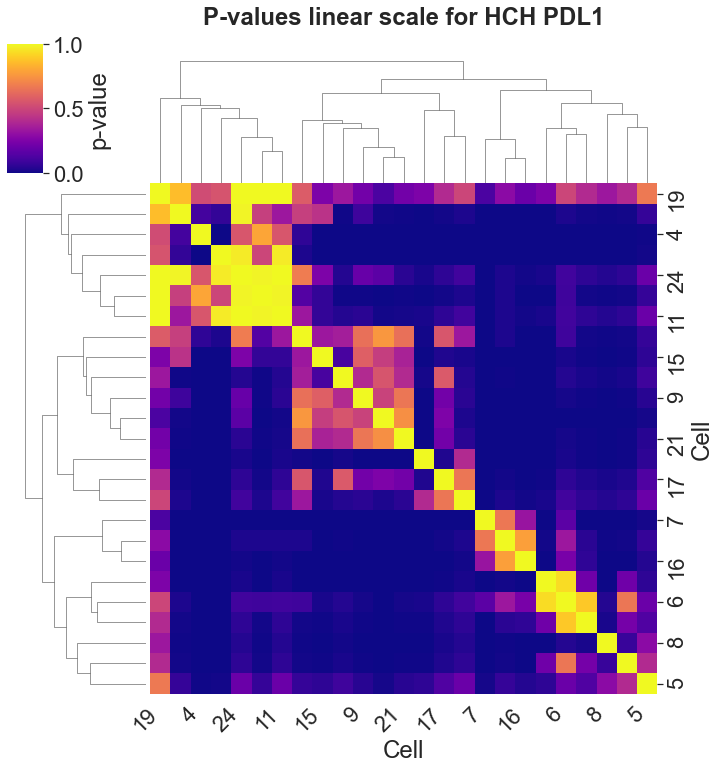

<Figure size 3000x2000 with 0 Axes>

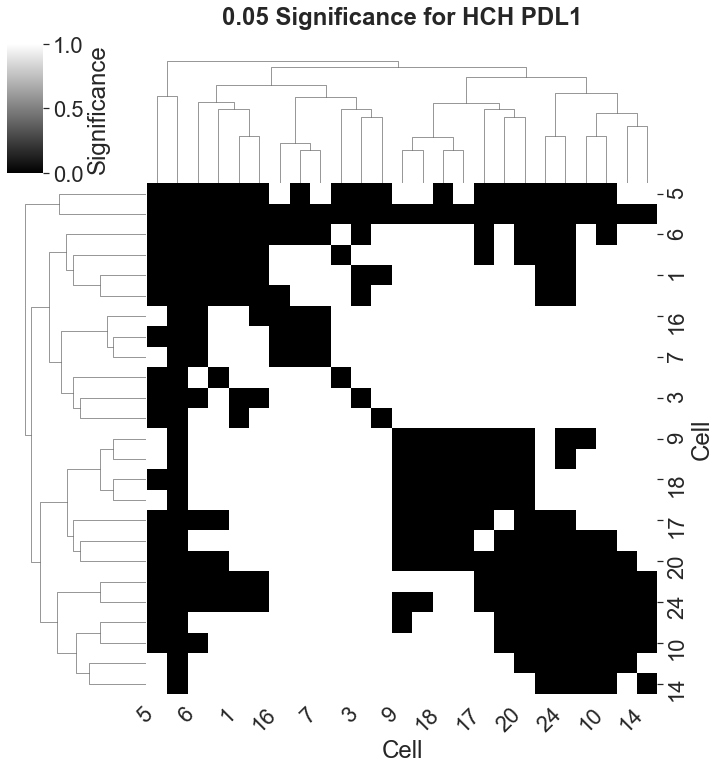

<Figure size 3000x2000 with 0 Axes>

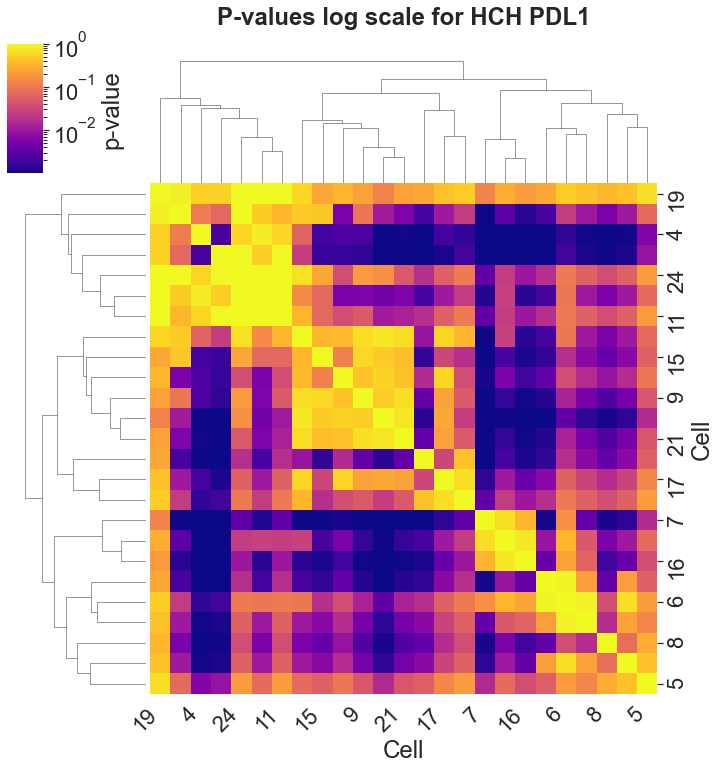

<Figure size 699x747 with 0 Axes>

<Figure size 3000x2000 with 0 Axes>

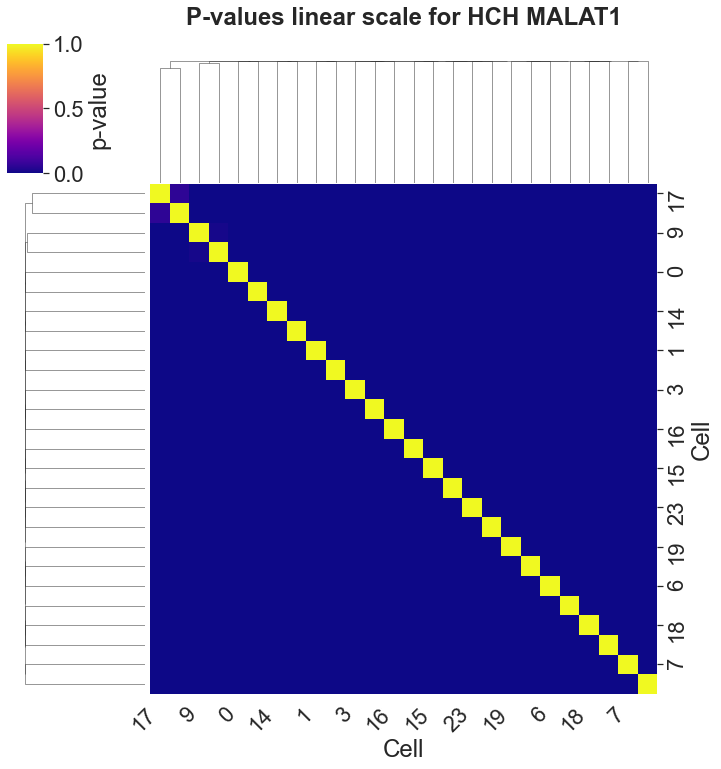

<Figure size 3000x2000 with 0 Axes>

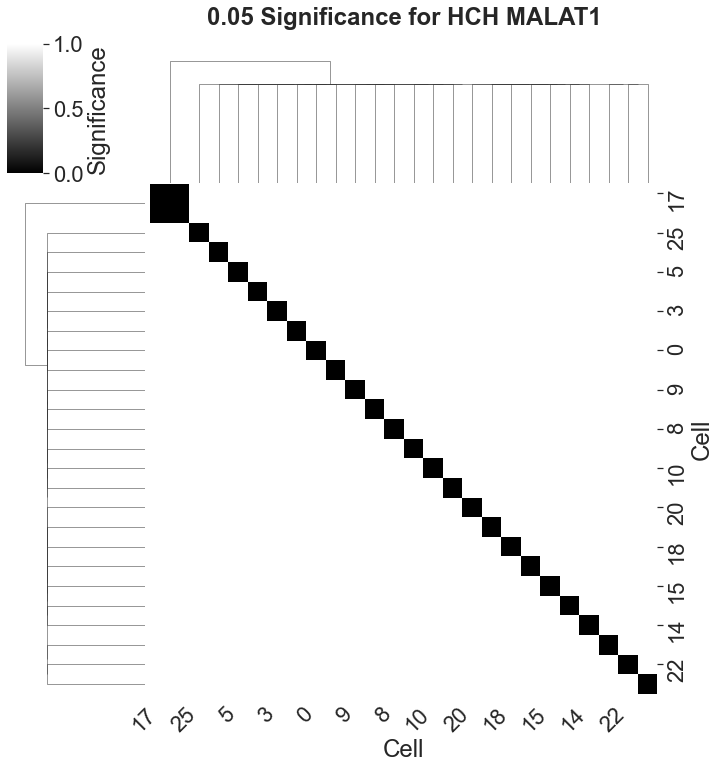

<Figure size 3000x2000 with 0 Axes>

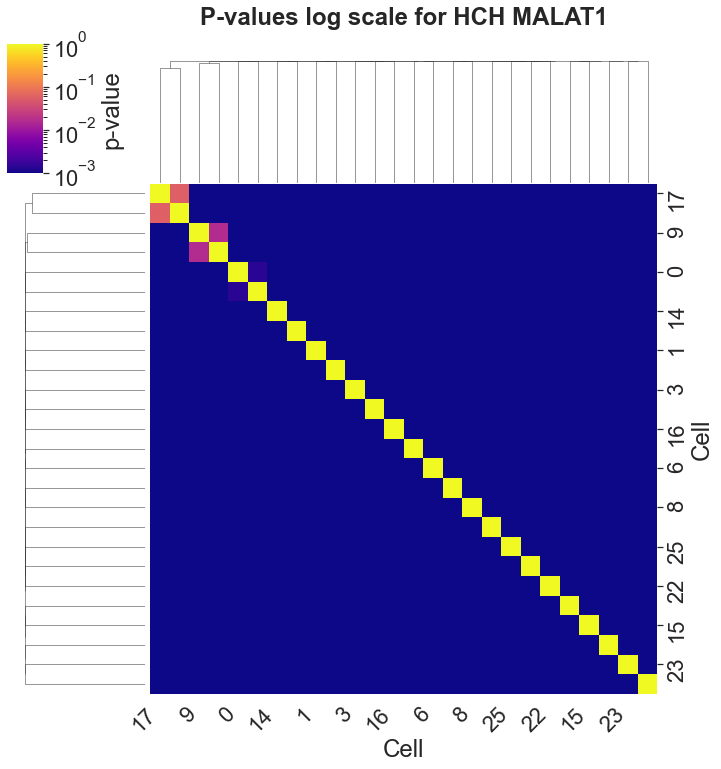

<Figure size 699x747 with 0 Axes>

<Figure size 3000x2000 with 0 Axes>

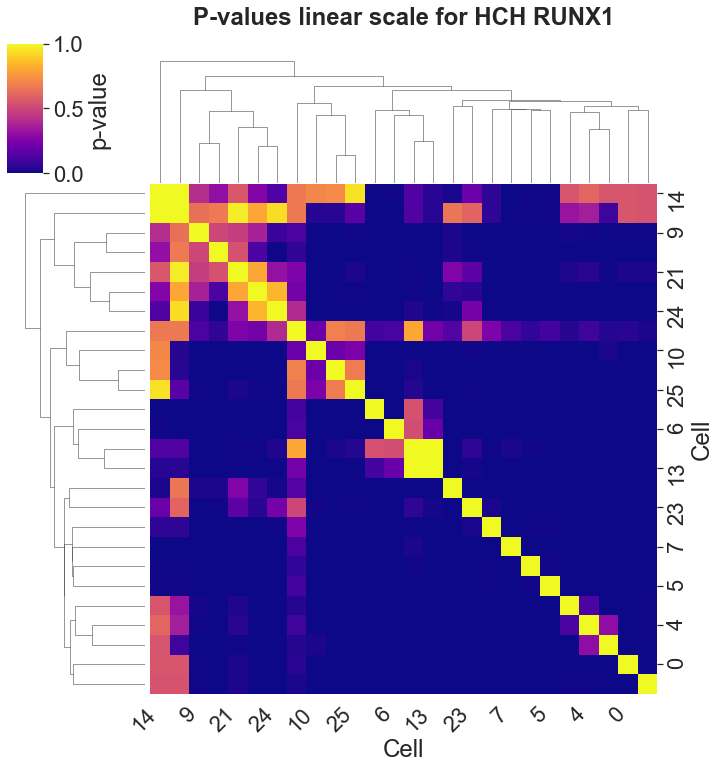

<Figure size 3000x2000 with 0 Axes>

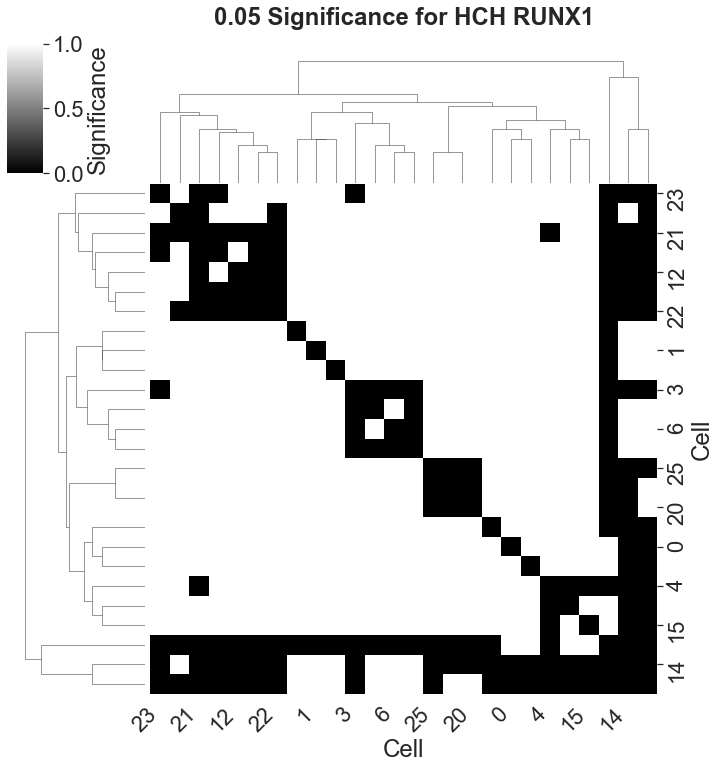

<Figure size 3000x2000 with 0 Axes>

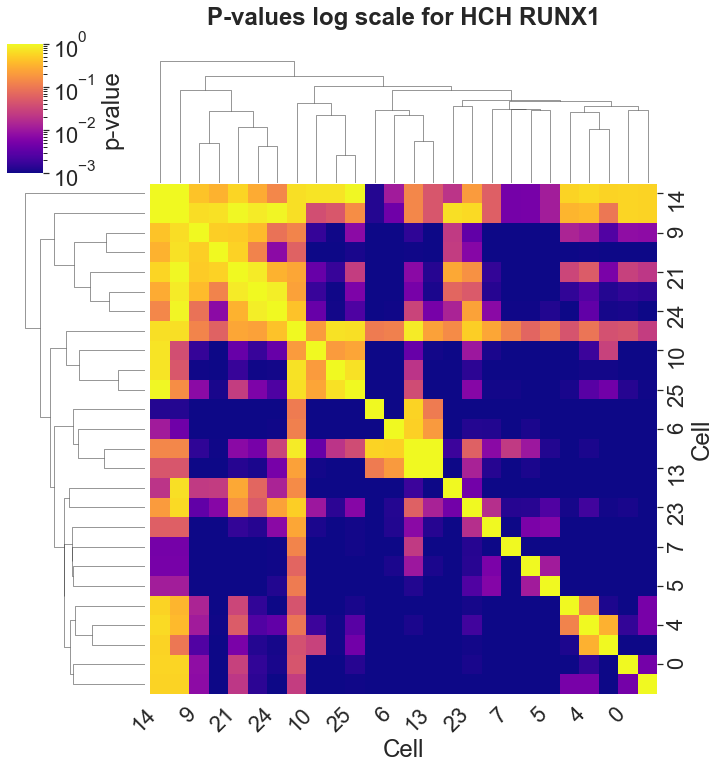

<Figure size 699x747 with 0 Axes>

<Figure size 3000x2000 with 0 Axes>

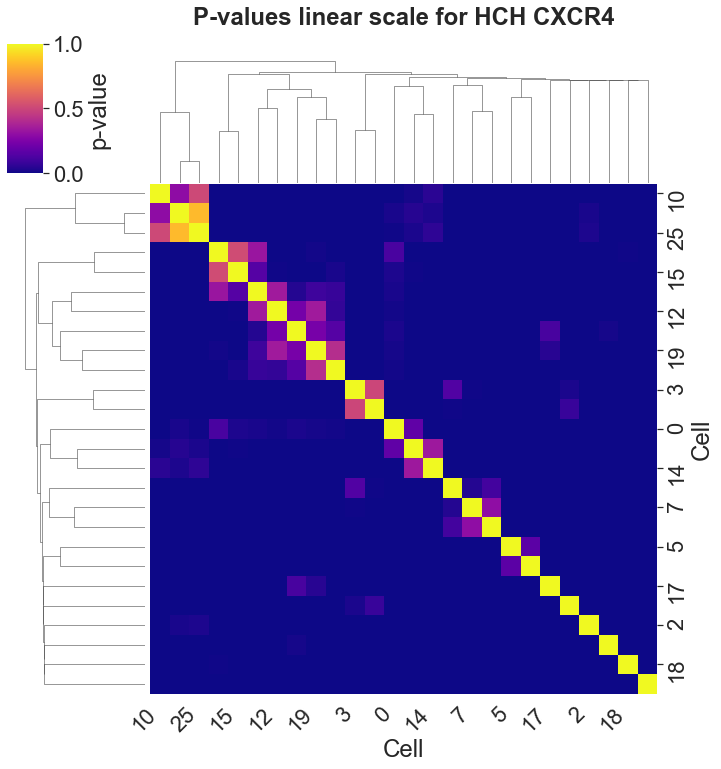

<Figure size 3000x2000 with 0 Axes>

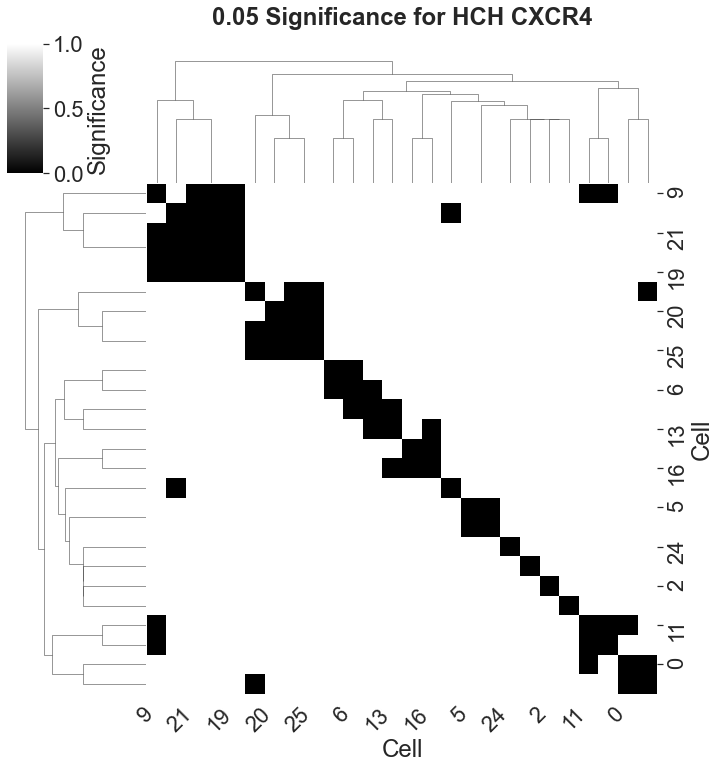

<Figure size 3000x2000 with 0 Axes>

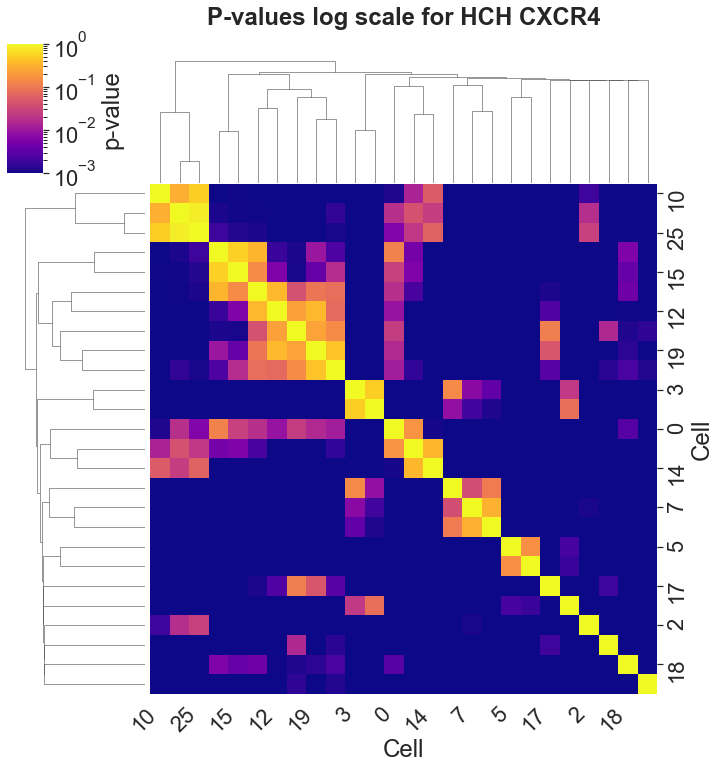

<Figure size 699x747 with 0 Axes>

<Figure size 3000x2000 with 0 Axes>

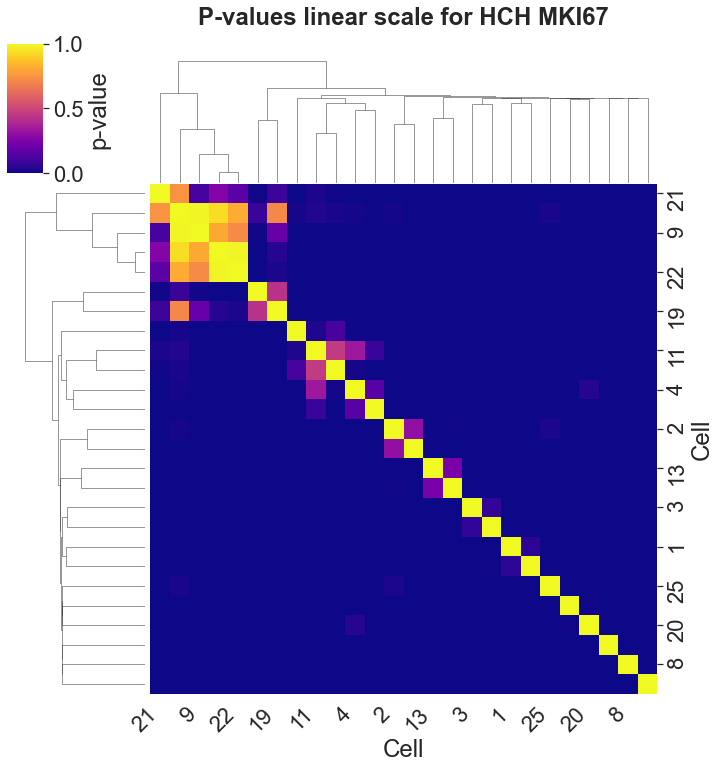

<Figure size 3000x2000 with 0 Axes>

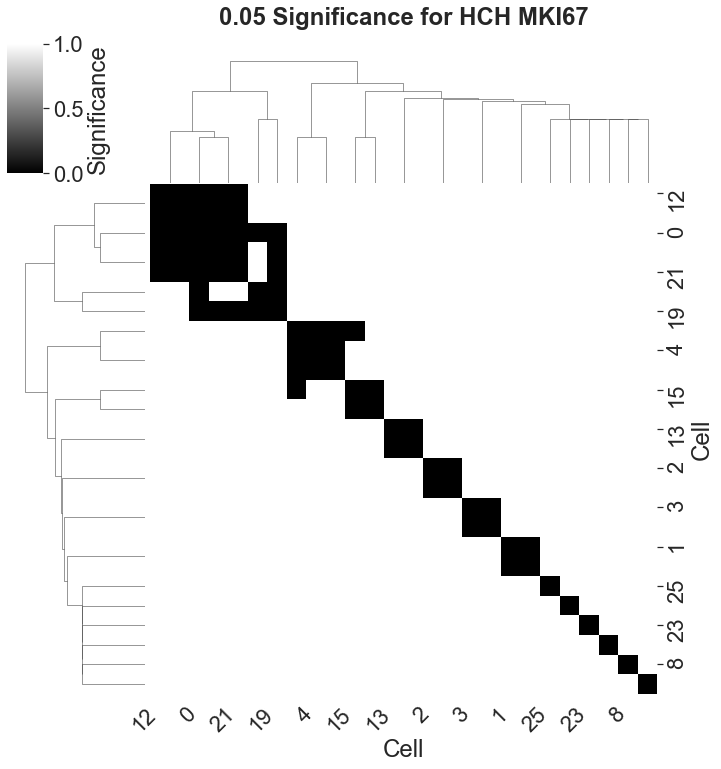

<Figure size 3000x2000 with 0 Axes>

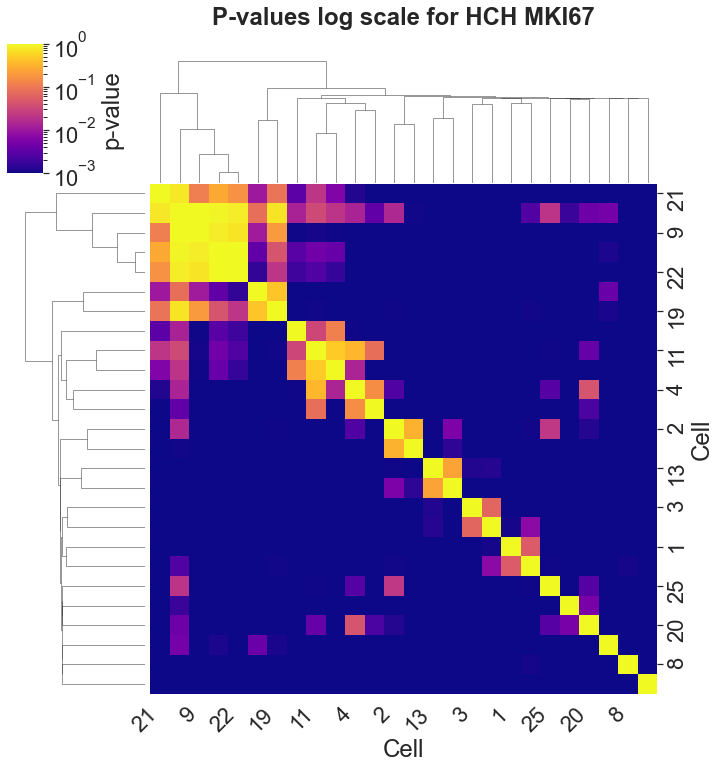

<Figure size 699x747 with 0 Axes>

<Figure size 3000x2000 with 0 Axes>

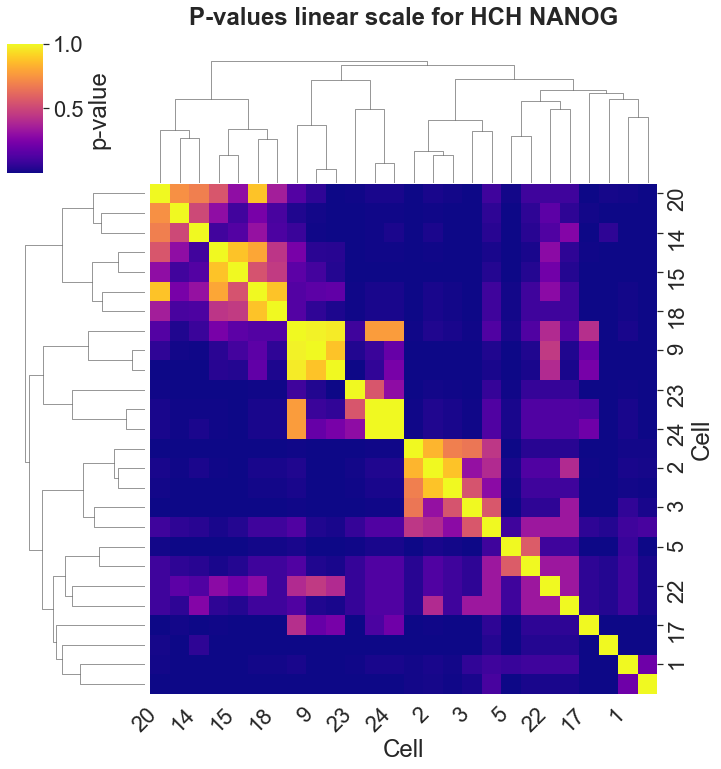

<Figure size 3000x2000 with 0 Axes>

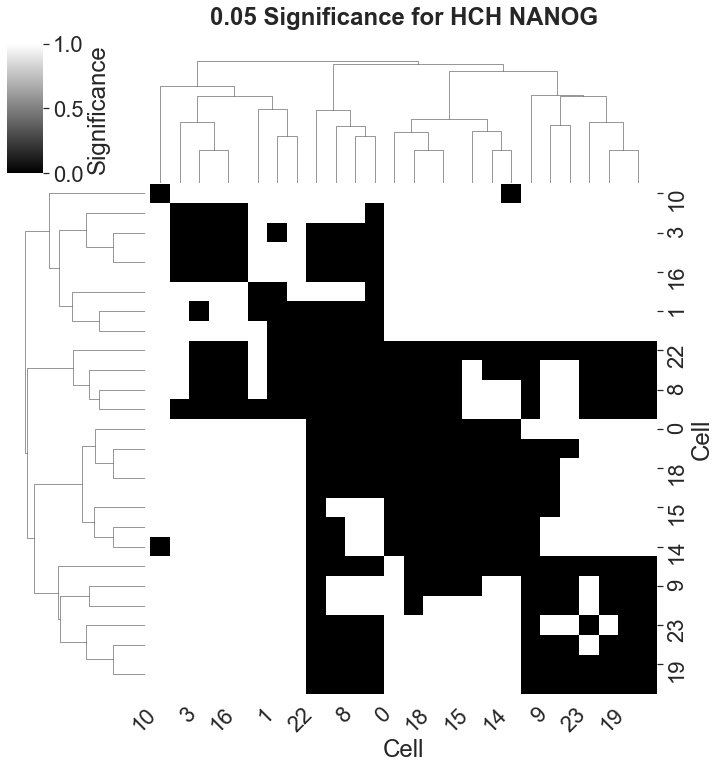

<Figure size 3000x2000 with 0 Axes>

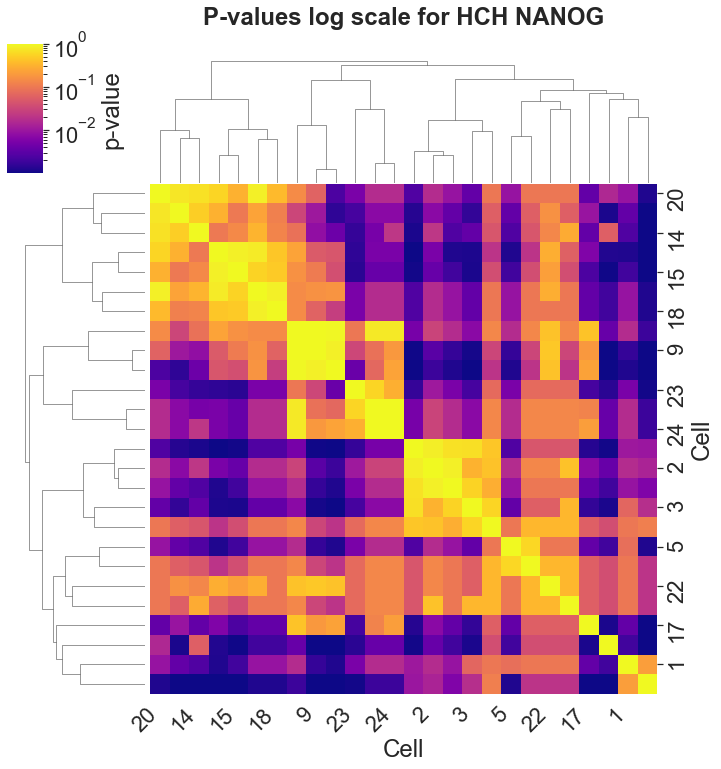

<Figure size 699x747 with 0 Axes>

In [5]:
markers = distCenters.drop(columns = idCols).columns.tolist()
# os.chdir(savePath)

fileExportCount = 0 # count number of images being exported
for ii, tissueSource in enumerate(distCenters['TissueSource'].drop_duplicates()): # each tissue source
    
    dfTissue = distCenters.loc[distCenters['TissueSource'] == tissueSource]
    
    # for jj, fov in enumerate(tqdm(dfTissue['FOV'].drop_duplicates())): # each FOV
        # dfFov = dfTissue.loc[dfTissue['FOV'] == fov]
        
    for jj, m in enumerate(tqdm(markers)): # pariwise cells for each marker
        # print()
        # print('Processing', m, '...')

        dfM = dfTissue[['CellLabel', m, 'DistCenter']]
        dfM = dfM.loc[dfM[m] > 0]

        nCells = np.max(dfM['CellLabel'].drop_duplicates()) # 1 indexing

        # centerPVal = np.zeros([nCells, nCells])
        # centerPVal[:] = np.nan
        # edgePVal = np.zeros([nCells, nCells])
        # edgePVal[:] = np.nan


        rows = Parallel(n_jobs = 10, prefer = 'threads', verbose = 0)\
            (delayed(cellAgainstOthers)(dfM, c1, ll) \
             for ll, c1 in enumerate(dfM['CellLabel'].drop_duplicates()))

        # unpack tuple results and stack row wise
        centerPVal = []
        for ll, r in enumerate(rows):

            centerPVal.append(r)
            
        # check if p values are empty
        if len(centerPVal) == 0:
            continue 

        # stack row wise
        centerPVal = np.stack(centerPVal, axis = 0)
        assert not np.isnan(centerPVal).all()


        # for ll, c1 in enumerate(tqdm(dfM['CellLabel'].drop_duplicates())):
        #     # c1 = c1 + 1 # offset indexing
        #     dfC1 = dfM.loc[dfM['CellLabel'] == c1]

        #     # test c1 against all other cells
        #     row = Parallel(n_jobs = 1, prefer = 'threads', verbose = 0)\
        #         (delayed(ksTestTwoCells)(dfM, c2, dfC1, c1) \
        #           for _, c2 in enumerate(dfM['CellLabel'].drop_duplicates()))

        #     # unpack results tuple
        #     for jj, r in enumerate(row):
        #         centerPVal[ll, jj] = r[0]
        #         edgePVal[ll, jj] = r[1]

        #     # report
        #     # print()
        #     # print('Complete cell', c1, '/', nCells, 'for', m, '...')

        # # export confusion matrix of p values as pkl file
        # # rows = cols = cell labels
        # dfOut = pd.DataFrame(centerPVal)
        # dfOut.to_pickle(m.replace('.tiff', '') + '_distCenterPVals.pkl')
        # dfOut = pd.DataFrame(edgePVal)
        # dfOut.to_pickle(m.replace('.tiff', '') + '_distEdgePVals.pkl')

        # visualize KS test p values
        # visualize p value heatmap on linear and log scales with 0.05 binary significance
        pvals = pd.DataFrame(centerPVal)

        nCells = np.max(pvals.shape[0]) # symmetric

        # label stars of significance (1-4*) based on p values
        stars = np.chararray([pvals.shape[0], pvals.shape[1]])
        stars[:] = '' # no significance

#             # make matrix symmetric to get rid of nan values
#             for jj in range(pvals.shape[0]):
#                 for ll in range(pvals.shape[1]):

#                     # swap entries if nan
#                     # find if lower triangular or upper triangular
#                     if pd.isna(pvals.iloc[jj, ll]):
#                         pvals.iloc[jj, ll] = pvals.iloc[ll, jj]

#                     if pd.isna(pvals.iloc[ll, jj]):
#                         pvals.iloc[ll, jj] = pvals.iloc[jj, ll]

#             # drop cells (rows and cols) with all nans
#             # these cells did not express this marker
#             pvals = pvals.dropna(axis = 'rows', how = 'all')
#             pvals = pvals.dropna(axis = 'columns', how = 'all')

        os.chdir(savePath)

        sns.set(font_scale = 2)

        # plot linear scale
        fig = plt.figure(dpi = 500)
        g = sns.clustermap(pvals, square=True, cmap = 'plasma', cbar_kws = {'label': 'p-value'})
        ax = g.ax_heatmap
        ax.set_xlabel('Cell')
        ax.set_ylabel('Cell')
        ax.set_xticklabels(g.ax_heatmap.get_xticklabels(), rotation = 45, ha = 'right')
        ax.set_yticklabels(g.ax_heatmap.get_yticklabels())
        ax.set_title('P-values linear scale for ' + tissueSource + ' ' + m, \
                     fontdict = {'fontweight': 'bold'}, y = 1.3)  
        # plt.savefig(m + ' p-values linear scale for ' + tissueSource + ' FOV #' + str(fov) + '.png', \
        #             dpi = 'figure', bbox_inches = 'tight', pad_inches = 0)
        fileExportCount += 1
        plt.savefig(str(fileExportCount).zfill(5) + '.png', \
                    dpi = 'figure', bbox_inches = 'tight', pad_inches = 0)

        # show cells that are significant using 0.05 alpha
        fig = plt.figure(dpi = 500)
        g = sns.clustermap(pvals < 0.05, square=True, cmap = 'binary_r', cbar_kws = {'label': 'Significance'})
        ax = g.ax_heatmap
        ax.set_xlabel('Cell')
        ax.set_ylabel('Cell')
        ax.set_xticklabels(g.ax_heatmap.get_xticklabels(), rotation = 45, ha = 'right')
        ax.set_yticklabels(g.ax_heatmap.get_yticklabels())
        ax.set_title('0.05 Significance for ' + tissueSource + ' ' + m, \
                     fontdict = {'fontweight': 'bold'}, y = 1.3) 
        # plt.savefig(m + ' 0.05 Significance for ' + tissueSource + ' FOV #' + str(fov) + '.png', \
        #             dpi = 'figure', bbox_inches = 'tight', pad_inches = 0)
        fileExportCount += 1
        plt.savefig(str(fileExportCount).zfill(5) + '.png', \
                    dpi = 'figure', bbox_inches = 'tight', pad_inches = 0)


        pvals.iloc[:] += 0.001 # offset for log scale

        # plot log scale
        fig = plt.figure(dpi = 500)
        g = sns.clustermap(pvals, square=True, cmap = 'plasma', cbar_kws = {'label': 'p-value'}, norm = LogNorm())
        ax = g.ax_heatmap
        ax.set_xlabel('Cell')
        ax.set_ylabel('Cell')
        ax.set_xticklabels(g.ax_heatmap.get_xticklabels(), rotation = 45, ha = 'right')
        ax.set_yticklabels(g.ax_heatmap.get_yticklabels())
        ax.set_title('P-values log scale for ' + tissueSource + ' ' + m, \
                     fontdict = {'fontweight': 'bold'}, y = 1.3)   
        # plt.savefig(m + ' p-values log scale for ' + tissueSource + ' FOV #' + str(fov) + '.png', \
        #             dpi = 'figure', bbox_inches = 'tight', pad_inches = 0)
        fileExportCount += 1
        plt.savefig(str(fileExportCount).zfill(5) + '.png', \
                    dpi = 'figure', bbox_inches = 'tight', pad_inches = 0)

        # create a blank figure to save to total even number of figures to copy/paste into a PPTX file
        fig = plt.figure(dpi = 1, figsize = (699, 747))
        # plt.savefig(m + ' blank ' + tissueSource + ' FOV #' + str(fov) + '.png', \
        #                         dpi = 'figure', bbox_inches = None, pad_inches = 0)
        fileExportCount += 1
        plt.savefig(str(fileExportCount).zfill(5) + '.png', \
                    dpi = 'figure', bbox_inches = None, pad_inches = 0)
